# Time Series Forecasting & Regression of Traditional Market ETFs and Crypto ETFs

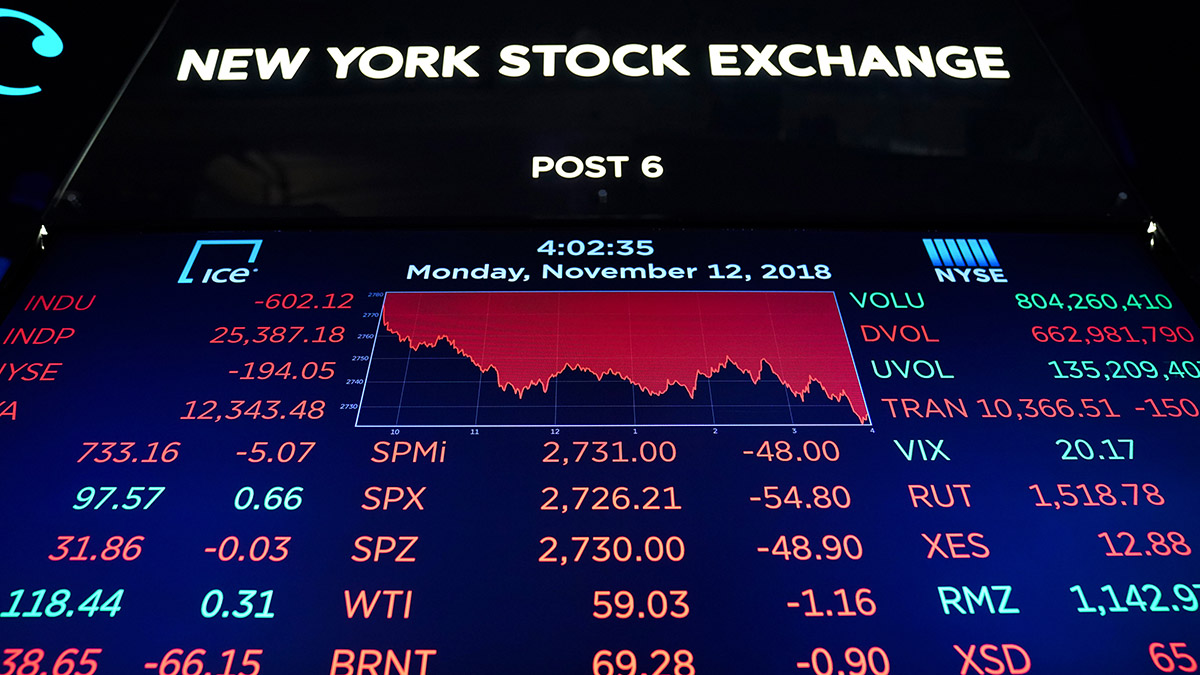

### Business 

Start-up company Crypt wants to determine the predictability of crytpo and crypto related assets. Additionally, the company wants to compare the price action of traditional market ETFs to those following crypto. The goal of Crypt is to determine the relative maturity of crypto assets by looking at volatility and valuation forecast against traditional market institutions. 

- How volatile are crypto assets?
- How predictable are crypto assets compared to traditional market ETFs?
- How do the valuation forecasts of crypto assets perform against traditional market ETFs?
- Which determinants most affect crypto-asset price movement?

### Data

#### Time Series Forecasting

The data in this analysis are taken from Yahoo! Finance. The SPDR Dow Jones Industrial Average ETF Trust (DIA), SPDR S&P 500 ETF Trust (SPY), and Invesco NASDAQ 100 ETF (QQQM) are exchange-traded funds which invest in the companies listed in the Dow Jones Industrial Average, Standard and Poor's 500, and Nasdaq Composite indices respectively. They can be considerered as 'aggregate' stocks. They can be traded multiple times a day in the stock markets they are listed on. These indices are listings of companies, tracking prices. The prerequite to being included varies from index to index. For example, S & P 500 tracks 500 large companies listed in stock markets in the United States, while Nasdaq Composite tracks most of the stocks listed in the Nasdaq stock exchange. Bitwise (BITW) functions similarly. It tracks and invests in the top ten cryptocurrencies measured by market capitlization (price multiplied by shares outstanding - company stock currently held by all its shareholders). Lastly, Amplify Transformational Data Sharing ETF (BLOK) invests in crypto and blockchain related industries. These industries include, but are not limited to crypto mining, semiconductors, private blockchain, software, and hardware equipment. Additionally, it partitions investments among North American, Asian, and European markets. The companies they invest in vary in market capitalization size. 

- Bitwise - ETF (Tracks top ten cryptocurrency by measure of market capitalization)
- SPY - ETF (Exchange-Traded Fund that tracks SP500 Index)
- QQQM - ETF (Exchange-Traded Fund that tracks NASDAQ Composite Index)
- DIA - ETF (Exchange-Traded Fund that tracks Dow Jones Industrial Average Index)
- BLOK - Index Fund (Crypto and Blockchain Related Industries)

All datasets contain the columns 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'. 'Open' and 'Close' are the prices of the ETFs taken at 9:30 AM and 4:00 PM. The 'High' and 'Low' are points during the day that marks the peak and trough of each ETF's price. The adjusted close ('Adj Close') is the price of the ETF after corporate actions which may affect valuation after accounting. DIA, SPY, and BLOK start on March 3rd, 2020. BITW starts on December 10, 2020 and QQQM starts on October 13, 2020. All data end on November 17, 2021. The rows are timestamped with the day of month only for weekdays, it does not include data from weekends and bank holidays (stock markets are closed). 

#### Multiple Regression

The new dataframe for multiple linear regression is a combination of the data used for time series forecasting as well as new unemployment and inflation rate statistics. The data for United States unemployment rate is taken from https://data.oecd.org/unemp/unemployment-rate.htm, while the information regarding the monthly U.S. inflation rate is taken from Statista Research Department - November 15, 2021. Columns 'daily_price', 'return_daily_perc', and 'Volume' from dowjones, sp500, nasdaq, bitwise, and blok datasets are added to the new dataset. The date range of the new resulting dataset will be from December 10, 2020 to October 1, 2021. 

### Methods

#### Time Series Forecasting

The principal method this analysis uses is time series forecasting. In order of iteration, Random Walk, Autoregression, Moving Average, ARIMA, SARIMA, and Facebook Prophet modeling are used to create predictive and forecasting models. Each model serves to inform and hone the previous model's shortcomings. Additionally, autocorrelation function (ACF), partial autocorrelation function (PACF), decomposition are used to dissect and learn optimal parameters for the models. While the Dickey-Fuller Test, Akaike Information Criterion, mean squared error, and root mean squared error are used to asses the accuracy and fit of the models. 

#### Multiple Regression

Multiple regression has five principal assumptions. They are:

- Linear relationship.
- Multivariate normality.
- No or little multicollinearity.
- No auto-correlation.
- Homoscedasticity.

In order to create models as accurately and precisely possible, this analysis will conduct tests to test that these assumptions are met. Linear relationships will be checked by looking at residual and fitted plots. For multivariate normality,  this analysis will at look at QQ plots. For multicollinearity, we will use scatter plots to visualize correlation effect among variables. To check if auto-correlations exist between variables, the Dubin-Watson test will measure the amount of auto-correlation present in residuals. By looking at residual vs fitted values plot, we can check if heteroskedasticity exists. The plot would exhibit a funnel shape pattern. 

### Importing Necessary Packages 

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import scipy.stats as stats

import pylab

from pmdarima import auto_arima

from fbprophet import Prophet

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

from yellowbrick.regressor import ResidualsPlot

import warnings
warnings.filterwarnings('ignore')

## Forecasting

### Creating Dataframes for Each ETF/Index

In [2]:
bitwise = pd.read_csv('BITWISE.csv')
nasdaq = pd.read_csv('QQQM.csv')
dowjones = pd.read_csv('DIA.csv')
blok = pd.read_csv('BLOK.csv')
sp500 = pd.read_csv('SPY.csv')

In [3]:
bitwise.head()

Date       Open        High        Low       Close   Adj Close  \
0  2020-12-10  32.000000   49.000000  31.049999   36.400002   36.400002   
1  2020-12-11  40.009998   46.500000  36.500000   38.480000   38.480000   
2  2020-12-14  43.990002   65.000000  43.980000   59.799999   59.799999   
3  2020-12-15  63.900002   93.400002  63.099998   81.500000   81.500000   
4  2020-12-16  95.010002  147.000000  95.000000  139.009995  139.009995   

   Volume  
0  878400  
1  537000  
2  703700  
3  770300  
4  800900

In [4]:
bitwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       235 non-null    object 
 1   Open       235 non-null    float64
 2   High       235 non-null    float64
 3   Low        235 non-null    float64
 4   Close      235 non-null    float64
 5   Adj Close  235 non-null    float64
 6   Volume     235 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


In [5]:
nasdaq.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-10-13  121.080002  121.970001  120.559998  121.050003  120.420715   
1  2020-10-14  121.330002  121.719002  119.369003  119.970001  119.346336   
2  2020-10-15  118.029999  119.279999  117.789001  119.107002  118.487816   
3  2020-10-16  119.900002  120.410004  118.500000  118.500000  117.883972   
4  2020-10-19  119.830002  119.830002  116.235001  116.449997  115.844627   

   Volume  
0   13100  
1   37800  
2   30600  
3   51000  
4   50600

In [6]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       277 non-null    object 
 1   Open       277 non-null    float64
 2   High       277 non-null    float64
 3   Low        277 non-null    float64
 4   Close      277 non-null    float64
 5   Adj Close  277 non-null    float64
 6   Volume     277 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.3+ KB


In [7]:
blok.head()

Date       Open       High        Low      Close  Adj Close  Volume
0  2020-02-03  18.920000  19.108000  18.920000  18.950001  18.590141   21300
1  2020-02-04  19.299999  19.365999  19.219999  19.250000  18.884443   18700
2  2020-02-05  19.379999  19.410000  19.292999  19.400000  19.031595   31100
3  2020-02-06  19.400000  19.480000  19.400000  19.448000  19.078684   13400
4  2020-02-07  19.370001  19.440001  19.351999  19.360001  18.992355   11200

In [8]:
blok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       452 non-null    object 
 1   Open       452 non-null    float64
 2   High       452 non-null    float64
 3   Low        452 non-null    float64
 4   Close      452 non-null    float64
 5   Adj Close  452 non-null    float64
 6   Volume     452 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.8+ KB


In [9]:
sp500.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-02-03  323.350006  326.160004  323.220001  324.119995  315.095734   
1  2020-02-04  328.070007  330.010010  327.720001  329.059998  319.898224   
2  2020-02-05  332.269989  333.089996  330.670013  332.859985  323.592407   
3  2020-02-06  333.910004  334.190002  332.799988  333.980011  324.681244   
4  2020-02-07  332.820007  333.989990  331.600006  332.200012  322.950806   

     Volume  
0  69083000  
1  62573200  
2  65951100  
3  50359700  
4  64139400

In [10]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       453 non-null    object 
 1   Open       453 non-null    float64
 2   High       453 non-null    float64
 3   Low        453 non-null    float64
 4   Close      453 non-null    float64
 5   Adj Close  453 non-null    float64
 6   Volume     453 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.9+ KB


In [11]:
dowjones.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-02-03  283.690002  286.260010  283.500000  283.980011  274.474182   
1  2020-02-04  287.679993  289.000000  287.420013  288.040009  278.398224   
2  2020-02-05  290.760010  293.040009  289.950012  292.859985  283.056885   
3  2020-02-06  294.019989  294.140015  292.450012  293.739990  283.907440   
4  2020-02-07  292.760010  292.809998  290.660004  291.190002  281.442871   

    Volume  
0  3157400  
1  3004100  
2  3305900  
3  2857200  
4  3839300

In [12]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       453 non-null    object 
 1   Open       453 non-null    float64
 2   High       453 non-null    float64
 3   Low        453 non-null    float64
 4   Close      453 non-null    float64
 5   Adj Close  453 non-null    float64
 6   Volume     453 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.9+ KB


### Turning Dates Column to DateTime Index and Creating Rows for Weekends

In order to parse through the dataframe meaningfully as time series, we will have to convert the 'Date' column to the datatype *DateTime* and set it as the dataframe index. Additionally, in order to model the time series from these dataframes, it is necessary to create columns for weekend dates not originally included in the dataframes. 

In [13]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df['Date'].values, format='%Y-%m-%d')

In [14]:
dowjones['Date'] = get_datetimes(dowjones)
bitwise['Date'] = get_datetimes(bitwise)
blok['Date'] = get_datetimes(blok)
sp500['Date'] = get_datetimes(sp500)
nasdaq['Date'] = get_datetimes(nasdaq)

In [15]:
print(dowjones['Date'].dtypes)
print(bitwise['Date'].dtypes)
print(blok['Date'].dtypes)
print(sp500['Date'].dtypes)
print(nasdaq['Date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [16]:
def weekends(df):
    """Takes in dataframe and creates rows for dates of weekends not included in original dataframe
    
    Parameter:
    df: pandas DataFrame"""
    
    s = pd.DataFrame()
    s['Date'] = pd.date_range(df.Date.min(), df.Date.max(), freq = 'D')
    s['Date'] = get_datetimes(s)
    df_new = df.merge(s, on= 'Date', how='outer', sort= True, copy= False)
    
    return df_new

In [17]:
s = pd.DataFrame()
s['Date'] = pd.date_range(dowjones.Date.min(), dowjones.Date.max(), freq = 'D')

In [18]:
s['Date'] = get_datetimes(s)

In [19]:
dowjones = dowjones.merge(s, on= 'Date', how= 'outer', sort = True, copy = False)

In [20]:
sp500 = weekends(sp500)
nasdaq = weekends(nasdaq)
bitwise = weekends(bitwise)
blok = weekends(blok)

In [21]:
dowjones.set_index('Date', drop= True, inplace= True)
bitwise.set_index('Date', drop= True, inplace= True)
blok.set_index('Date', drop= True, inplace= True)
sp500.set_index('Date', drop= True, inplace= True)
nasdaq.set_index('Date', drop= True, inplace= True)

In [22]:
print(len(dowjones))
print(len(bitwise))
print(len(blok))
print(len(nasdaq))
print(len(sp500))

653
341
652
400
653


### Filling Null Values for Weekend Rows

In [23]:
dowjones.loc[dowjones['Open'].isna() == False].head(7)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-03  283.690002  286.260010  283.500000  283.980011  274.474182   
2020-02-04  287.679993  289.000000  287.420013  288.040009  278.398224   
2020-02-05  290.760010  293.040009  289.950012  292.859985  283.056885   
2020-02-06  294.019989  294.140015  292.450012  293.739990  283.907440   
2020-02-07  292.760010  292.809998  290.660004  291.190002  281.442871   
2020-02-10  290.200012  292.959991  290.160004  292.950012  283.143890   
2020-02-11  294.350006  294.420013  292.279999  292.940002  283.134186   

               Volume  
Date                   
2020-02-03  3157400.0  
2020-02-04  3004100.0  
2020-02-05  3305900.0  
2020-02-06  2857200.0  
2020-02-07  3839300.0  
2020-02-10  2877700.0  
2020-02-11  1994500.0

In [24]:
dowjones.loc[dowjones['Open'].isna() == True].head(7)

Open  High  Low  Close  Adj Close  Volume
Date                                                 
2020-02-08   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-09   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-15   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-16   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-17   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-22   NaN   NaN  NaN    NaN        NaN     NaN
2020-02-23   NaN   NaN  NaN    NaN        NaN     NaN

In [25]:
dowjones.fillna(method='ffill', inplace = True)
sp500.fillna(method='ffill', inplace = True)
nasdaq.fillna(method='ffill', inplace = True)
bitwise.fillna(method='ffill', inplace = True)
blok.fillna(method='ffill', inplace = True)

### Initial Data Exploration

This portion aims to look at the trends and observations we can make out by looking at the surface of the data. These are shown in price fluctuation within the period each dataset, standard deviations, means, and price distributions. 

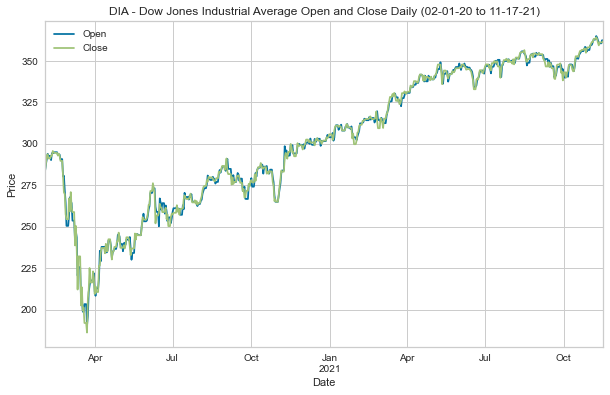

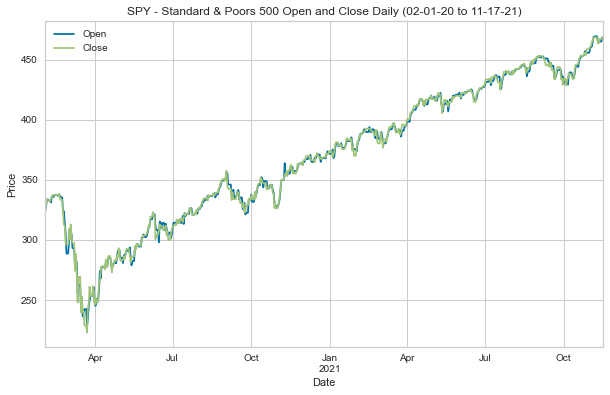

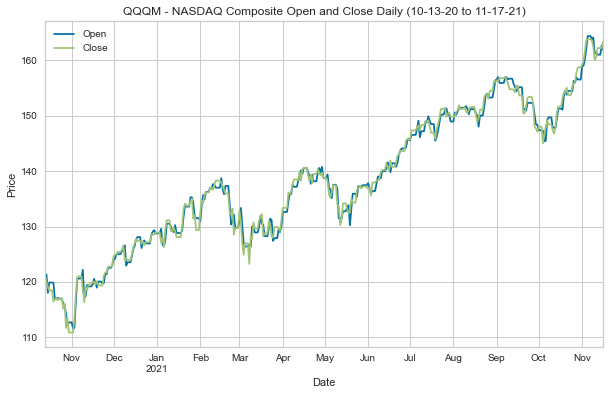

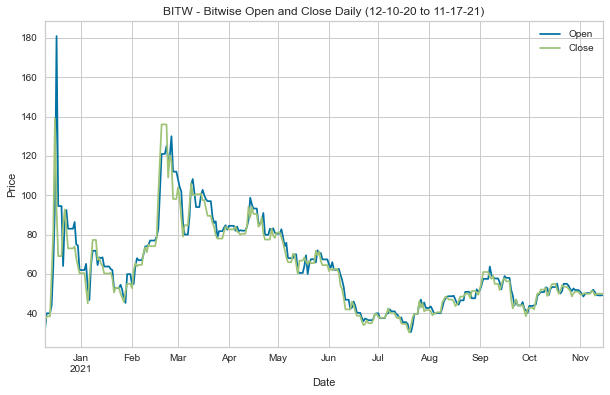

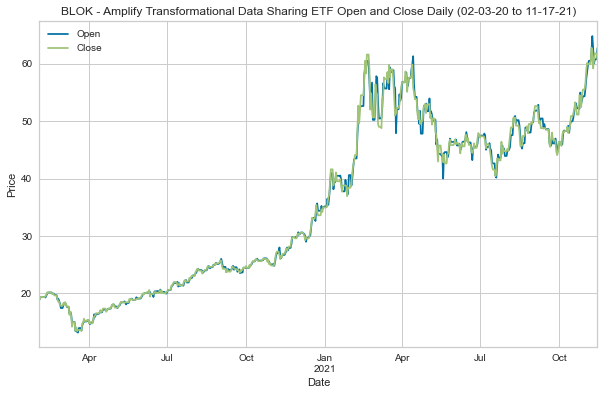

In [26]:
dowjones[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('DIA - Dow Jones Industrial Average Open and Close Daily (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
sp500[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('SPY - Standard & Poors 500 Open and Close Daily (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
nasdaq[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('QQQM - NASDAQ Composite Open and Close Daily (10-13-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
bitwise[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BITW - Bitwise Open and Close Daily (12-10-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
blok[['Open', 'Close']].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BLOK - Amplify Transformational Data Sharing ETF Open and Close Daily (02-03-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();

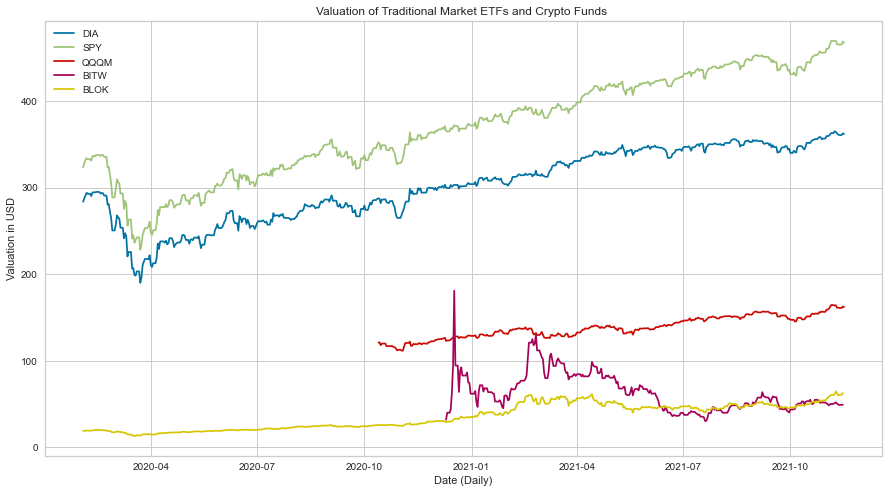

In [27]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(111)

ax1.plot(dowjones['Open'])
ax1.plot(sp500['Open'])
ax1.plot(nasdaq['Open'])
ax1.plot(bitwise['Open'])
ax1.plot(blok['Open'])
plt.legend(['DIA', 'SPY', 'QQQM', 'BITW', 'BLOK'])
plt.title('Valuation of Traditional Market ETFs and Crypto Funds ')
plt.xlabel('Date (Daily)')
plt.ylabel('Valuation in USD');
plt.show()


DIA, QQQM, and SPY all possess an obvious upward linear trend. DIA and SPY's graphs exemplify the dip in global markets in response to growing social and financial limitations SARS-COV19 placed on trans-industry institutions. This dip, occuring in March 2020, was followed by a sharp recovery; one which has yet to see siginifanct pullback. Bitwise's price action within the year shows a more stationary price action with a siginificant drop in volatility around early 2021. Blok on the other hand shows an upward linear trend similar to traditional stock market etfs. However, this slope is less steep and more prone to volatility. This could be due to Blok's investment stratedgy. It only invests in cryptocurrency, but in industries closely linked to blockchain in general such as conductors, mining parts, and energy. Lastly, there are no clear divergences between opening and closing data that would signify a large change in price within a single trading day amongst DIA, SPY, QQQM, and BLOK. Bitwise during the month of January 2021, experiences a siginificant drop in valuation within a single day. 

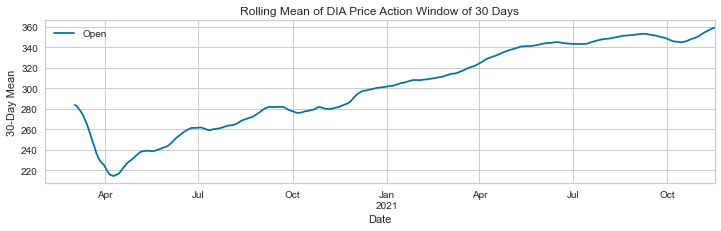

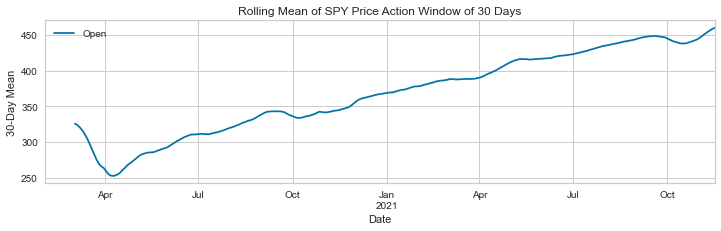

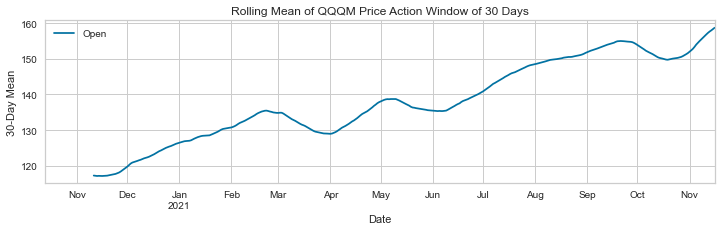

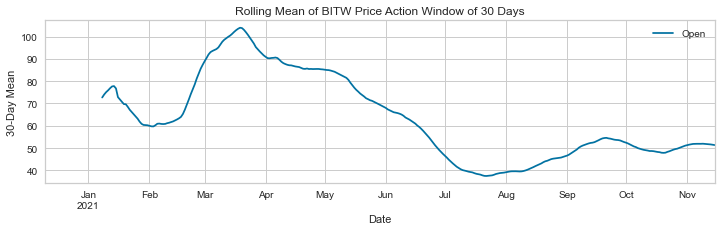

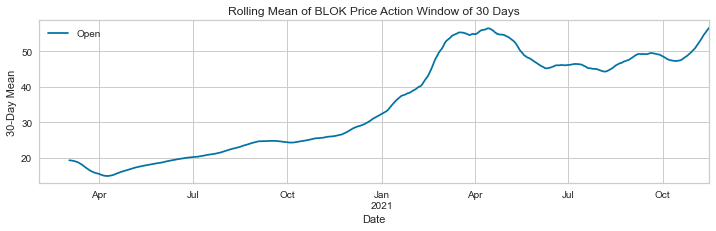

In [28]:
dowjones['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of DIA Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
sp500['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of SPY Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
nasdaq['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of QQQM Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
bitwise['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of BITW Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();
blok['Open'].rolling(30).mean().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Mean of BLOK Price Action Window of 30 Days')
plt.ylabel('30-Day Mean')
plt.show();

Unsurprisngly, the monthly return on investment with traditional market ETFS exhibit continuous increases. BITW's monthly ROI takes a sharp downturn around April of 2021, coinciding with the bear market experienced by the crypto market. However, this sharp downturn does not seem affect BLOK's performance around the same period, showing an upward linear trend. 

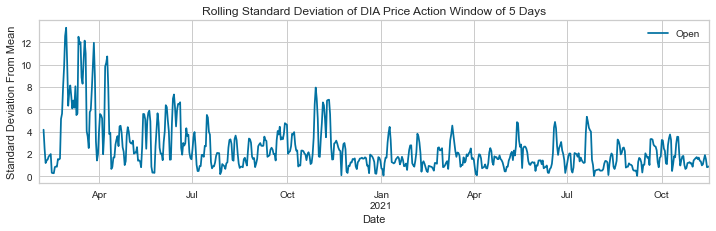

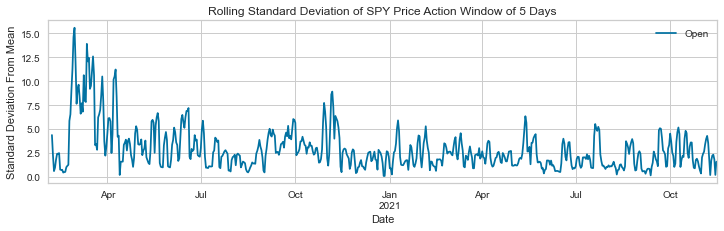

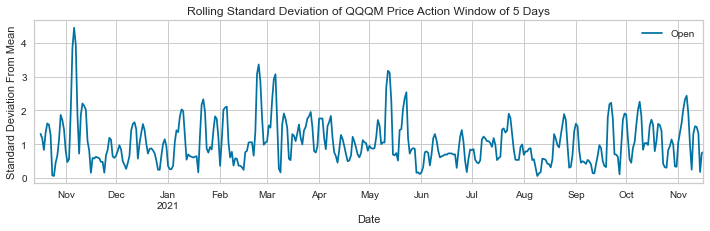

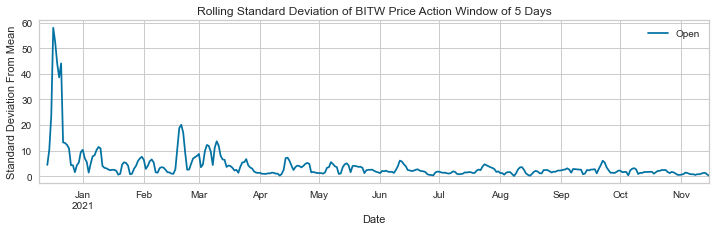

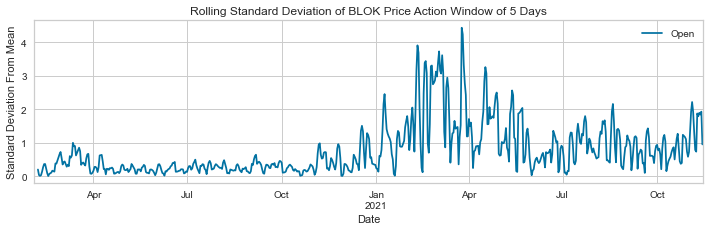

In [29]:
dowjones['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of DIA Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
sp500['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of SPY Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
nasdaq['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of QQQM Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
bitwise['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of BITW Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();
blok['Open'].rolling(5).std().plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Rolling Standard Deviation of BLOK Price Action Window of 5 Days')
plt.ylabel('Standard Deviation From Mean')
plt.show();

The 7-day rolling standard deviation graphs above further illustrates the more volatile nature of crypto-based ETFS in comparison to traditional market ETFs. DIA, SPY, and QQQM exhibit better stationarity while BITW and BLOK exhibit diminishing rolling standard deviation and increasing rolling standard deviation respectively.

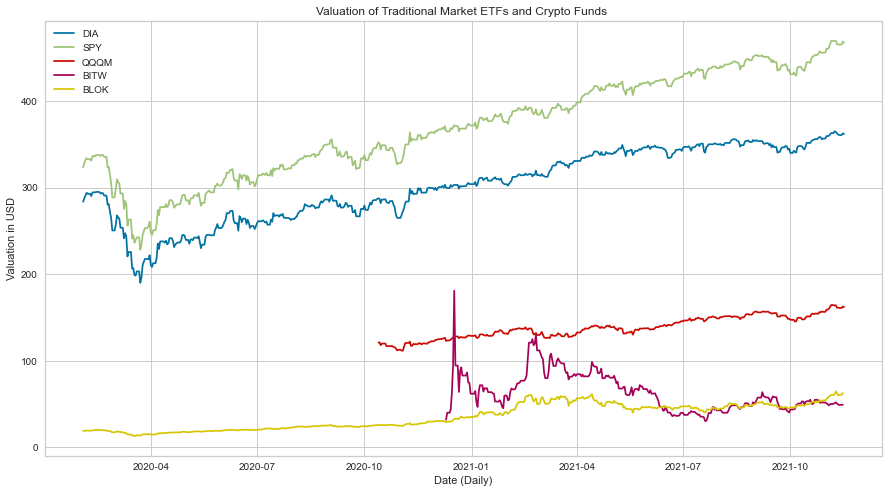

In [30]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(111)

ax1.plot(dowjones['Open'])
ax1.plot(sp500['Open'])
ax1.plot(nasdaq['Open'])
ax1.plot(bitwise['Open'])
ax1.plot(blok['Open'])
plt.legend(['DIA', 'SPY', 'QQQM', 'BITW', 'BLOK'])
plt.title('Valuation of Traditional Market ETFs and Crypto Funds ')
plt.xlabel('Date (Daily)')
plt.ylabel('Valuation in USD');
plt.show()

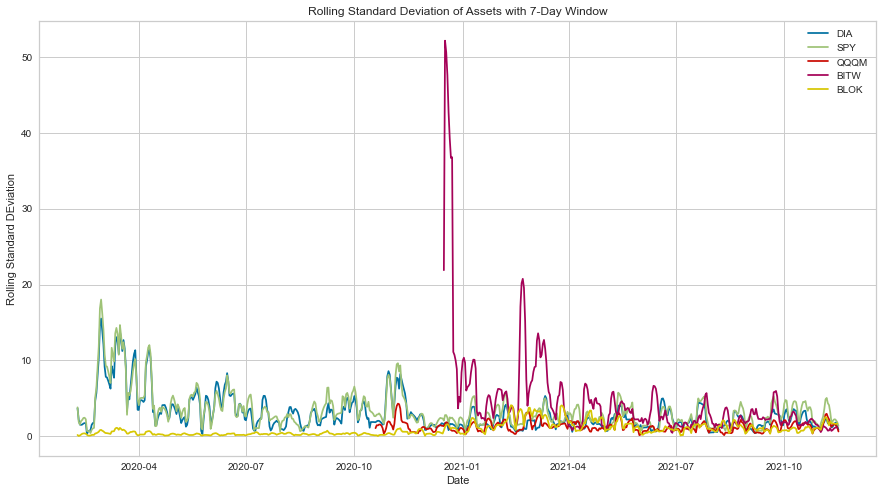

In [31]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(111)

ax1.plot(dowjones['Open'].rolling(7).std())
ax1.plot(sp500['Open'].rolling(7).std())
ax1.plot(nasdaq['Open'].rolling(7).std())
ax1.plot(bitwise['Open'].rolling(7).std())
ax1.plot(blok['Open'].rolling(7).std())
plt.title('Rolling Standard Deviation of Assets with 7-Day Window')
ax1.legend(['DIA', 'SPY', 'QQQM', 'BITW', 'BLOK'])
plt.xlabel('Date')
plt.ylabel('Rolling Standard DEviation')
plt.show();

In [32]:
def boxit(DataFrame, column):
    """ Returns boxplot of chosen independent column and dependent column.
        
        Parameters:
        DataFrame: A Pandas DataFrame
        Independent: Column or feature from dataframe to be chosen as the predictor variable
        """
    fig, ax = plt.subplots(figsize= (20, 3), sharey = True)
    ax = sns.boxplot(data = DataFrame, x = column)
    ax.set_title('Distribution of Opening Values')
    ax.set_xlabel('Opening Values')
    return

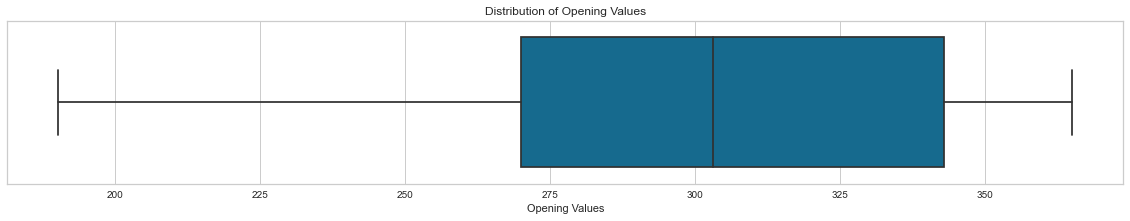

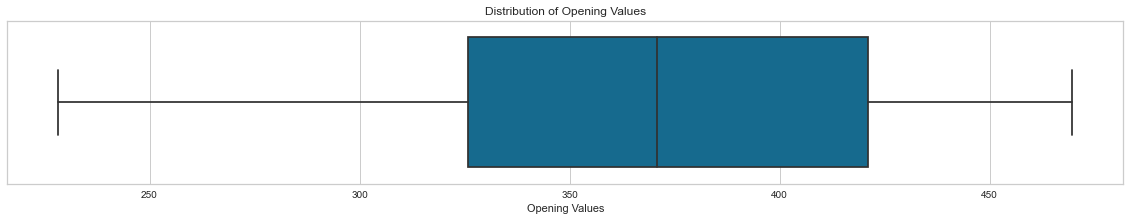

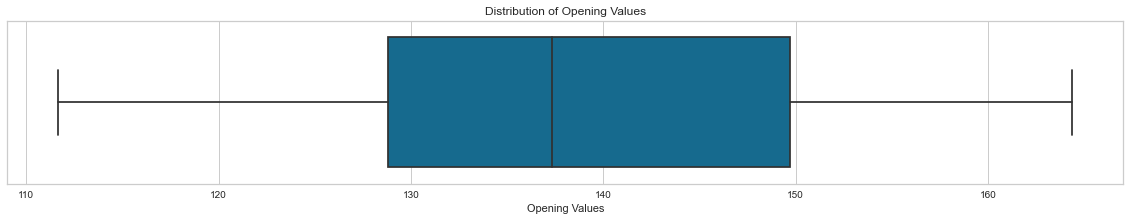

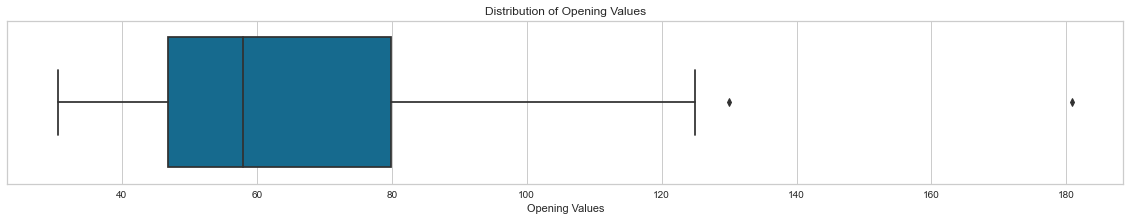

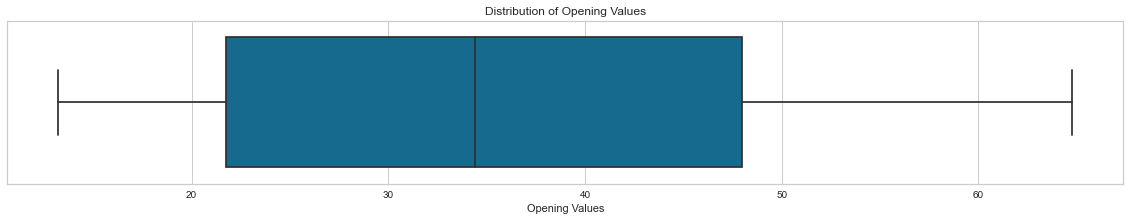

In [33]:
boxit(dowjones, 'Open')
boxit(sp500, 'Open')
boxit(nasdaq, 'Open')
boxit(bitwise, 'Open')
boxit(blok, 'Open')

With the exception of BITW, the whiskers of the boxplots show that price ranges of each exchange traded fund mirrors the time dependent nature of each ETF's price fluctuations. The starting and ending opening prices of DIA, SPY, QQQM, and BLOK are visualized by the whiskers in the boxplots. BITW shows the peak it reached early in January 2021. The traditional market funds also exhibit positive-skewness.

### Feature Engineering

We will create a column as 'daily_price' that will add the values of columns 'Open', 'Close', 'High', 'Low', and 'Adj Close' and use the quotient for the row values. This is so that we can time series using the price action from throughout the whole day as a single datapoint.

In [34]:
def price_quotient(df):
    """Takes in dataframe and calculates mean of several columns 
    to create a new column called 'daily_price
    
    Parameters:
    df: Pandas DataFrame"""
    
    sums = df['Open'] + df['Close'] + df['High'] + df['Low'] + df['Adj Close']
    return sums/5

In [35]:
dowjones['daily_price'] = price_quotient(dowjones)
sp500['daily_price'] = price_quotient(sp500)
nasdaq['daily_price'] = price_quotient(nasdaq)
bitwise['daily_price'] = price_quotient(bitwise)
blok['daily_price'] = price_quotient(blok)

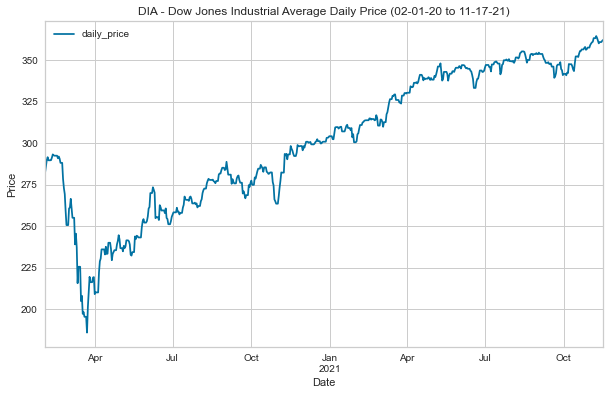

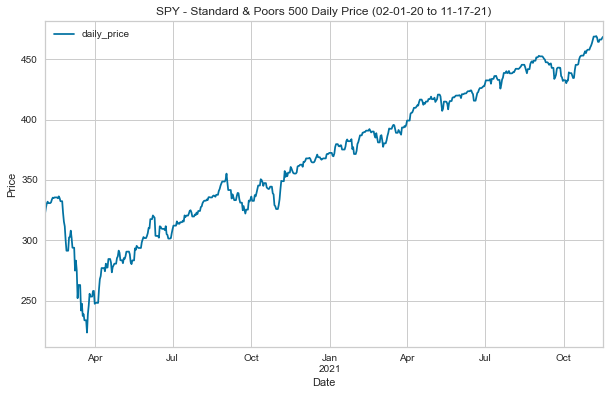

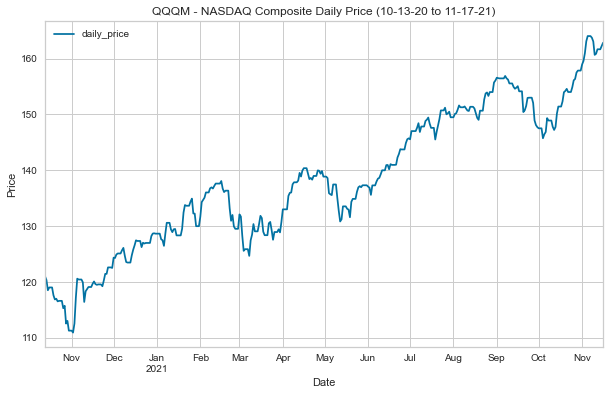

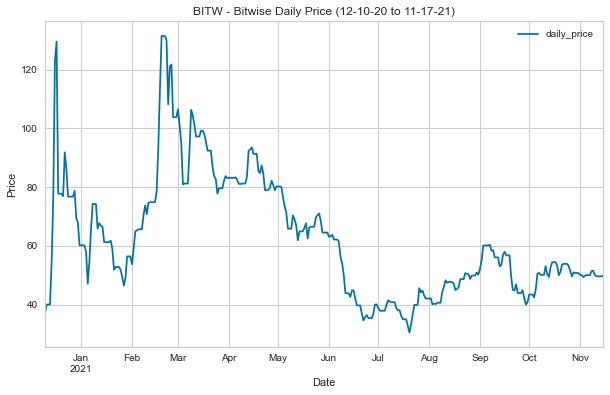

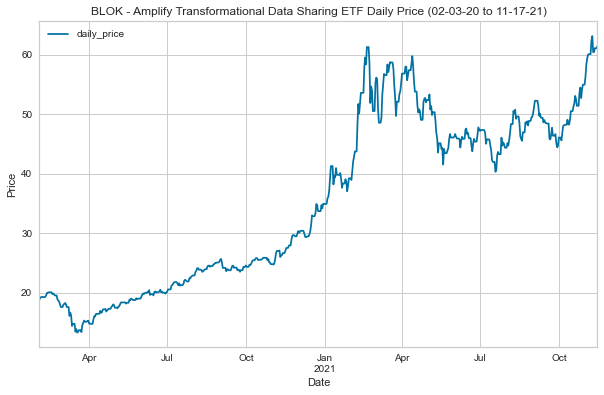

In [36]:
dowjones['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('DIA - Dow Jones Industrial Average Daily Price (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
sp500['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('SPY - Standard & Poors 500 Daily Price (02-01-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
nasdaq['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('QQQM - NASDAQ Composite Daily Price (10-13-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
bitwise['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BITW - Bitwise Daily Price (12-10-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();
blok['daily_price'].plot(figsize = (10,6), subplots=False, legend=True)
plt.title('BLOK - Amplify Transformational Data Sharing ETF Daily Price (02-03-20 to 11-17-21)')
plt.ylabel('Price')
plt.show();

The trends and price movements do not change drastically from the initial visualization of the 'Open' and 'Close' columns only.

### Stationarity Check

Below, we use the Dickey-Fuller test to measure the stationarity of each time series. The Dickey-Fuller Test tests the hypothesis that a unit root is present in time series models. The unit root is simply a value which indicates the time series will need to be differenced in order for it to be stationary. Lower test statistic scores are ideal for better stochastic proccesses (more random, and less time dependent time series). 

In [37]:
def stationarity_check(TS, column):
    """Takes in TimeSeries DataFrame and column"""
    
    # Calculate rolling statistics
    roll_mean = TS[column].rolling(window=8, center=False).mean()
    roll_std = TS[column].rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column][1:])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS[column], color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

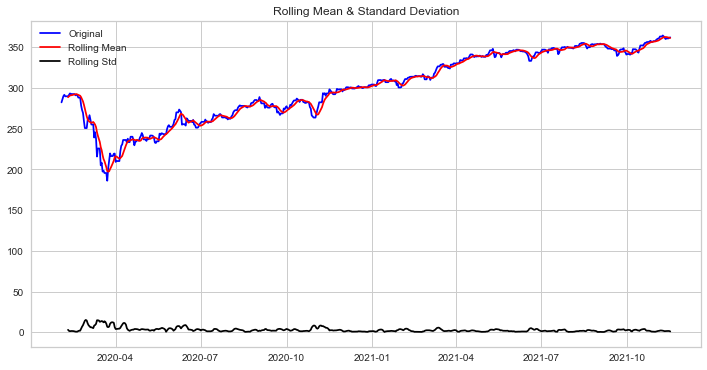

Results of Dickey-Fuller Test: 

Test Statistic                  -0.682574
p-value                          0.851212
#Lags Used                      11.000000
Number of Observations Used    640.000000
Critical Value (1%)             -3.440609
Critical Value (5%)             -2.866067
Critical Value (10%)            -2.569181
dtype: float64


In [38]:
stationarity_check(dowjones,'daily_price')

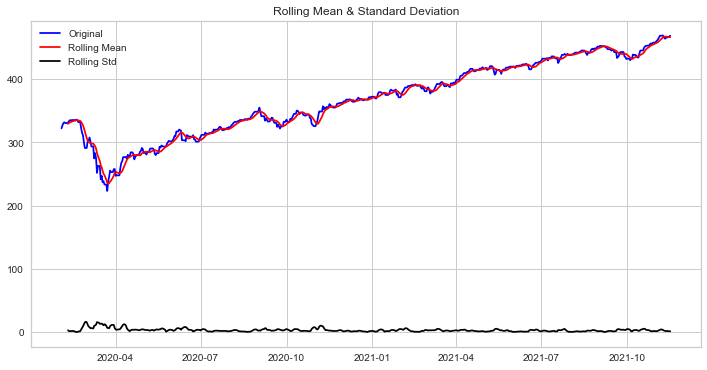

Results of Dickey-Fuller Test: 

Test Statistic                  -0.318217
p-value                          0.922884
#Lags Used                      13.000000
Number of Observations Used    638.000000
Critical Value (1%)             -3.440641
Critical Value (5%)             -2.866081
Critical Value (10%)            -2.569188
dtype: float64


In [39]:
stationarity_check(sp500,'daily_price')

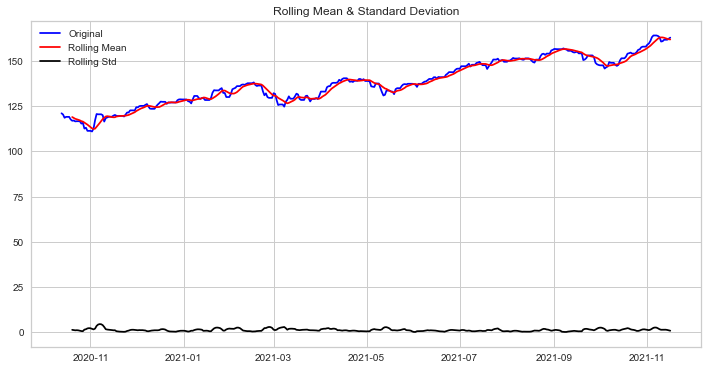

Results of Dickey-Fuller Test: 

Test Statistic                  -0.680692
p-value                          0.851688
#Lags Used                       1.000000
Number of Observations Used    397.000000
Critical Value (1%)             -3.446930
Critical Value (5%)             -2.868848
Critical Value (10%)            -2.570663
dtype: float64


In [40]:
stationarity_check(nasdaq,'daily_price')

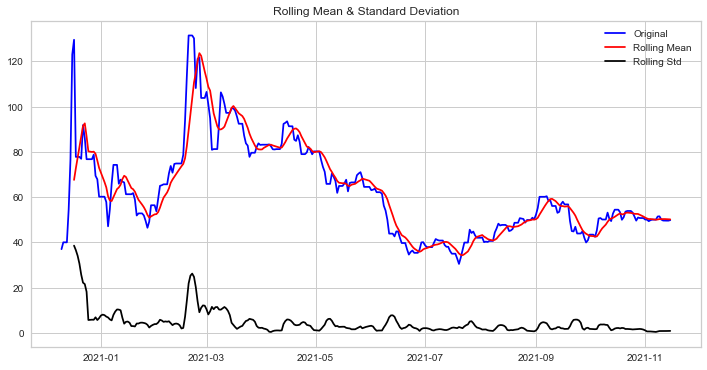

Results of Dickey-Fuller Test: 

Test Statistic                  -3.225854
p-value                          0.018536
#Lags Used                       1.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [41]:
stationarity_check(bitwise,'daily_price')

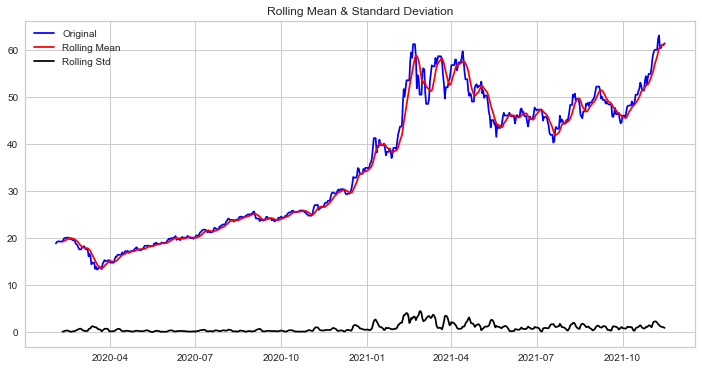

Results of Dickey-Fuller Test: 

Test Statistic                  -0.022014
p-value                          0.956673
#Lags Used                      16.000000
Number of Observations Used    634.000000
Critical Value (1%)             -3.440706
Critical Value (5%)             -2.866110
Critical Value (10%)            -2.569203
dtype: float64


In [42]:
stationarity_check(blok,'daily_price')

Unsurprisingly, none of the data exhibit stationarity. The test statisstic score for all five fail to be lower than the critical value at 1, 5, and 10 percent. Thus we fail to reject the null hypothesis that the unit root does not exist for the data. We will address the problem of stationarity by first conducting decomposition. Later, we will use SARIMAX to grid search the best parameters for pdq and PDQ (seasonality) to further hone models and further iterations. 

### Tracking Daily Percent Return 

Creating a column that shows the percent difference between the each day's price could provide us with a time series that is less time dependent. Historically, in a properly functioning economy, returns do tend to fluctuate around a small positive value. Note that in the case of a stock index it is a bit more complicated, since underperforming companies leave the index and better performing companies are added, so the return on the index tends to be higher than what you would expect for an individual company.

In [43]:
def perc_column(df):
    """Takes in dataframe and creates column called 'Percent' that tracks changes in daily value
    
    Parameters:
    df: pandas DataFrame"""
    
    df['return_daily_perc'] = df['daily_price'].pct_change()
    return df['return_daily_perc']

In [44]:
dowjones['return_daily_perc'] = perc_column(dowjones)
sp500['return_daily_perc'] = perc_column(sp500)
nasdaq['return_daily_perc'] = perc_column(nasdaq)
bitwise['return_daily_perc'] = perc_column(bitwise)
blok['return_daily_perc'] = perc_column(blok)

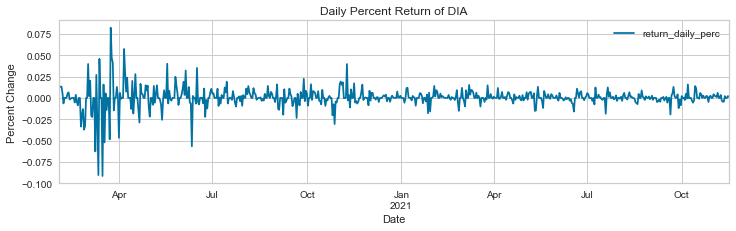

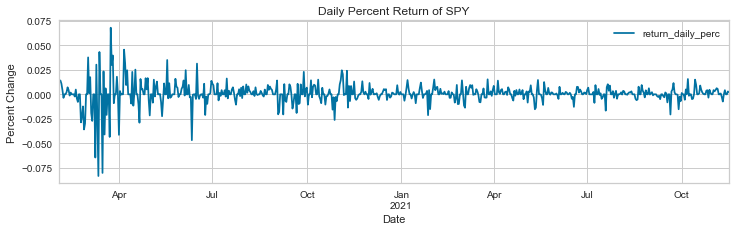

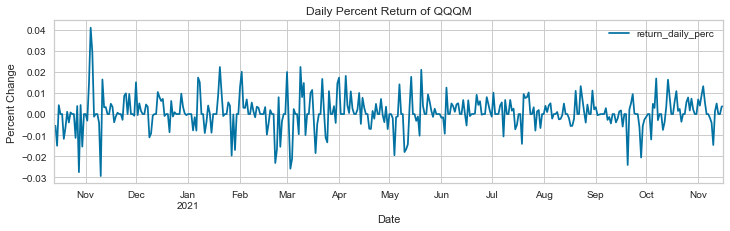

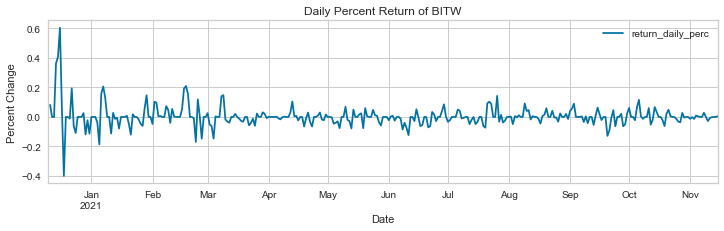

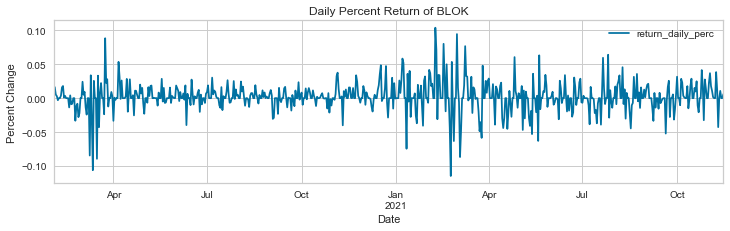

In [45]:
dowjones['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of DIA')
plt.ylabel('Percent Change')
plt.show();
sp500['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of SPY')
plt.ylabel('Percent Change')
plt.show();
nasdaq['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of QQQM')
plt.ylabel('Percent Change')
plt.show();
bitwise['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of BITW')
plt.ylabel('Percent Change')
plt.show();
blok['return_daily_perc'].plot(figsize = (12,3), subplots=False, legend=True)
plt.title('Daily Percent Return of BLOK')
plt.ylabel('Percent Change')
plt.show();

For all five ETFs/Index Fund, the graph of daily percent return appears to already more stationary than simply plotting the prices for each. This implies that the percent return is less time-dependent and exhibit more randomness. The next step would be to determine if there are other underlying unit roots by looking at seasonality and residuals. We will do this by applying decomposition to the 'daily_percent' column for all the dataframes. The relatively larege fluctuations in daily percentage return for the first month for DIA and SP500 can be attributed to the global market pullback due to SARS-COV19. 

### Autocorrelation (ACF) and Partial Autocorrelation (PACF)

Prior to using SARIMAX, we will plot the autocorrelation and partial autocorrelation functions to have some idea of the optimal lags for the 'daily_price' column. This can be the basis by which we compare and evaluate the values outputted SARIMAX grid searches.

#### Dow Jones Industrial Average

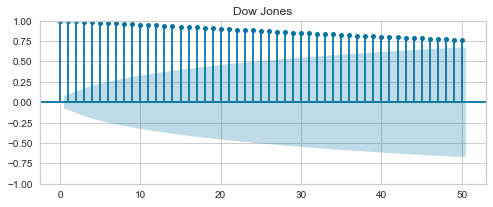

In [46]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(dowjones['daily_price'],ax=ax, lags=50);
ax.set_title('Dow Jones');

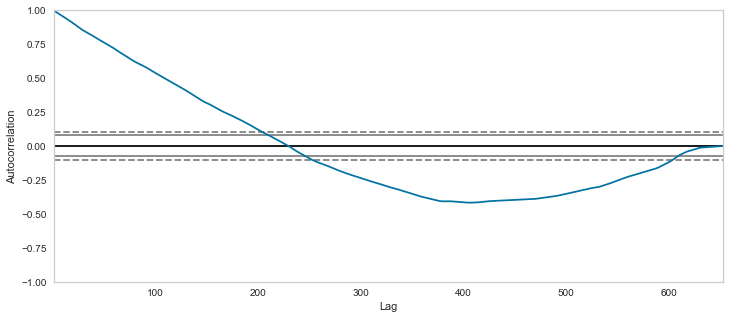

In [47]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(dowjones['daily_price']);

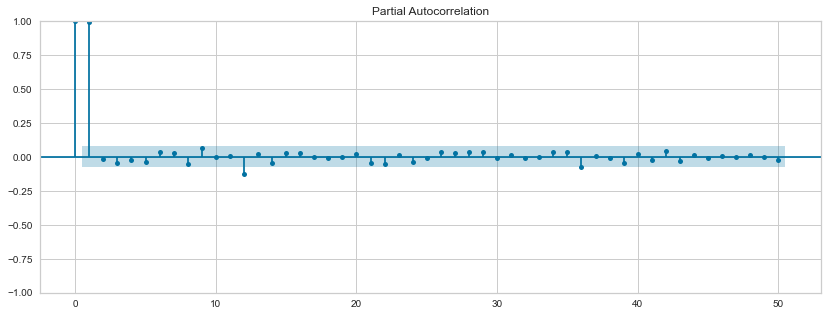

In [48]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(dowjones['daily_price'], lags=50, method='ywm');

#### Standard & Poor's 500

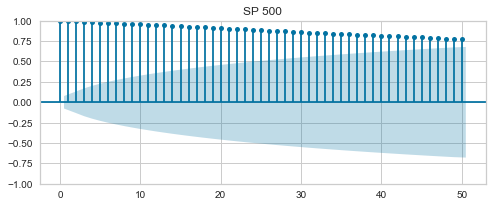

In [49]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(sp500['daily_price'],ax=ax, lags=50);
ax.set_title('SP 500');

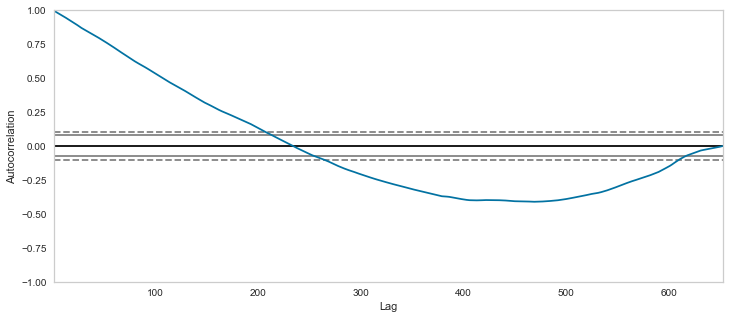

In [50]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sp500['daily_price']);

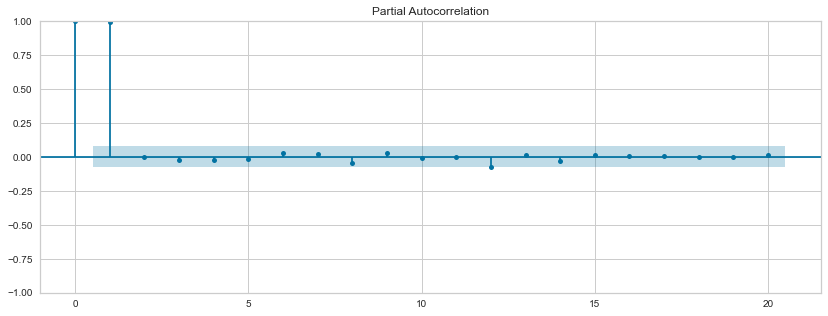

In [51]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(sp500['daily_price'], lags=20, method='ywm');

#### Nasdaq Composite

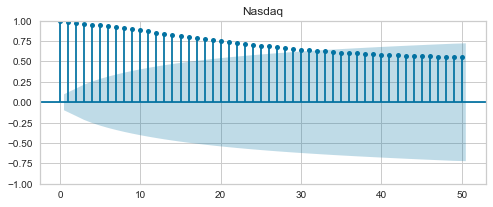

In [52]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(nasdaq['daily_price'],ax=ax, lags=50);
ax.set_title('Nasdaq');

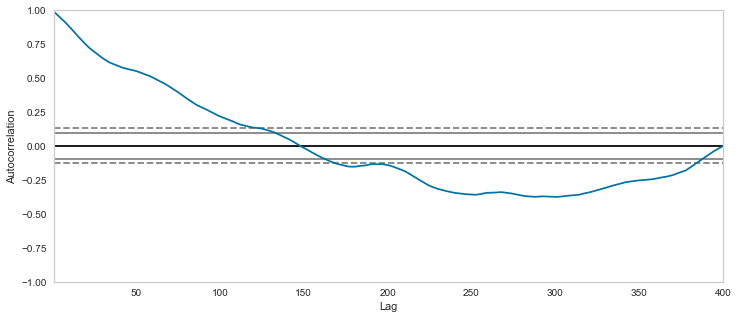

In [53]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nasdaq['daily_price']);

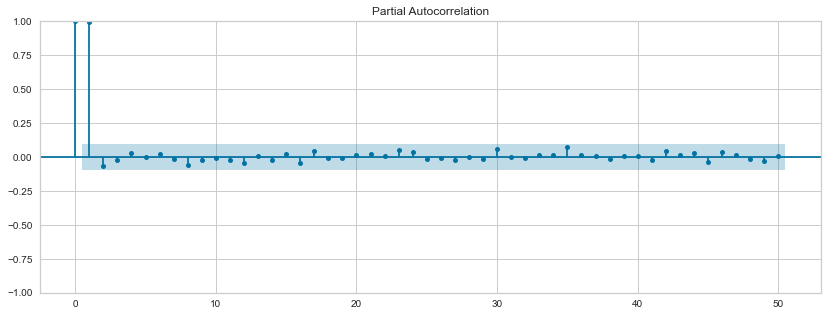

In [54]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(nasdaq['daily_price'], lags=50, method='ywm');

#### Bitwise

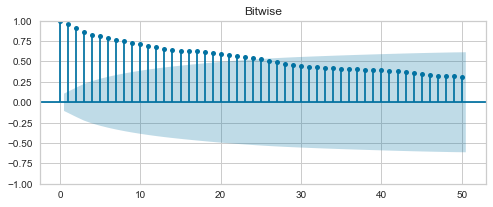

In [55]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(bitwise['daily_price'],ax=ax, lags=50);
ax.set_title('Bitwise');

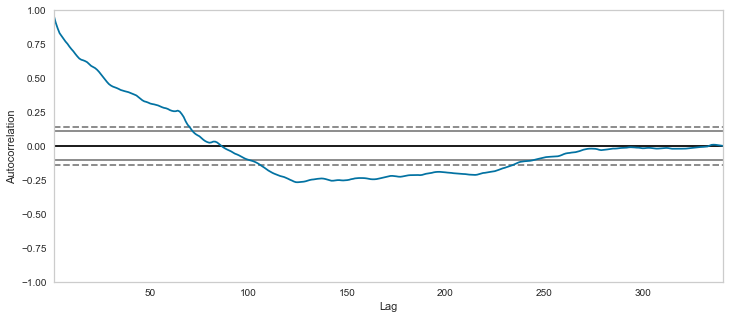

In [56]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(bitwise['daily_price']);

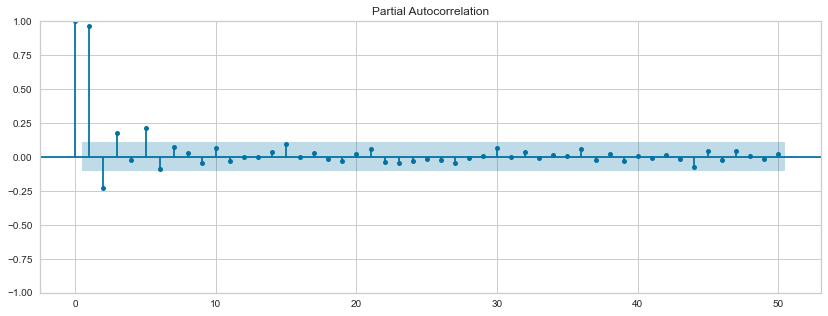

In [57]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(bitwise['daily_price'], lags=50, method='ywm');

#### Amplify Transformational Data Sharing ETF

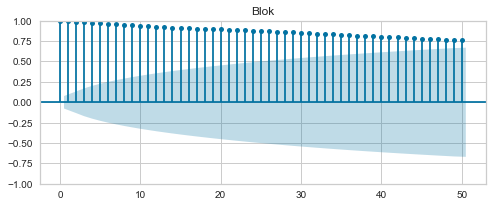

In [58]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(blok['daily_price'],ax=ax, lags=50);
ax.set_title('Blok');

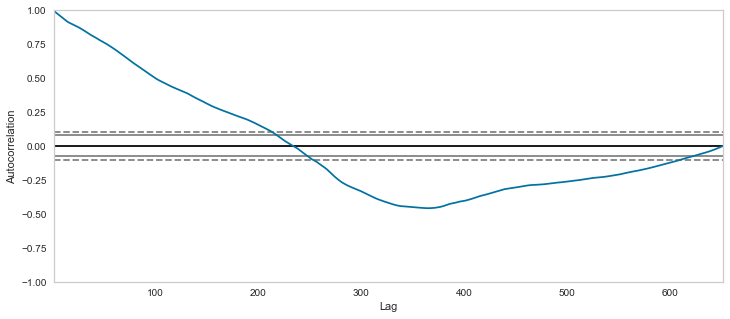

In [59]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(blok['daily_price']);

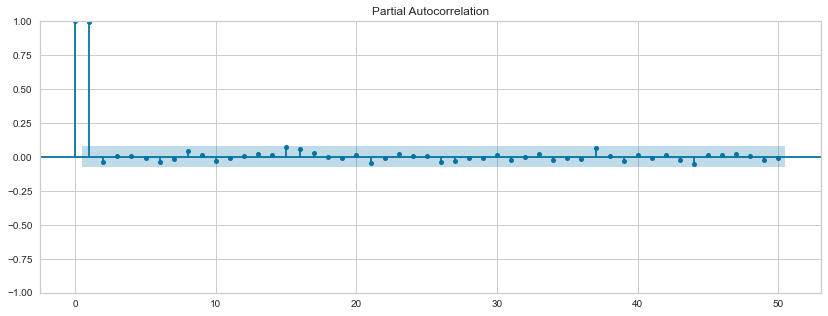

In [60]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(blok['daily_price'], lags=50, method='ywm');

### Decomposition

Decomposing the time series will allow us to look at other unit roots that disrupt stationarity. Namely, these are trends (positive or negative), seasonality, and residuals. All of which, may exhibit some form of time dependency. 

In [61]:
def decompose(df):
    """Takes a pandas DataFrame and plots the trend, seasonality, and residuals of time series
    
    Parameter:
    df: pandas DataFrame"""
    
    decomposition = seasonal_decompose(df['return_daily_perc'][1:], period=5)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(df['return_daily_perc'][1:], label='Original', color='blue')
    plt.legend(loc='best')
    plt.title('Daily Percentage Return')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonality')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title('Residuals')
    plt.tight_layout()
    
    return None

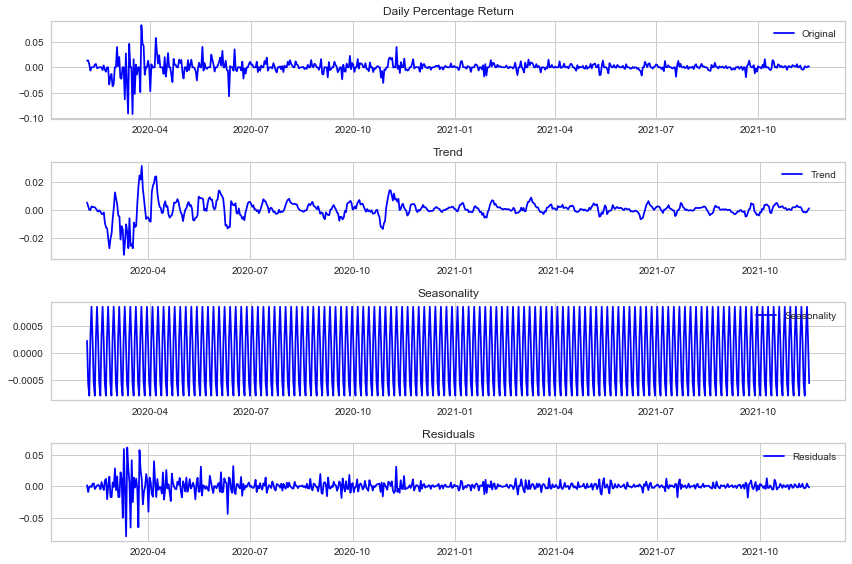

In [62]:
decompose(dowjones)

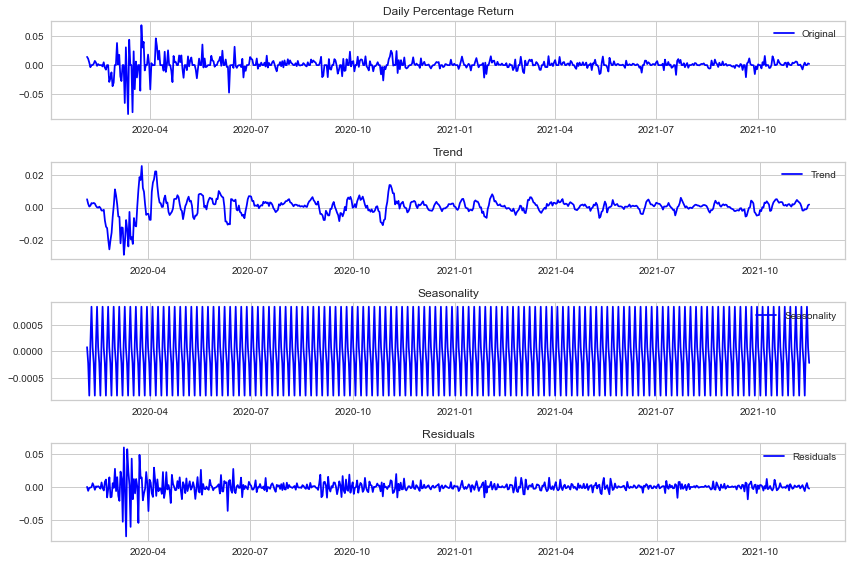

In [63]:
decompose(sp500)

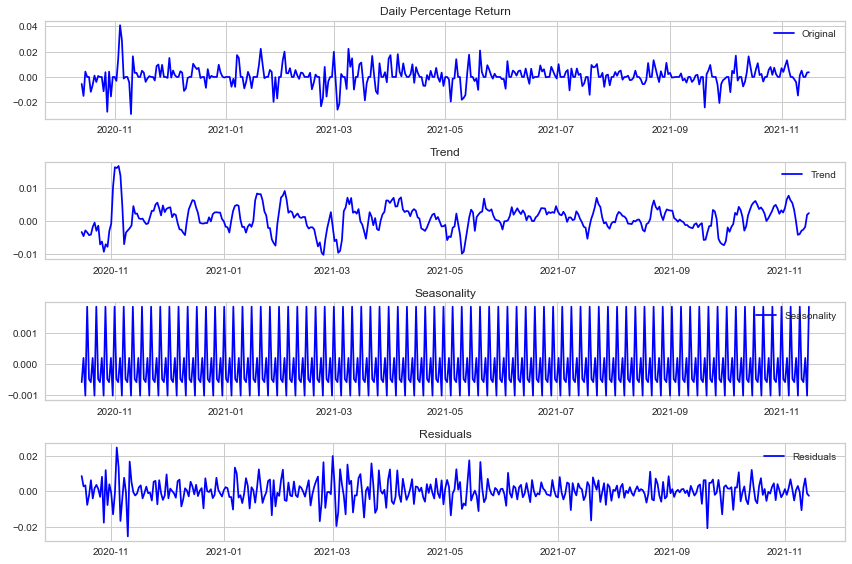

In [64]:
decompose(nasdaq)

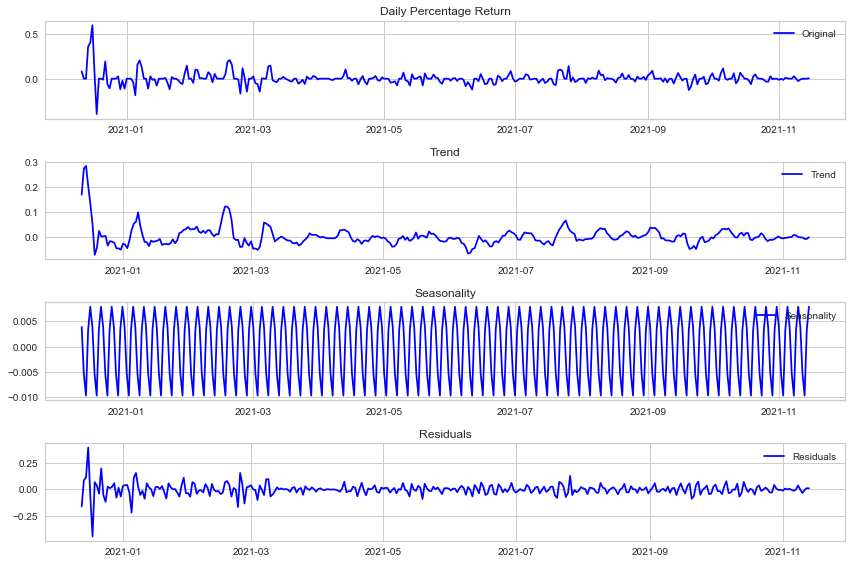

In [65]:
decompose(bitwise)

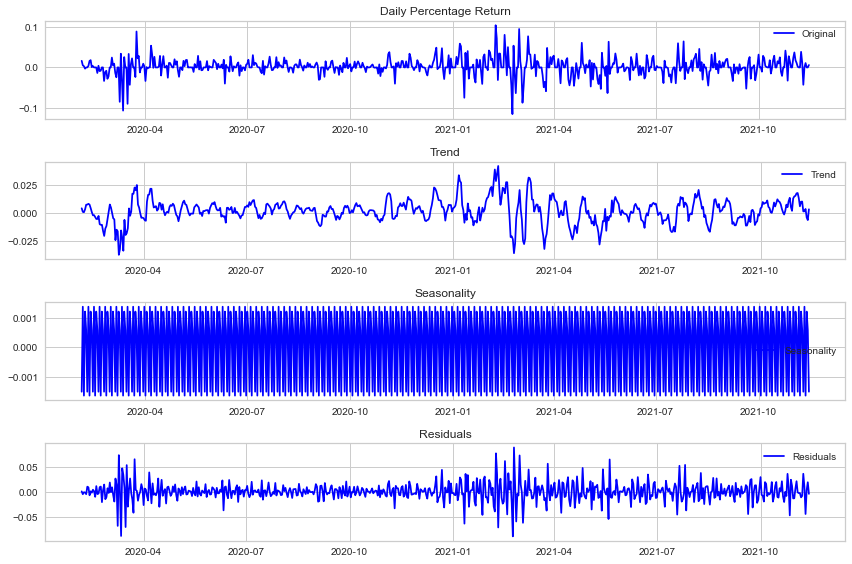

In [66]:
decompose(blok)

The residuals and trend of all of the time series appear to be stationary. With the execption of the global market pullback in March 2020, and the crypto-market pullpack in January of 2021, the trends and random noise do not show time-dependence. The seasonality of the DowJones and SP500 ETFs recur in roughly biweejly cycles. There are about 13-15 troughs in between 3-month periods. Nasdaq's and Bitwise's seasonality follows a weekly cycle, while Blok has a cycle between 1 and 2 weeks. 

### Dickey-Fuller Test & Stationarity Check

The Dickey-Fuller Test tests for the presence of a unit root in a time series. The test stastic that is outputted has a inverse relationship with rejecting the null hypothesis that there is a unit root present in the time series. In other words, if the calculated tau value is less than the critical value in the table of critical values, then we have a significant result; otherwise, we accept the null hypothesis that there is a unit root and the time series is not stationary.

In [67]:
def stationarity_check(TS, column):
    """Takes in TimeSeries DataFrame and column"""
    
    # Calculate rolling statistics
    roll_mean = TS[column].rolling(window=8, center=False).mean()
    roll_std = TS[column].rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column][1:])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS[column], color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

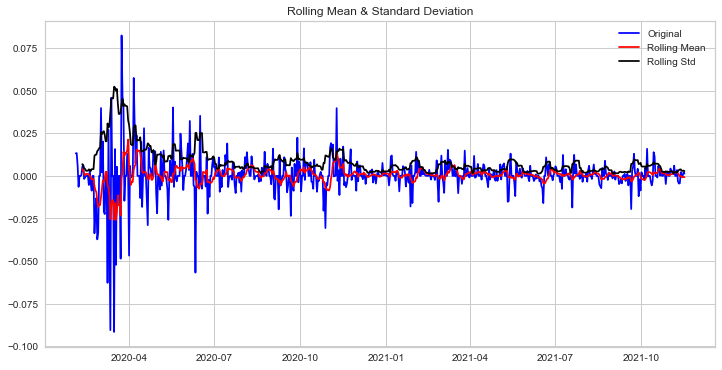

Results of Dickey-Fuller Test: 

Test Statistic                -6.476461e+00
p-value                        1.327401e-08
#Lags Used                     1.400000e+01
Number of Observations Used    6.370000e+02
Critical Value (1%)           -3.440657e+00
Critical Value (5%)           -2.866088e+00
Critical Value (10%)          -2.569192e+00
dtype: float64


In [68]:
stationarity_check(dowjones, 'return_daily_perc')

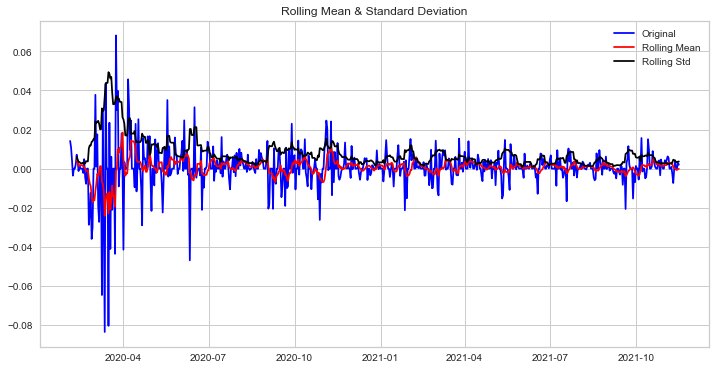

Results of Dickey-Fuller Test: 

Test Statistic                -5.881466e+00
p-value                        3.071263e-07
#Lags Used                     1.400000e+01
Number of Observations Used    6.370000e+02
Critical Value (1%)           -3.440657e+00
Critical Value (5%)           -2.866088e+00
Critical Value (10%)          -2.569192e+00
dtype: float64


In [69]:
stationarity_check(sp500, 'return_daily_perc')

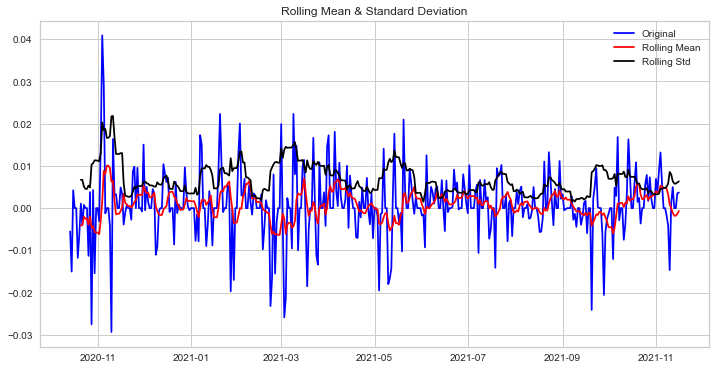

Results of Dickey-Fuller Test: 

Test Statistic                -1.182801e+01
p-value                        8.116242e-22
#Lags Used                     2.000000e+00
Number of Observations Used    3.960000e+02
Critical Value (1%)           -3.446972e+00
Critical Value (5%)           -2.868866e+00
Critical Value (10%)          -2.570673e+00
dtype: float64


In [70]:
stationarity_check(nasdaq, 'return_daily_perc')

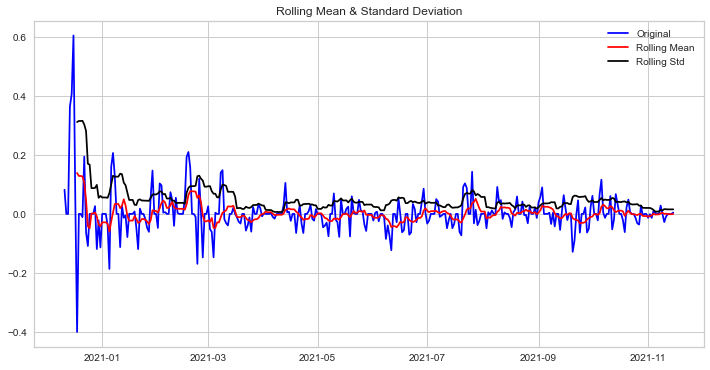

Results of Dickey-Fuller Test: 

Test Statistic                -1.242581e+01
p-value                        4.041458e-23
#Lags Used                     1.000000e+00
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [71]:
stationarity_check(bitwise, 'return_daily_perc')

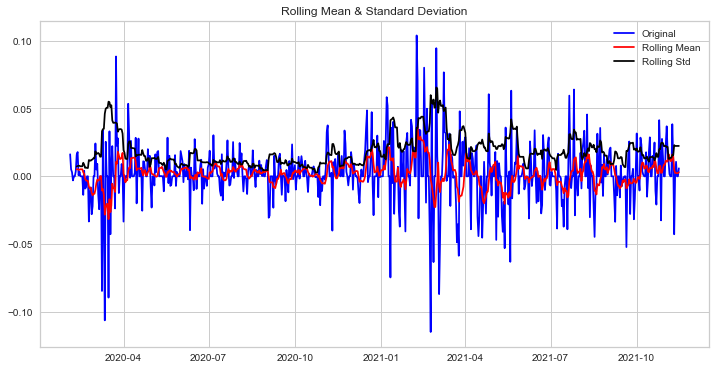

Results of Dickey-Fuller Test: 

Test Statistic                 -23.735120
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    650.000000
Critical Value (1%)             -3.440450
Critical Value (5%)             -2.865997
Critical Value (10%)            -2.569143
dtype: float64


In [72]:
stationarity_check(blok, 'return_daily_perc')

The only time series to exhibit stationarity across 1%, 5%, and 10% critical values is the Nasdaq ETF. Bitwise ETF is able to reject the null hypothesis that there is a unit root at only 1% critical value. Applying a log transformation on these values may help in smoothing out the time series. We will attempt to transform the time series to arrive to an optimal stationary state. However, in the event that we do not, the rolling standard deviation, and rolling mean for these time series do appear to revolve around a set mean and standard deviation to be able to be plugged into ARIMA modeling. 

### Log Transformation

In order to have an optimal time series to be fed into modeling, we will apply log transformations on the column 'return_daily_perc' for all five ETFs/Index Fund. This process should smooth out the the values and create a more stationary time series.

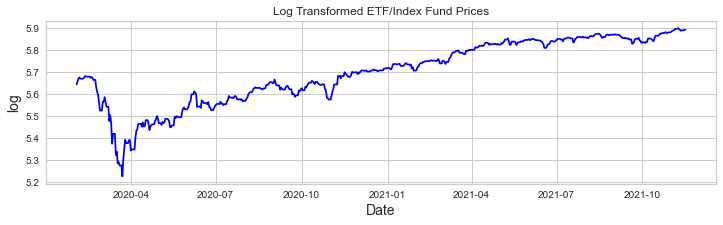

In [73]:
dowjones['log_rdp'] = np.log(dowjones['daily_price'])
log_dow = np.log(dowjones['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_dow, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

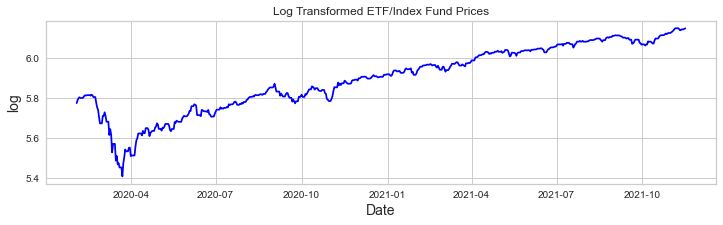

In [74]:
sp500['log_rdp'] = np.log(sp500['daily_price'])
log_sp = np.log(sp500['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_sp, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

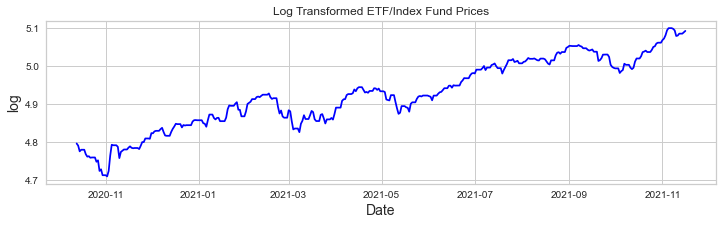

In [75]:
nasdaq['log_rdp'] = np.log(nasdaq['daily_price'])
log_nas = np.log(nasdaq['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_nas, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

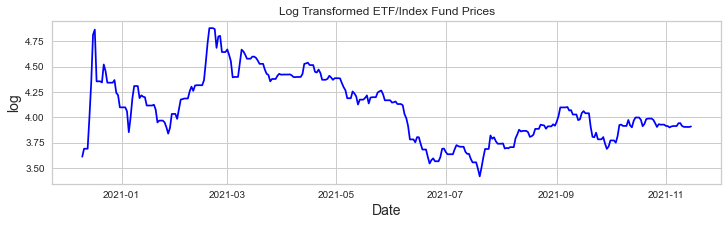

In [76]:
bitwise['log_rdp'] = np.log(bitwise['daily_price'])
log_bit = np.log(bitwise['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_bit, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

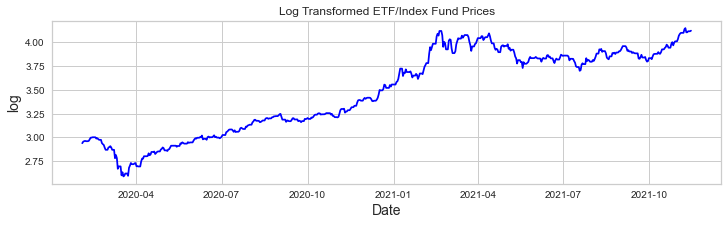

In [77]:
blok['log_rdp'] = np.log(blok['daily_price'])
log_blok = np.log(blok['daily_price'])
fig = plt.figure(figsize=(12,3))
plt.plot(log_blok, color='blue')
plt.title('Log Transformed ETF/Index Fund Prices')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log', fontsize=14)
plt.show()

In [78]:
def perc_log(df):
    """Takes in dataframe and creates column called 'Percent' that tracks changes in daily value
    
    Parameters:
    df: pandas DataFrame"""
    
    df['log_perc_ret'] = df['log_rdp'].pct_change()
    return df['log_perc_ret']

In [79]:
dowjones['log_perc_ret'] = perc_log(dowjones)

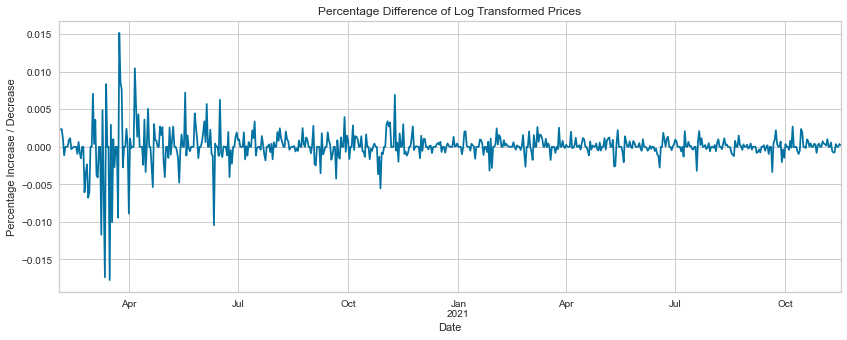

In [80]:
dowjones['log_perc_ret'].plot()
plt.title('Percentage Difference of Log Transformed Prices')
plt.ylabel('Percentage Increase / Decrease');

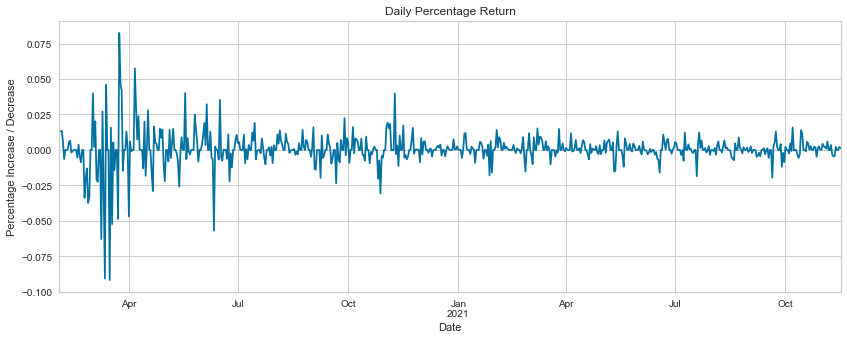

In [81]:
dowjones['return_daily_perc'].plot()
plt.title('Daily Percentage Return')
plt.ylabel('Percentage Increase / Decrease');

Unfortunately, the graphs of 'return_daily_perc' and 'log_perc_ret' which catalogue the daily percentage price movement and the daily percentage movement of the logged values of the original price, the fluctuations appear to be the same. Albeit, the changes range for 'log_perc_ret' is roughly between 0.015 and -.015 while for  'return_daily_perc' is roughly between 0.075 and -.075. 

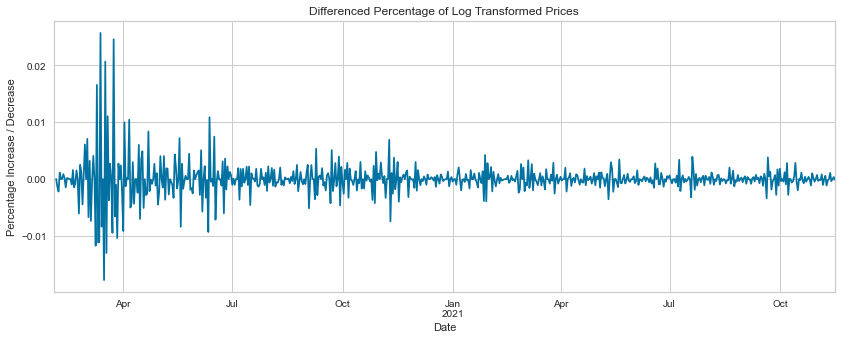

In [82]:
dowjones['log_perc_ret'].diff().plot()
plt.title('Differenced Percentage of Log Transformed Prices')
plt.ylabel('Percentage Increase / Decrease');

Similarly with the previous comparison between daily percentage return and percentage difference of log transformed data, the difference dataset of logged values do not deviate much in shape. The high degree of oscillation in the beginning period of the time series remains. For this reason, we will choose to stick with the column 'return_daily_perc' in our time series models. Log transformation and differencing do not make the data stationary, so for simplicity's sake, the regular daily percentage return will be used. 

### Train-Test Split

In order to move ahead with modeling, we create training data and test data. This is done so later model iterations can learn from the training data, and then measure its predictions against actually observed data. We do this for all five ETFs/Index Fund. We will use the 'return_daily_perc' column, an aggregate column of each row's price points throughout the day.

In [83]:
end_dow = round(dowjones['return_daily_perc'].shape[0] * .8)
train_dowjones = dowjones['return_daily_perc'][:end_dow]

end_sp = round(sp500['return_daily_perc'].shape[0] * .8)
train_sp500 = sp500['return_daily_perc'][:end_sp]

end_nas = round(nasdaq['return_daily_perc'].shape[0]* .8)
train_nasdaq = nasdaq['return_daily_perc'][:end_nas]

end_bit = round(bitwise['return_daily_perc'].shape[0]* .8)
train_bitwise = bitwise['return_daily_perc'][:end_bit]

end_blok = round(blok['return_daily_perc'].shape[0] * .8)
train_blok = blok['return_daily_perc'][:end_blok]

In [84]:
test_dowjones = dowjones['return_daily_perc'][end_dow:]
test_sp500 = sp500['return_daily_perc'][end_sp:]
test_nasdaq = nasdaq['return_daily_perc'][end_nas:]
test_bitwise = bitwise['return_daily_perc'][end_bit:]
test_blok = blok['return_daily_perc'][end_blok:]

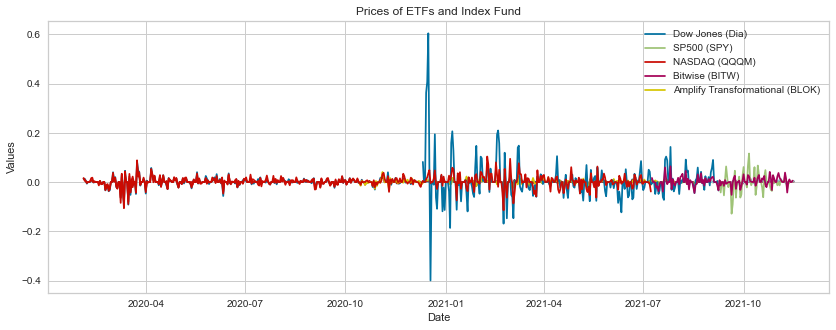

In [85]:
fig, ax = plt.subplots()
ax.plot(train_dowjones)
ax.plot(test_dowjones)

ax.plot(train_sp500)
ax.plot(test_sp500)

ax.plot(train_nasdaq)
ax.plot(test_nasdaq)

ax.plot(train_bitwise)
ax.plot(test_bitwise)

ax.plot(train_blok)
ax.plot(test_blok)

ax.legend(['Dow Jones (Dia)', 'SP500 (SPY)', 'NASDAQ (QQQM)', 'Bitwise (BITW)', 'Amplify Transformational (BLOK)'])
ax.set_title('Prices of ETFs and Index Fund')
ax.set_xlabel('Date')
ax.set_ylabel('Values');

With the exception of Bitwise, the time series exhibit stationarity. The high degree of time dependent variance shown by Bitwise's time series can be explained by the crypto-market pullback seen in early 2021. The months long bull run following March, 2020 seen in the crypto world needed a much needed respite in order to sustain a positive longterm outlook. 

### Random Walk Model

This second random walk model looks at only the DowJones time series. This is to check if an initial random walk iteration with a lag 41 would be helpful in forecasting. This lag is taken from the value outputted by the Autocorrelation Function graph we plotted earlier. 

In [86]:
random_walk1 = train_dowjones.shift(41)

fig, ax = plt.subplots()

train_dowjones.plot(ax = ax, c ='r', label = 'original')
random_walk1.plot(ax = ax, c ='b', label = 'shifted')
ax.set_title('DowJones Industrial ETF Time Series with Lag of 41 Observed Days')
ax.set_ylabel('Percentage Return Daily');

In [87]:
residuals1 = random_walk1 - train_dowjones
rmse1 = mean_squared_error(train_dowjones[42:], random_walk1.dropna(), squared = False)
rmse1

0.017947143850600054

The root mean squared error of the two time series is quite low, indicating low variance between the two. Attempting either raising or decreasing the number of lags raises the RMSE. This shows that the number of lags will be around 41, a number we can look for when conducting SARIMAX grid search

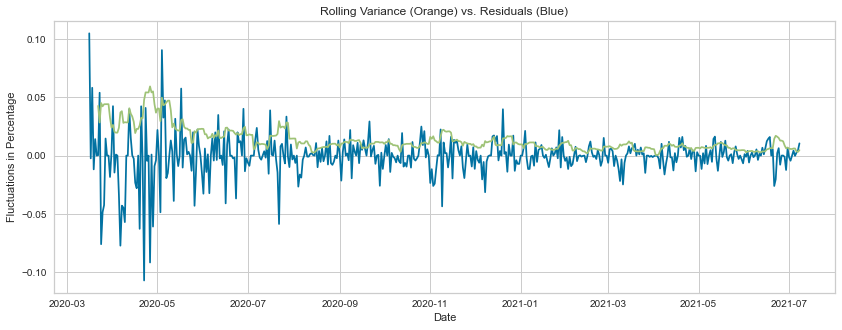

In [88]:
fig, ax = plt.subplots()
ax.plot(residuals1.index, residuals1)
ax.plot(residuals1.index, residuals1.rolling(7).std())
ax.set_title('Rolling Variance (Orange) vs. Residuals (Blue)')
ax.set_ylabel('Fluctuations in Percentage')
ax.set_xlabel('Date');

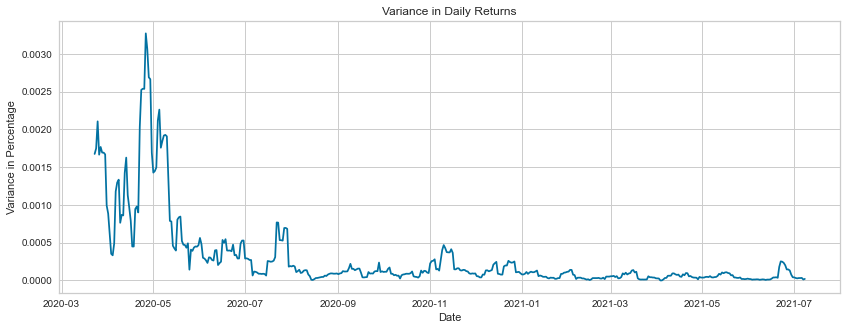

In [89]:
plt.plot(residuals1.index, residuals1.rolling(8).var())
plt.title('Variance in Daily Returns')
plt.xlabel('Date')
plt.ylabel('Variance in Percentage');

The residuals plot of the dowjones train set shows a slight time dependence in variance. The large spike in variance in the beginning of the time series coincides with the market's relatively swift rebound from March, 2020's global financial pullback. 

### ARIMA

ARIMA stands for Autoregressive Integrated Moving Average. In the cells below, we look at the results of modeling by inputting values for the parameters (p,d,q) as shown by the autocorrelation and partial autocorrelation tests. These parametrs perform lag, integration, and error lag on the time series.

#### Integration
Here we plug in a value of 0 to parameter of d in (p,0,q). This differences the time series by an order of 0.

In [90]:
rw1 = ARIMA(train_dowjones[1:], order = (0,0,0)).fit()
rw1.predict(typ= 'levels')

2020-02-04    0.000455
2020-02-05    0.000455
2020-02-06    0.000455
2020-02-07    0.000455
2020-02-08    0.000455
                ...   
2021-07-04    0.000455
2021-07-05    0.000455
2021-07-06    0.000455
2021-07-07    0.000455
2021-07-08    0.000455
Freq: D, Name: predicted_mean, Length: 521, dtype: float64

In [91]:
y_hat_rw1 = rw1.predict(typ = 'levels')
rmse_rw1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_rw1))
rmse_rw1

0.013011988974154287

The non-integrated ARIMA model has a lower root mean square error of ~0.0156 as opposed to a RMSE of ~0.0198 seen with the initial random walk model. 

#### Autoregression

Here we plug in 1 for the paramter of p in (1, d, q). We apply of a lag of 1 onto the time series. Autoregression is a modeling technique that uses observed data from previous time steps to predict values at the next time step. The partial autocorrelation graph showed that after lag 1, the error term ceases to be statistically significant, thus a value of 1 will be used for p.

In [92]:
ar1 = ARIMA(train_dowjones[1:], order = (1,0,0)).fit()
ar1.predict(typ='levels')

2020-02-04    0.000460
2020-02-05    0.000665
2020-02-06    0.000668
2020-02-07    0.000548
2020-02-08    0.000349
                ...   
2021-07-04    0.000453
2021-07-05    0.000453
2021-07-06    0.000453
2021-07-07    0.000394
2021-07-08    0.000452
Freq: D, Name: predicted_mean, Length: 521, dtype: float64

In [93]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      return_daily_perc   No. Observations:                  521
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1522.922
Date:                Tue, 21 Dec 2021   AIC                          -3039.844
Time:                        22:38:08   BIC                          -3027.077
Sample:                    02-04-2020   HQIC                         -3034.843
                         - 07-08-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.743      0.458      -0.001       0.002
ar.L1          0.0161      0.020      0.806      0.420      -0.023       0.055
sigma2         0.0002   3.65e-06     46.312      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5441.04
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
# The random walk model produced a lower AIC meaning that it provided a slightly better fit than 
# autoregression model

Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226
Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226


In [95]:
y_hat_ar1 = ar1.predict(typ = 'levels')
rmse_ar1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_ar1))
print(rmse_ar1)
print(rmse_rw1)

0.013010304419264694
0.013011988974154287


In [96]:
print(ar1.arparams)

[0.01609201]


### Moving Average

The parameter q is the number of forecast errors in the model and is also referred to as the size of the moving average window. Here we plug in a value of 1, looking only at the immediate previous observation to predict the next datapoint after it.

In [97]:
ma1 = ARIMA(train_dowjones, order = (0,0,1)).fit()
y_hat_ma1 = ma1.predict(typ='levels')
y_hat_ma1

2020-02-03    0.000458
2020-02-04    0.000458
2020-02-05    0.000582
2020-02-06    0.000582
2020-02-07    0.000510
                ...   
2021-07-04    0.000453
2021-07-05    0.000453
2021-07-06    0.000453
2021-07-07    0.000418
2021-07-08    0.000453
Freq: D, Name: predicted_mean, Length: 522, dtype: float64

In [98]:
rmse_ma1 = np.sqrt(mean_squared_error(train_dowjones[1:], y_hat_ma1[1:]))
rmse_ma1

0.013010701812779309

In [99]:
print(f'Random Walk AIC: {rw1.aic}')
print(f'AR1 AIC: {ar1.aic}')
print(f'MA1 AIC: {ma1.aic}')

Random Walk AIC: -3041.709145885303
AR1 AIC: -3039.844195801226
MA1 AIC: -3039.812206567395


<AxesSubplot:>

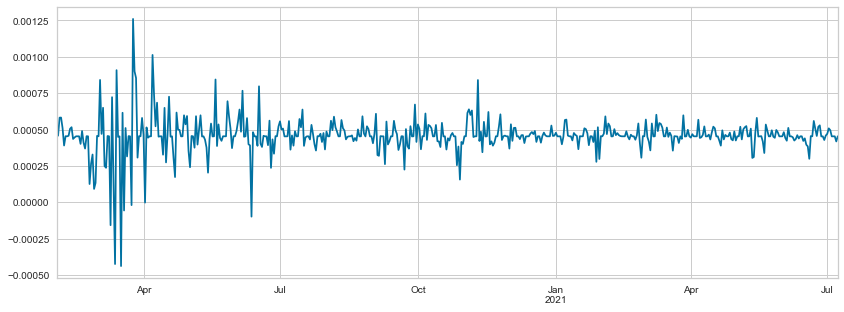

In [100]:
y_hat_ma1.plot()

<AxesSubplot:xlabel='Date'>

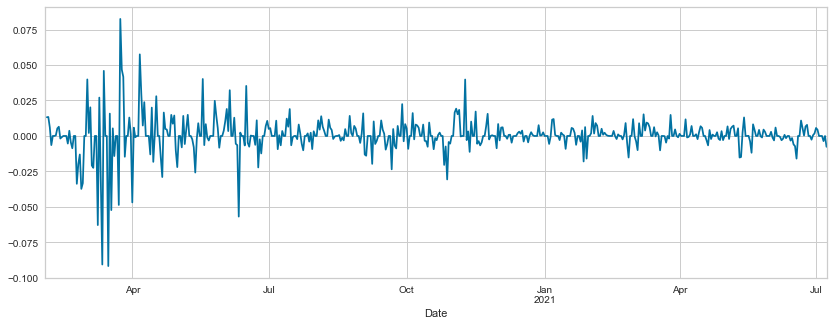

In [101]:
train_dowjones.plot()

The initial random walk model still provides a lower AIC score than either the autoregression or moving averages models. In order to determine what values to plug in the parameters, we will conduct the Auto-Arima grid search below.

### Checking Seasonality for Grid Search

In [102]:
end_dow = round(dowjones['daily_price'].shape[0] * .8)
train_dowjones = dowjones['daily_price'][:end_dow]

end_sp = round(sp500['daily_price'].shape[0] * .8)
train_sp500 = sp500['daily_price'][:end_sp]

end_nas = round(nasdaq['daily_price'].shape[0]* .8)
train_nasdaq = nasdaq['daily_price'][:end_nas]

end_bit = round(bitwise['daily_price'].shape[0]* .8)
train_bitwise = bitwise['daily_price'][:end_bit]

end_blok = round(blok['daily_price'].shape[0] * .8)
train_blok = blok['daily_price'][:end_blok]

In [103]:
test_dowjones = dowjones['daily_price'][end_dow:]
test_sp500 = sp500['daily_price'][end_sp:]
test_nasdaq = nasdaq['daily_price'][end_nas:]
test_bitwise = bitwise['daily_price'][end_bit:]
test_blok = blok['daily_price'][end_blok:]

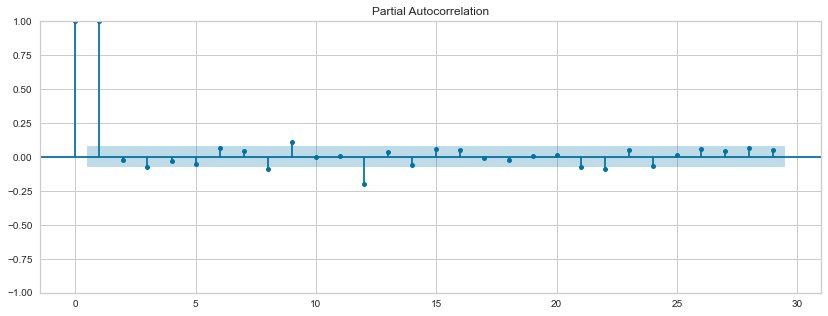

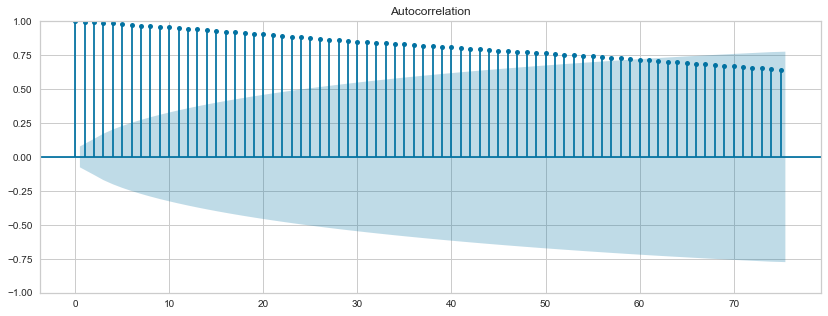

In [104]:
plot_pacf(dowjones['daily_price']);
plot_acf(dowjones['daily_price'], lags = 75);

In [105]:
def seasonal(df):
    """Takes a pandas DataFrame and plots the trend, seasonality, and residuals of time series
    
    Parameter:
    df: pandas DataFrame"""
    
    decomposition = seasonal_decompose(df['daily_price'][1:], period=5)
    seasonal = decomposition.seasonal
    
    
    plt.figure(figsize=(16,4))
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonality')
    plt.tight_layout();

    
    return None

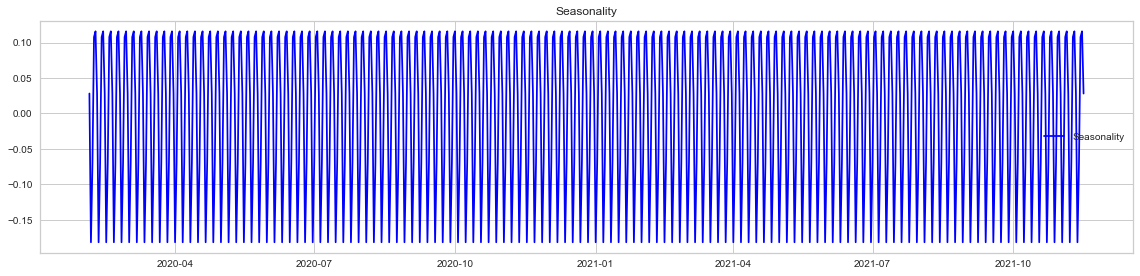

In [106]:
seasonal(dowjones[1:])

The trough of the data occurs roughly 18 times per 3 month cycle. This means that about every 3 and a half trading days, Dowjones ETF completes one cycle.

All five ETFs/Index Fund follow roughly the same seasonality. This happens to be every five days. Because the datasets do not inclue weekends, this seasonal period is a weekly one. In our grid search below, we will use this number as the base value for the seasonal parameter. 

### Auto-ARIMA

Auto-ARIMA grid searches the optimal values for the parameters p,d, and q instead of manually and visually observing the values through autocorrelation and partial autocorrelation graphs.

In [107]:
from pmdarima import auto_arima
auto_arima(train_dowjones[1:], start_p= 0, start_q= 0, max_p = 8, max_q = 3, seasonal = False, Trace = True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [108]:
y_hat_test1 = rw1.predict(start = test_dowjones.index[0], end = test_dowjones.index[-1], typ = 'levels')

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
import itertools
p = q = d =  range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 3) for x in list(itertools.product(p, d, q))]


In [111]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_dowjones[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:7392.087817787744
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:6692.663835286971
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:3304.287457022337
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:3294.7243337103273
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:3349.3287056182653
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:3339.7452151282105
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:3296.5013932766396
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:3295.93542378271
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:6680.203066196071
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:6059.234471073495
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:3082.7611407927243
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:3080.076274815258
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:3359.190435509867
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:3125.8523861668536
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:3080.9136533535034
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:3081.537479000963
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:2684.708569200628
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:2685.4835247802757
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:3005.0716649876695
ARIM

The values (1,1,1) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around 2684. We will be using these values for our final model for the Dow Jones Industrial Average exchange traded fund.

In [112]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_sp500[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:7592.419838293533
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:6892.96374714738
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:3391.0944625987836
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:3381.83275978935
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:3437.274457684539
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:3427.9977918499276
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:3383.8944558542016
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:3382.1979002081894
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:6880.285119371145
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:6250.897029403327
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:3171.9165956781862
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:3169.1896920793884
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:3453.4613020864103
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:3213.0596273180336
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:3170.106693011505
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:3170.723395620638
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:2786.5008422540204
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:2786.196023716557
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:3097.611431255278
ARIMA

The values (1,0,0) x (1,0,1,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -3133. We will be using these values for our final model for the Standard and Poor's 500 exchange traded fund.

In [113]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_nasdaq[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:4034.5713367017543
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:3613.556450083395
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:1349.2805518709588
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:1350.9092316113415
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:1389.3233633557068
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:1390.952466666814
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:1350.9695499599497
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:1352.4900691628259
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:3601.3923808044765
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:3215.6936082163365
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1184.5993003333765
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1167.939846895907
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1222.2520903517238
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1205.4798430688538
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1168.3318377951578
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1169.5797966191765
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:934.7399968460975
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:934.5432044063452
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1169.603116681081

The values (1,0,0) x (0,0,1,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -2174. We will be using these values for our final model for the Nasdaq exchange traded fund.

In [114]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_bitwise[1:],order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:3079.366274493512
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:2768.883282254456
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:2085.9034793147944
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:2072.987264531721
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:2118.414660220286
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:2106.806897170674
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:2073.1045065623684
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:2073.910460112273
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:2722.3875868392843
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:2485.1254074793874
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1891.9933983105223
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1855.0458594740746
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1920.9200143893008
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1886.4228141057908
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1857.4169084032828
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1856.9649625473585
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:1753.1876746400983
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:1753.4294296363928
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1943.0364534882085

The values (0,0,1) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -663. We will be using these values for our final model for the Bitwise exchange traded fund.

In [115]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(train_blok,order=param,seasonal_order=param_seasonal,enforce_stationarity=True,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            print('hello')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 3) - AIC:5184.428057060541
ARIMA(0, 0, 0)x(0, 0, 1, 3) - AIC:4501.548445444745
ARIMA(0, 0, 0)x(0, 1, 0, 3) - AIC:2051.0152322690283
ARIMA(0, 0, 0)x(0, 1, 1, 3) - AIC:2051.4559228714406
ARIMA(0, 0, 0)x(1, 0, 0, 3) - AIC:2082.618940767632
ARIMA(0, 0, 0)x(1, 0, 1, 3) - AIC:2083.0130125042215
ARIMA(0, 0, 0)x(1, 1, 0, 3) - AIC:2051.692926638016
ARIMA(0, 0, 0)x(1, 1, 1, 3) - AIC:2049.088925332302
ARIMA(0, 0, 1)x(0, 0, 0, 3) - AIC:4483.231013422341
ARIMA(0, 0, 1)x(0, 0, 1, 3) - AIC:3932.137651468938
ARIMA(0, 0, 1)x(0, 1, 0, 3) - AIC:1783.3848313804406
ARIMA(0, 0, 1)x(0, 1, 1, 3) - AIC:1770.8919633507107
ARIMA(0, 0, 1)x(1, 0, 0, 3) - AIC:1812.3865839431387
ARIMA(0, 0, 1)x(1, 0, 1, 3) - AIC:1799.9876415503977
ARIMA(0, 0, 1)x(1, 1, 0, 3) - AIC:1771.8454465001032
ARIMA(0, 0, 1)x(1, 1, 1, 3) - AIC:1772.8918832394008
ARIMA(0, 1, 0)x(0, 0, 0, 3) - AIC:1402.1848024474202
ARIMA(0, 1, 0)x(0, 0, 1, 3) - AIC:1404.0655961326438
ARIMA(0, 1, 0)x(0, 1, 0, 3) - AIC:1761.1715239793994


The values (1,0,0) x (0,0,0,3) for p,d,q,P,D,Q and seasonality produced the lowest akaike information criterion (AIC) score with a value of around -2483. We will be using these values for our final model for the Dow Jones Industrial Average exchange traded fund.

### Modeling and Forecasting

Below, is a SARIMA model of SPDR Dow Jones Industrial Average and subsequent forecasting. We will use the orders from the grid search to create a model. After the model has been fitted, we will then make a forecast three months past the last date in the data set. 

In [116]:
sari_mod1 =SARIMAX(train_dowjones,order=(1,0,0),
                  seasonal_order=(0,0,0,3),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

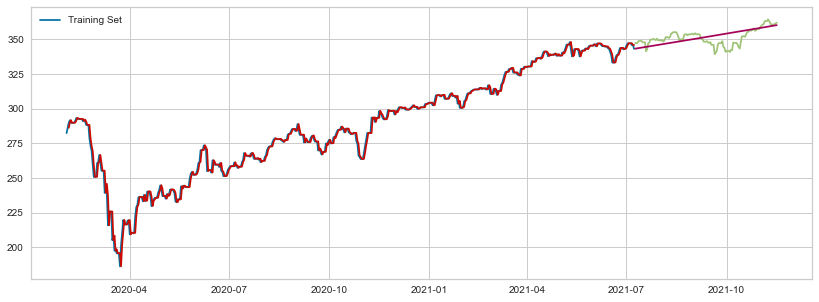

In [117]:
y_hat_train1 = sari_mod1.predict(typ='levels')
y_hat_test_sar1 = sari_mod1.predict(start=test_dowjones.index[0], end=test_dowjones.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(train_dowjones)
ax.legend(['Training Set'])
ax.plot(test_dowjones)
ax.plot(y_hat_train1[2:])
ax.plot(y_hat_test_sar1)

The model with the lowest AIC score is a model that overfits the training data, while the predicted values for the test set is a straight line with an upward slope. SARIMA may be struggling to make sense of daily data. Historically, the stock market has cycles and seasons that may not necessarily fit within the time span of one year, and thus the SARIMA model may lack the necessary amount of data to make more dynamic predictions. 

In [118]:
sari_mod =SARIMAX(dowjones['daily_price'],order=(1,0,1),seasonal_order=(0,0,0,3), enforce_stationarity=
                  False ,enforce_invertibility=False).fit()

In [119]:
forecast1 = sari_mod.forecast(steps = 100)

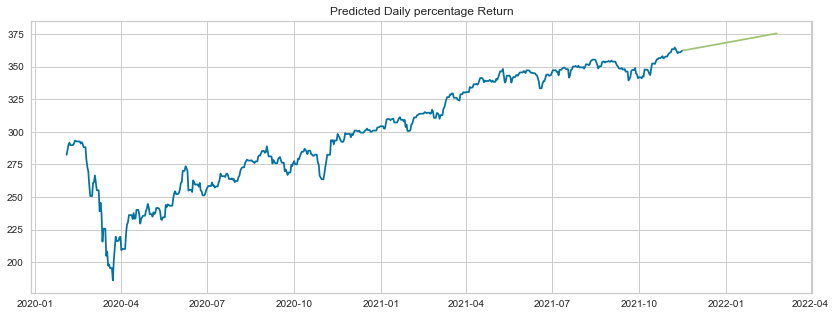

In [120]:
fig, ax = plt.subplots()

ax.plot(dowjones['daily_price'])
ax.plot(forecast1)
ax.set_title('Predicted Daily percentage Return');

In [121]:
forecast1

2021-11-17    362.324816
2021-11-18    362.454675
2021-11-19    362.584581
2021-11-20    362.714534
2021-11-21    362.844533
                 ...    
2022-02-20    374.871617
2022-02-21    375.005973
2022-02-22    375.140378
2022-02-23    375.274831
2022-02-24    375.409332
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [122]:
forecast1df = pd.DataFrame(forecast1)

In [123]:
forecast1df.head()

predicted_mean
2021-11-17      362.324816
2021-11-18      362.454675
2021-11-19      362.584581
2021-11-20      362.714534
2021-11-21      362.844533

In [124]:
np.sqrt(mean_squared_error(test_dowjones, y_hat_test_sar1))

5.600557116935882

Unsurprisngly, the forecast three months past the last time-stamped datapoint is a continuation of the upward linear slope we observed in the model's prediction of the test set. The root mean square error of ~5.60 is quite good, but as mentioned above, the model lacks dynamic predictive and forecasting abilities. 

### Facebook Prophet & Subsequent Results

Facebook Prophet is a forecasting model developed by the Meta technology company.  It is based on a decomposable additive model where non-linear trends are fit with seasonality. It possesses daily, weekly, and yearly seasonal components, as well as holidays which can be customized to emphasize the importance of any event during the year. This model should prove to provide a more robust model in forecasting. 

#### SPDR Dow Jones Industrial Average ETF Trust (DIA)

In [125]:
end_dow = round(dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'].shape[0] * .8)
train_dowjones = dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'][:end_dow]
test_dowjones = dowjones.loc[dowjones.index >= '2020-04-01']['daily_price'][end_dow:]
train_dow_prophet = train_dowjones.reset_index()
test_dow_prophet = test_dowjones.reset_index()
train_dow_prophet.columns = ['ds', 'y']
test_dow_prophet.columns = ['ds', 'y']

In [126]:
prophet = Prophet(weekly_seasonality= True, yearly_seasonality= True, daily_seasonality= True)
prophet.add_country_holidays(country_name= 'US')
prophet.fit(train_dow_prophet)

In [127]:
future= prophet.make_future_dataframe(periods=119)

In [128]:
forecast=prophet.predict(future)

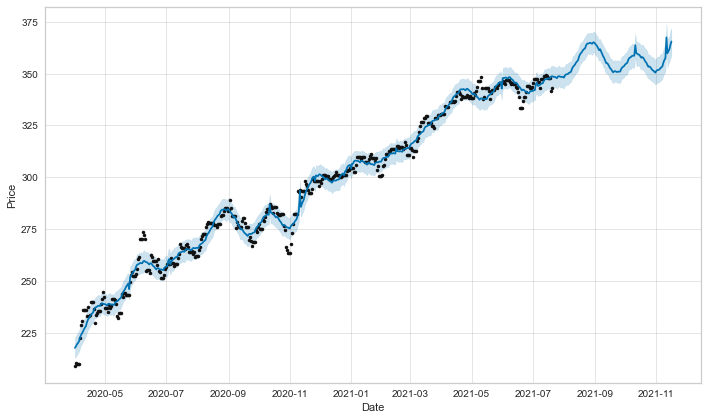

In [129]:
fig1 =prophet.plot(forecast, xlabel= 'Date', ylabel= 'Price')

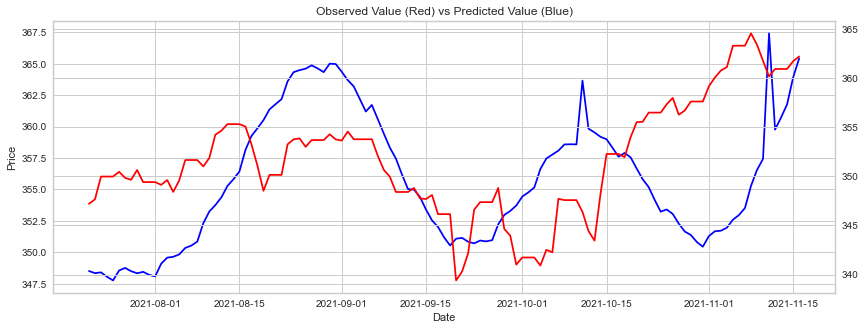

In [130]:
fig, ax = plt.subplots()
ax.plot(forecast['ds'][end_dow:], forecast['yhat'][end_dow:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_dow_prophet['ds'], test_dow_prophet['y'], color='red')
ax.set_title('Observed Value (Red) vs Predicted Value (Blue)')
ax.set_xlabel('Date')
ax.set_ylabel('Price');

In [131]:
mae = mean_absolute_error(forecast['yhat'][end_dow:], test_dow_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 6.498


In [132]:
rmse = mean_squared_error(forecast['yhat'][end_dow:], test_dow_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 7.898


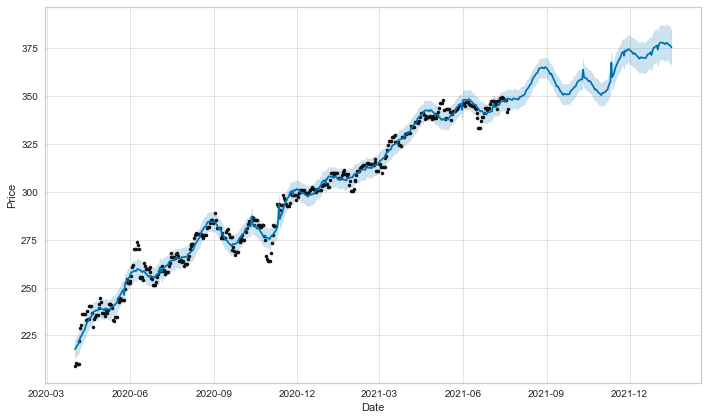

In [133]:
future= prophet.make_future_dataframe(periods=180)
forecast=prophet.predict(future)
fig1 =prophet.plot(forecast, xlabel= 'Date', ylabel= 'Price')

The RMSE of the model is higher than the one we saw with the SARIMA model. However, Prophet is able to make a more dynamic forecast than SARIMA. The upward trend we see above reflects more of the seasonality observed in prior data points. The light blue highlight surrounding the forecast (darker blue) shows information about the range of possible values at that time step.

#### SPDR Standard & Poor's 500 ETF Trust (SPY)

In [134]:
end_sp = round(sp500.loc[sp500.index >= '2020-04-01']['daily_price'].shape[0] * .8)
train_sp500 = sp500.loc[sp500.index >= '2020-04-01']['daily_price'][:end_sp]
test_sp500 = sp500.loc[sp500.index >= '2020-04-01']['daily_price'][end_sp:]
train_sp_prophet = train_sp500.reset_index()
test_sp_prophet = test_sp500.reset_index()
train_sp_prophet.columns = ['ds', 'y']
test_sp_prophet.columns = ['ds', 'y']

In [135]:
prophet2 = Prophet(weekly_seasonality= True, yearly_seasonality= True, daily_seasonality= True)
prophet2.add_country_holidays(country_name= 'US')
prophet2.fit(train_sp_prophet)
future2= prophet2.make_future_dataframe(periods=119)
forecast2=prophet2.predict(future2)

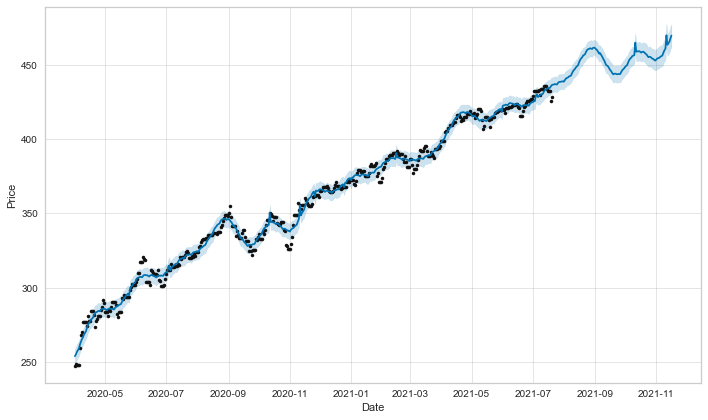

In [136]:
fig1 =prophet2.plot(forecast2, xlabel= 'Date', ylabel= 'Price')

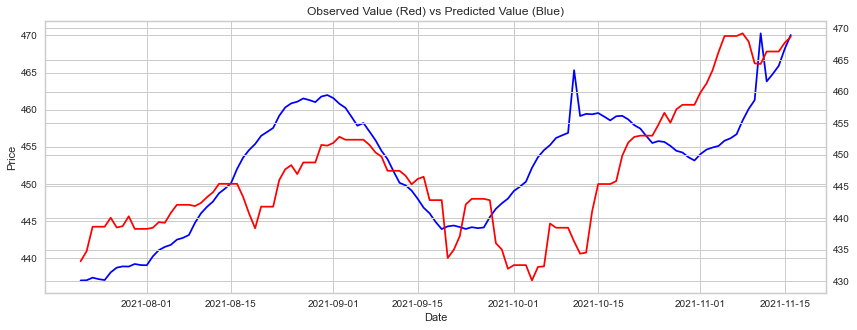

In [137]:
fig, ax = plt.subplots()
ax.plot(forecast2['ds'][end_sp:], forecast2['yhat'][end_sp:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_sp_prophet['ds'], test_sp_prophet['y'], color='red')
ax.set_title('Observed Value (Red) vs Predicted Value (Blue)')
ax.set_xlabel('Date')
ax.set_ylabel('Price');

In [138]:
mae = mean_absolute_error(forecast2['yhat'][end_sp:], test_sp_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 7.621


In [139]:
rmse = mean_squared_error(forecast2['yhat'][end_sp:], test_sp_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 10.073


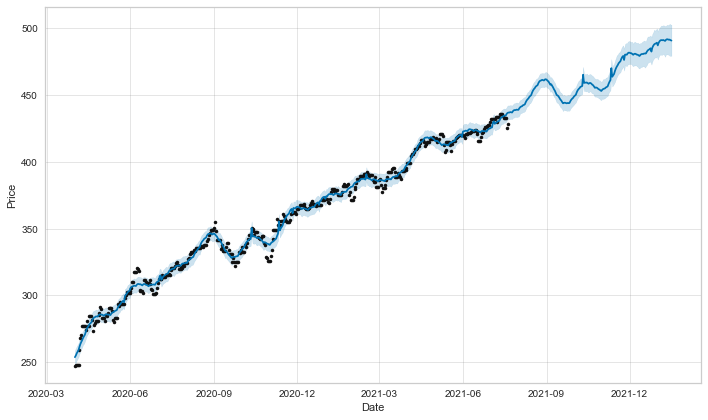

In [140]:
future2= prophet2.make_future_dataframe(periods=180)
forecast2=prophet2.predict(future2)
fig1 =prophet2.plot(forecast2, xlabel= 'Date', ylabel= 'Price')

In [141]:
forecast2.tail(5)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
651 2022-01-12  484.111770  480.469876  502.578565   474.141481   493.981606   
652 2022-01-13  484.428598  480.221682  502.667054   474.392339   494.407644   
653 2022-01-14  484.745427  479.484411  503.472801   474.606293   494.816058   
654 2022-01-15  485.062256  479.483055  502.947266   474.832630   495.215678   
655 2022-01-16  485.379085  479.537793  502.781346   475.102459   495.619288   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  \
651            0.0                  0.0                  0.0   
652            0.0                  0.0                  0.0   
653            0.0                  0.0                  0.0   
654            0.0                  0.0                  0.0   
655            0.0                  0.0                  0.0   

     Christmas Day (Observed)  ...    weekly  weekly_lower  weekly_upper  \
651                       0.0  ...  0.364844      0.364844      0.364844   
652                       0.0  ...  0.070700      0.070700      0.070700   
653                       0.0  ...  0.125033      0.125033      0.125033   
654                       0.0  ... -0.341666     -0.341666     -0.341666   
655                       0.0  ... -0.728653     -0.728653     -0.728653   

       yearly  yearly_lower  yearly_upper  multiplicative_terms  \
651  0.973447      0.973447      0.973447                   0.0   
652  0.676061      0.676061      0.676061                   0.0   
653  0.389586      0.389586      0.389586                   0.0   
654  0.122405      0.122405      0.122405                   0.0   
655 -0.117734     -0.117734     -0.117734                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
651                         0.0                         0.0  491.829171  
652                         0.0                         0.0  491.554469  
653                         0.0                         0.0  491.639156  
654                         0.0                         0.0  491.222105  
655                         0.0                         0.0  490.911807  

[5 rows x 64 columns]

SPDR SP500 ETF performs similarly as the Dow Jones ETF according to our model. The rate at which the ETF grows over the same period of time appears to be almost identical, albeit the valuation of the Dow Jones is priced a little higher than that of SP500's. Barring an unforeseen bearish catalyst, SP500 ETF should perform similarly well as Dow Jones.

#### Invesco NASDAQ 100 ETF (QQQM)

In [142]:
end_nas = round(nasdaq['daily_price'].shape[0] * .8)
train_nasdaq = nasdaq['daily_price'][:end_nas]
test_nasdaq = nasdaq['daily_price'][end_nas:]
train_nas_prophet = train_nasdaq.reset_index()
test_nas_prophet = test_nasdaq.reset_index()
train_nas_prophet.columns = ['ds', 'y']
test_nas_prophet.columns = ['ds', 'y']

In [143]:
prophet3 = Prophet(weekly_seasonality= True, daily_seasonality= True)
prophet3.add_country_holidays(country_name= 'US')
prophet3.fit(train_nas_prophet)
future3= prophet3.make_future_dataframe(periods=80)
forecast3=prophet3.predict(future3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


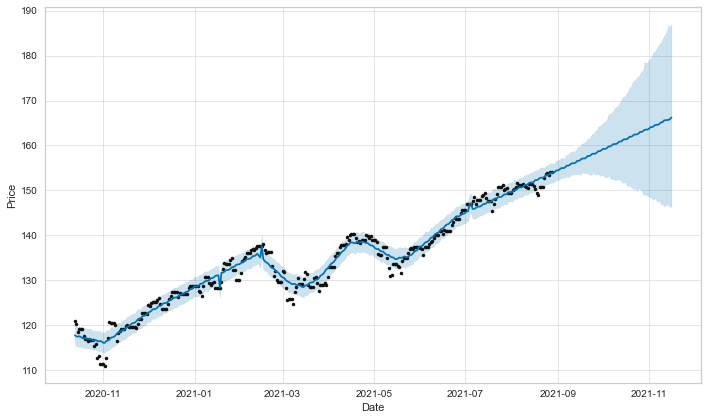

In [144]:
fig1 =prophet3.plot(forecast3, xlabel= 'Date', ylabel= 'Price')

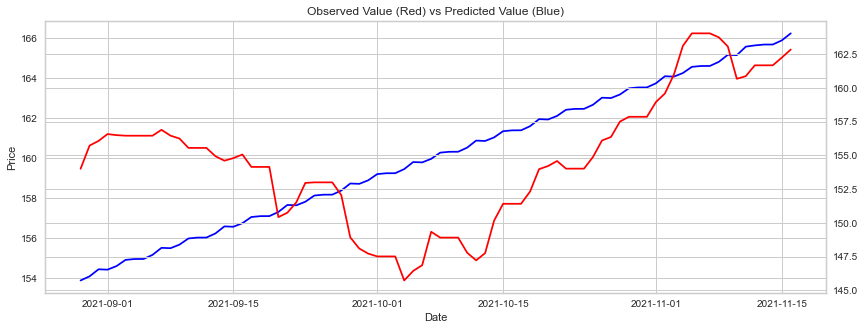

In [145]:
fig, ax = plt.subplots()
ax.plot(forecast3['ds'][end_nas:], forecast3['yhat'][end_nas:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_nas_prophet['ds'], test_nas_prophet['y'], color='red')
ax.set_title('Observed Value (Red) vs Predicted Value (Blue)')
ax.set_xlabel('Date')
ax.set_ylabel('Price');

In [146]:
mae = mean_absolute_error(forecast3['yhat'][end_nas:], test_nas_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 5.746


In [147]:
rmse = mean_squared_error(forecast3['yhat'][end_nas:], test_nas_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 7.062


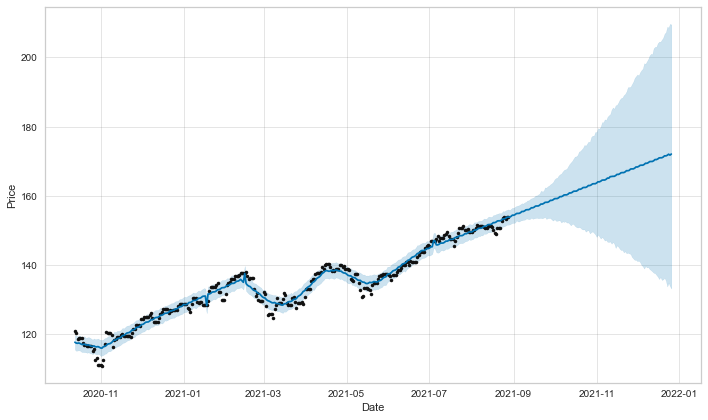

In [148]:
future3= prophet3.make_future_dataframe(periods=120)
forecast3=prophet3.predict(future3)
fig1 =prophet3.plot(forecast3, xlabel= 'Date', ylabel= 'Price')

Because the dataset for the NASDAQ ETF encompasses a little less than a year, the yearly_seasonality component of the model has been turned off. As such, the forecast the model gives is more linear in comparison to those of Dow Jones or SP500. Additionally, the range of valuations increases as we try to forecast further into the future. The lower range of the forecast peaks around a month after the training set data. The mean of the forecast remains to have an upward linear trend however. 

#### Bitwise (BITW)

In [149]:
end_bit = round(bitwise['daily_price'].shape[0] * .8)
train_bitwise = bitwise['daily_price'][:end_bit]
test_bitwise = bitwise['daily_price'][end_bit:]
train_bit_prophet = train_bitwise.reset_index()
test_bit_prophet = test_bitwise.reset_index()
train_bit_prophet.columns = ['ds', 'y']
test_bit_prophet.columns = ['ds', 'y']

In [150]:
prophet4 = Prophet(weekly_seasonality= True, daily_seasonality= True)
prophet4.add_country_holidays(country_name= 'US')
prophet4.fit(train_bit_prophet)
future4= prophet4.make_future_dataframe(periods=68)
forecast4=prophet4.predict(future4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


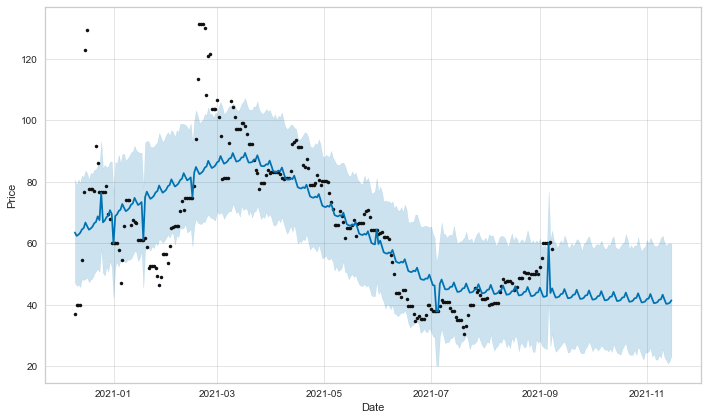

In [151]:
fig1 =prophet4.plot(forecast4, xlabel= 'Date', ylabel= 'Price')

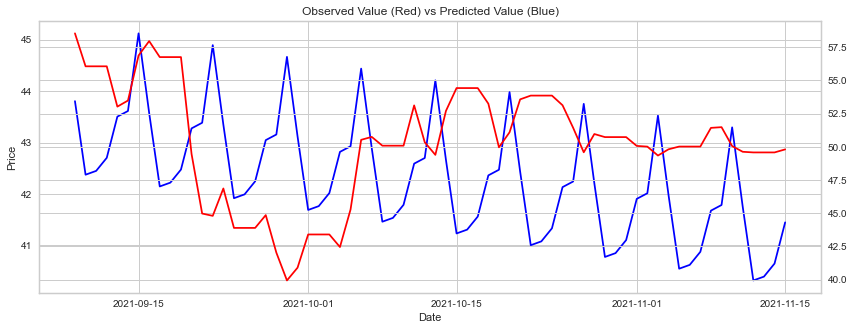

In [152]:
fig, ax = plt.subplots()
ax.plot(forecast4['ds'][end_bit:], forecast4['yhat'][end_bit:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_bit_prophet['ds'], test_bit_prophet['y'], color='red')
ax.set_title('Observed Value (Red) vs Predicted Value (Blue)')
ax.set_xlabel('Date')
ax.set_ylabel('Price');

In [153]:
mae = mean_absolute_error(forecast4['yhat'][end_bit:], test_bit_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 8.192


In [154]:
rmse = mean_squared_error(forecast4['yhat'][end_bit:], test_bit_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 9.158


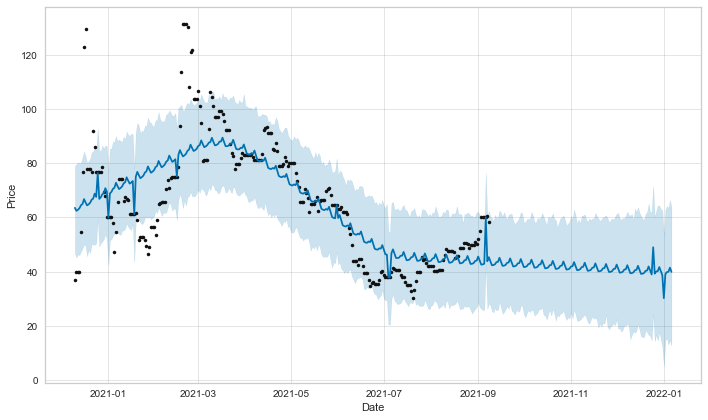

In [155]:
future4= prophet4.make_future_dataframe(periods=120)
forecast4=prophet4.predict(future4)
fig1 =prophet4.plot(forecast4, xlabel= 'Date', ylabel= 'Price')

The root mean squared error of the Bitwise model is noticeably higher than those of the traditional market ETFs. Furthermore, the model appears to forecasts a slight downword trajectory of the ETF's valuation. This ETF is performing worse in terms of predictability and forecasted price action in the months following the observed dataset. 

#### Amplify Transformational Data Sharing Index Fund (BLOK)

In [156]:
end_blo = round(blok['daily_price'].shape[0] * .8)
train_blok = blok['daily_price'][:end_blo]
test_blok = blok['daily_price'][end_blo:]
train_blo_prophet = train_blok.reset_index()
test_blo_prophet = test_blok.reset_index()
train_blo_prophet.columns = ['ds', 'y']
test_blo_prophet.columns = ['ds', 'y']

In [157]:
prophet5 = Prophet(weekly_seasonality= True, yearly_seasonality = True, daily_seasonality= True)
prophet5.add_country_holidays(country_name= 'US')
prophet5.fit(train_blo_prophet)
future5= prophet5.make_future_dataframe(periods=130)
forecast5=prophet5.predict(future5)

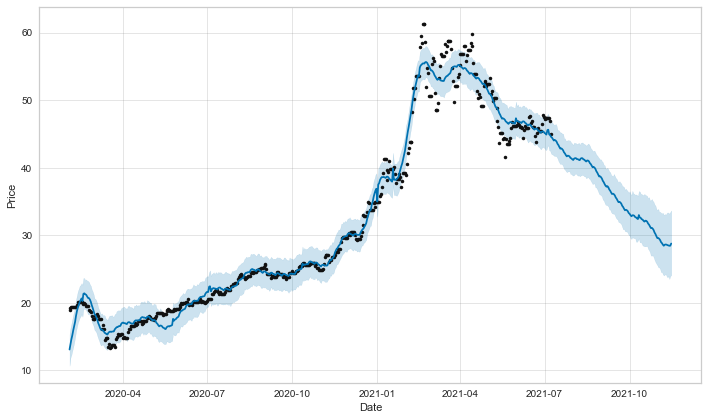

In [158]:
fig1 =prophet5.plot(forecast5, xlabel= 'Date', ylabel= 'Price')

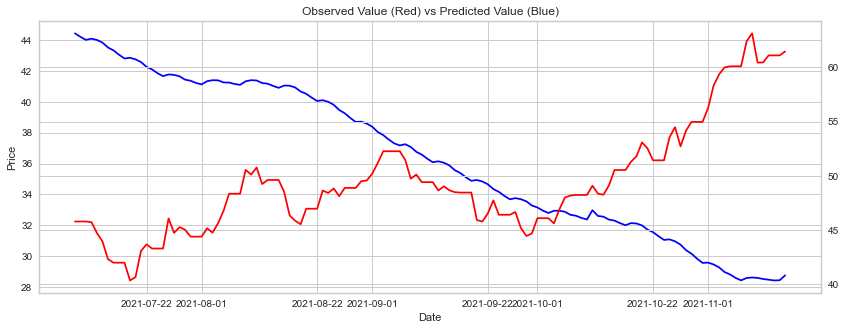

In [159]:
fig, ax = plt.subplots()
ax.plot(forecast5['ds'][end_blo:], forecast5['yhat'][end_blo:], color='blue')

# Specify that we will be using a twin x axis
ax2 = ax.twinx()

ax2.plot(test_blo_prophet['ds'], test_blo_prophet['y'], color='red')
ax.set_title('Observed Value (Red) vs Predicted Value (Blue)')
ax.set_xlabel('Date')
ax.set_ylabel('Price');

In [160]:
mae = mean_absolute_error(forecast5['yhat'][end_blo:], test_blo_prophet['y'])
print('MAE: %.3f' % mae)

MAE: 13.130


In [161]:
rmse = mean_squared_error(forecast5['yhat'][end_blo:], test_blo_prophet['y'], squared = False)
print('RMSE: %.3f' % rmse)

RMSE: 15.935


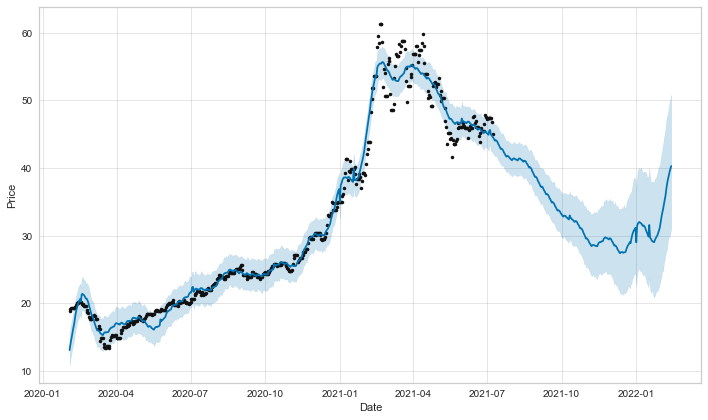

In [162]:
future5= prophet5.make_future_dataframe(periods=220)
forecast5=prophet5.predict(future5)
fig1 =prophet5.plot(forecast5, xlabel= 'Date', ylabel= 'Price');

Out of all five datasets, the Blok model performs the worst by measure of both accuracy and price action. The forecasted valuation of the Index Fund continues to decline after the local maxima seen shortly before end of the training set. The range of the price action is relatively smaller than that of Bitwise's however, showing that Prophet is more confident in Blok's forecasted valuation compared to Bitwise. 

### Analysis

Prediction of the price action of individual stocks, index funds, exchange traded funds and other financial assets is seldom accurate. Historically, properly functioning economies produce healthy stock market growths with returns on investments fluctuation around a small positive trend. This is were the axiom "time in the stock market not timing the market" is predicated on. The graph shows this paradigm.

###### <center>Typical Cycle for Stocks</center>

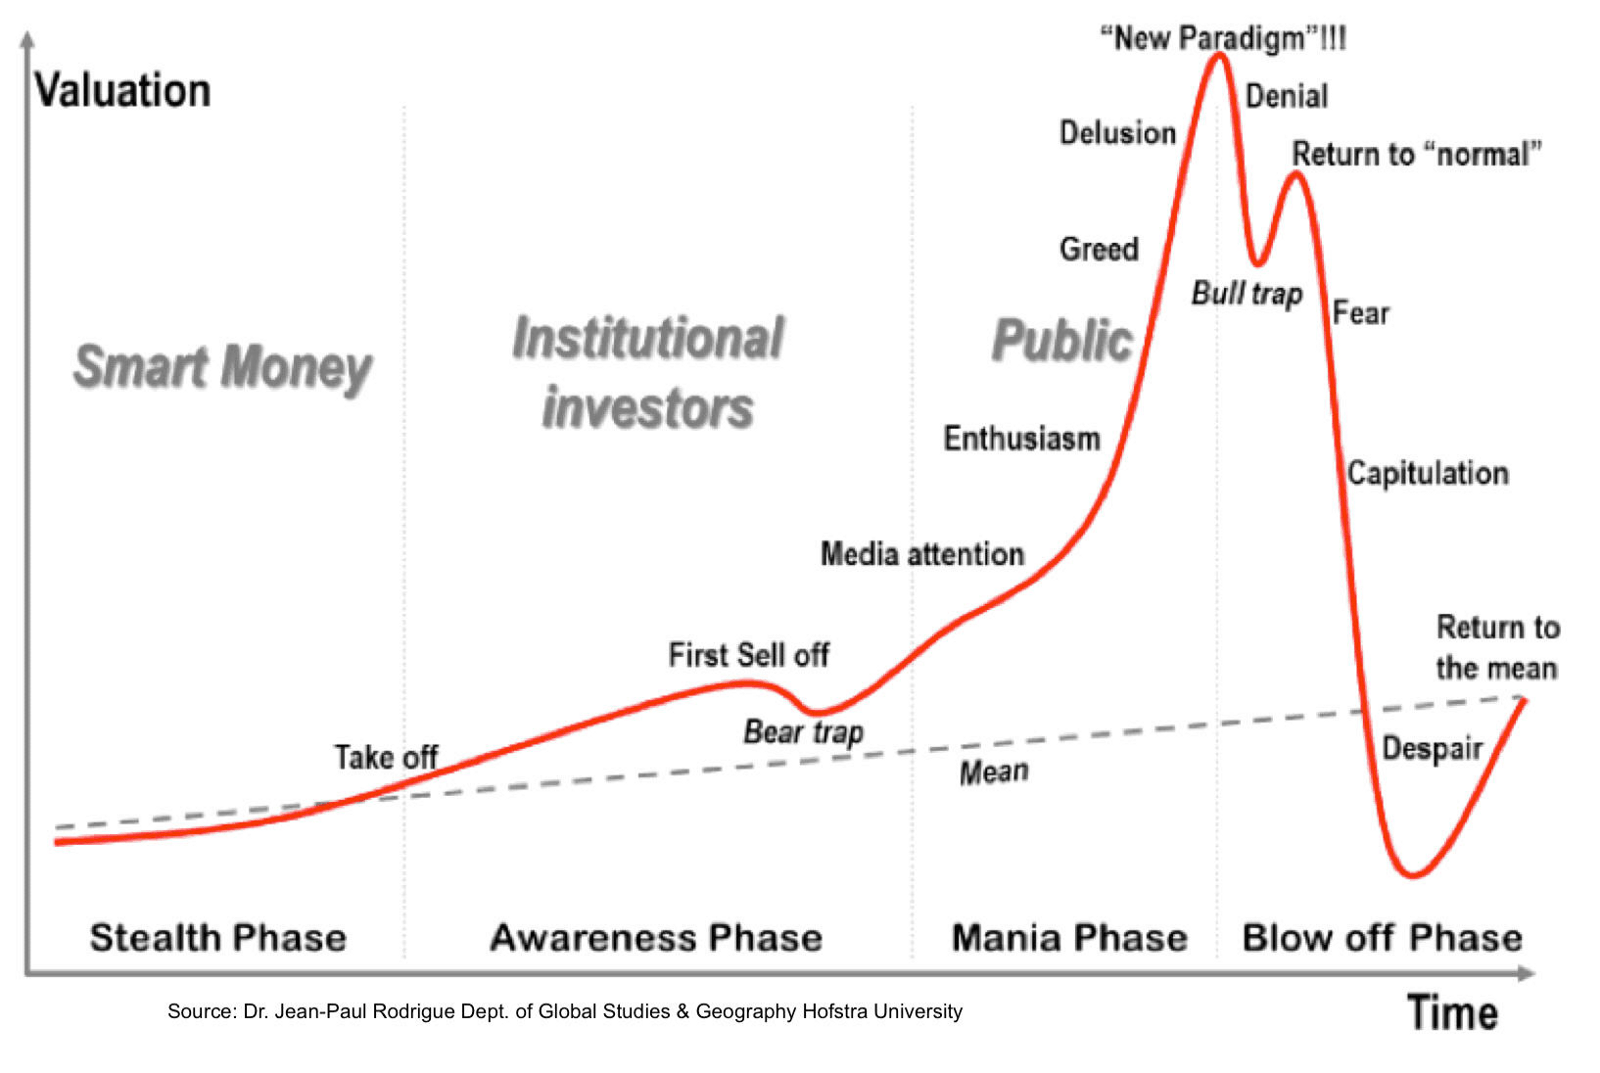

The dashed line shows an upward linear trend. This line should continue in its path in a well establish economy. The plot indicated in red shows one season or cycle of a stock. It is nigh impossible to determine which phase on the red plot a stock or asset is in. Due to this random nature, the forecasted price for the traditional market ETFs (DIA, SPY, QQQM) should be read as: "Barring unforeseen circumstances, and should the asset continue moving within its current cycle, the valuation of {DIA, SPY, QQQQM} will move in this manner for the next 3 months." 

As expected, the valuation of the traditional stockmarket assets were easier to predict both in terms of precission and confidence. The lower root mean squared error seen with SPDR Dow Jones Industrial Average ETF, SPDR S&P 500 ETF Trust, and Invesco NASDAQ 100 ETF are markedly lower than those of Bitwise and Blok. 

###### <center>5-Year Price Chart of Bitcoin</center>

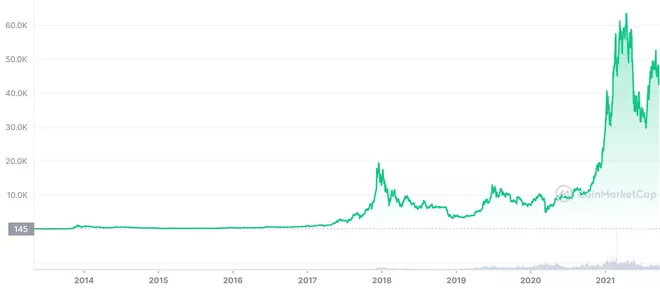

As for Crypt, Bitwise and Blok assets both show immaturity in predictability and volatility. Bitwise ETF and Blok Index Fund has a short history. Both were started within the past two years as opposed to decades of history behind DIA, SPY, and QQQM. Models suffered from insufficient data surrounding Bitwise and Blok. 

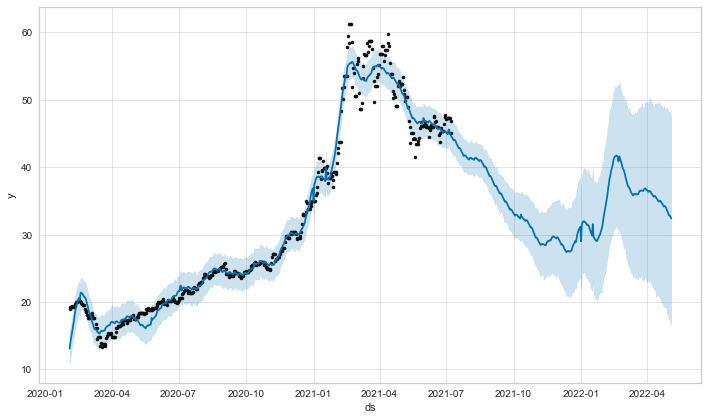

In [163]:
future5= prophet5.make_future_dataframe(periods=300)
forecast5=prophet5.predict(future5)
fig1 =prophet5.plot(forecast5)

The research chose to forecast less volatile representatives of the crypto industry as opposed to better known coins like Bitcoin and Ethereum. However, coins like Bitcoin and Ethereum have data spanning years while Bitwise and Blok have less data. The forecasting model for Bitwise and Blok may have suffered due to this. Above, we can see that the valuation of Bitcoin has a seasonal period between 3 and 4 years. Additionally, there exists time-dependent variance occuring within the same time span. As we can see above, Prophet's forecast of Blok began to resemble this seasonality around 250 time-steps into the future.

## Regression

In order to determine, what factors contribute to the fluctuations in valuation of assets, this research will conduct multiple regression on the dataset. We will introduce new columns such as unemployment and inflation to the dataset. Additionally, we will make sure the series start and end on the same date. Regression has five key assumptions:

- Linear relationship.
- Multivariate normality.
- No or little multicollinearity.
- No auto-correlation.
- Homoscedasticity.


### Creating Dataset for Regression

The data for United States unemployment rate is taken from https://data.oecd.org/unemp/unemployment-rate.htm, while the information regarding the monthly U.S. inflation rate is taken from Statista Research Department - November 15, 2021. Columns 'daily_price', 'return_daily_perc', and 'Volume' from dowjones, sp500, nasdaq, bitwise, and blok datasets are added to the new dataset. The date range of the new resulting dataset will be from December 10, 2020 to October 1, 2021

In [164]:
def same_start_end(df):
    """Takes a pandas DataFrame and returns a dataframe with the desired start and end date.
    Parameter:
    df: Pandas DataFrame"""
    
    df1 = df.loc[df.index >= '2020-12-10']
    df2 = df1.loc[df1.index <= '2021-10-01']
    
    return df2

In [165]:
dowjones = same_start_end(dowjones)
sp500 = same_start_end(sp500)
nasdaq = same_start_end(nasdaq)
bitwise = same_start_end(bitwise)
blok = same_start_end(blok)

In [166]:
# Inflation rate is in percentages. Information is taken from Statista Research Department - November 15, 2021
inflation_dict = {'Date': ['2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01','2021-05-01',
                '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01' ], 
        'Inflation_rate': [1.4, 1.4, 1.7, 2.6, 4.2, 5,5.4,5.4,5.3,5.4, 6.2]}
inflation = pd.DataFrame.from_dict(inflation_dict)
inflation.Date = pd.to_datetime(inflation.Date)

In [167]:
inflation = weekends(inflation)
inflation.set_index('Date', inplace= True)

In [168]:
unemployment = pd.read_csv('Unemployment.csv')
unemployment = unemployment.loc[unemployment['LOCATION'] == 'USA']
unemployment.TIME = pd.to_datetime(unemployment.TIME)
unemployment = unemployment.loc[unemployment.TIME >= '2020-12-01']
unemployment = unemployment.loc[unemployment.TIME <= '2021-10-01']
unemployment['Date'] = unemployment['TIME']
unemployment.drop(['INDICATOR', 'SUBJECT', 'FREQUENCY', 'Flag Codes', 'TIME'], axis= 1, inplace= True)
unemployment = weekends(unemployment)

In [169]:
inflation.fillna(method='ffill', inplace = True)
unemployment.fillna(method='ffill', inplace= True)

In [170]:
unemployment = unemployment.loc[unemployment.Date >= '2020-12-10']
inflation = inflation.loc[inflation.index >= '2020-12-10']

In [171]:
data = pd.DataFrame()
data[['Bitwise_Daily_Return', 'Bitwise_Volume', 'Bitwise_Daily_Price']]= bitwise[
    ['return_daily_perc', 'Volume', 'daily_price']]

In [172]:
data['Inflation'] = inflation['Inflation_rate']

In [173]:
unemployment.set_index('Date', inplace= True)
data['Unemployment'] = unemployment.Value

In [174]:
data[['Dow_Daily_Return', 'Dow_Daily_Price', 'Dow_Volume']] = dowjones[
    ['return_daily_perc', 'daily_price', 'Volume']]
data[['SP_Daily_Return', 'SP_Daily_Price', 'SP_Volume']] = sp500[
    ['return_daily_perc', 'daily_price', 'Volume']]
data[['Nas_Daily_Return', 'Nas_Daily_Price', 'Nas_Volume']] = nasdaq[
    ['return_daily_perc', 'daily_price', 'Volume']]
data[['Blok_Daily_Return', 'Blok_Daily_Price', 'Blok_Volume']] = blok[
    ['return_daily_perc', 'daily_price', 'Volume']]
data = data.loc[data.index >= '2020-12-11']

In [175]:
data.head()

Bitwise_Daily_Return  Bitwise_Volume  Bitwise_Daily_Price  \
Date                                                                    
2020-12-11              0.081796        537000.0               39.994   
2020-12-12              0.000000        537000.0               39.994   
2020-12-13              0.000000        537000.0               39.994   
2020-12-14              0.363054        703700.0               54.514   
2020-12-15              0.406611        770300.0               76.680   

            Inflation  Unemployment  Dow_Daily_Return  Dow_Daily_Price  \
Date                                                                     
2020-12-11        1.4           6.7         -0.000184       299.337659   
2020-12-12        1.4           6.7          0.000000       299.337659   
2020-12-13        1.4           6.7          0.000000       299.337659   
2020-12-14        1.4           6.7          0.001936       299.917090   
2020-12-15        1.4           6.7          0.003026       300.824658   

            Dow_Volume  SP_Daily_Return  SP_Daily_Price   SP_Volume  \
Date                                                                  
2020-12-11   2454300.0        -0.001979      364.482343  57698600.0   
2020-12-12   2454300.0         0.000000      364.482343  57698600.0   
2020-12-13   2454300.0         0.000000      364.482343  57698600.0   
2020-12-14   3646100.0         0.002608      365.432910  69216200.0   
2020-12-15   4211500.0         0.005359      367.391211  63865300.0   

            Nas_Daily_Return  Nas_Daily_Price  Nas_Volume  Blok_Daily_Return  \
Date                                                                           
2020-12-11         -0.000744       123.495107     54200.0           0.005002   
2020-12-12          0.000000       123.495107     54200.0           0.000000   
2020-12-13          0.000000       123.495107     54200.0           0.000000   
2020-12-14          0.010422       124.782149    184100.0           0.011859   
2020-12-15          0.008035       125.784759     64300.0           0.019074   

            Blok_Daily_Price  Blok_Volume  
Date                                       
2020-12-11         29.499656     315200.0  
2020-12-12         29.499656     315200.0  
2020-12-13         29.499656     315200.0  
2020-12-14         29.849478     197900.0  
2020-12-15         30.418833     169200.0

### Visualizations of Data for Regression

The visualiations below will aid in determining transformations to be made on the dataset, as well as which assumptions of regression will need to addressed. 

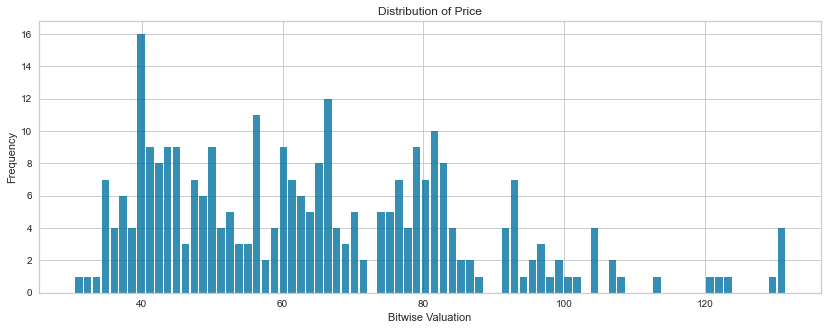

In [176]:
plt.hist(x = data.Bitwise_Daily_Price, bins = 80, alpha = 0.80, rwidth= .85)
plt.xlabel('Bitwise Valuation')
plt.ylabel('Frequency')
plt.title('Distribution of Price');

The histogram of price for Bitwise has a right-skewed distribution. This positive skew shows that the median of the of the dataset is less than mean. The distribution makes sense, for the price of Bitwise saw its peaks early in 2021, ultimately losing valuation and plateauing. 

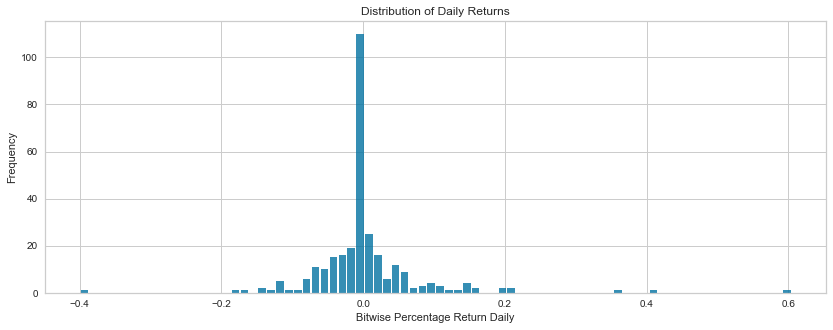

In [177]:
plt.hist(x = data.Bitwise_Daily_Return, bins = 80, alpha = 0.80, rwidth= .85)
plt.xlabel('Bitwise Percentage Return Daily')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns');

The distribution of daily returns is narrow. The percentage of returns fluctuate about the center (0.0), so the distrubution is unsurprsingly tall in the middle. 

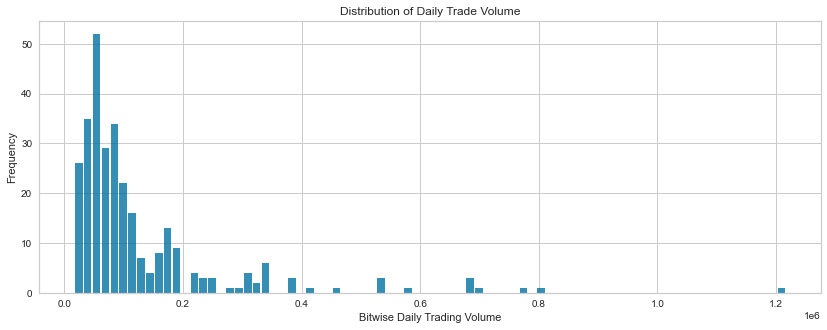

In [178]:
plt.hist(x = data.Bitwise_Volume, bins = 80, alpha = 0.80, rwidth= .85)
plt.xlabel('Bitwise Daily Trading Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Trade Volume');

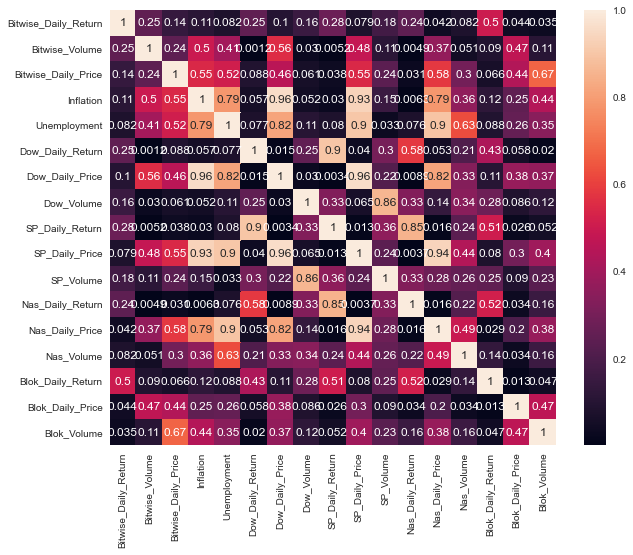

In [179]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr().abs(), annot=True)
plt.show();

There appears to be many instances of multicollinearity between the daily price, and returns amongst the ETFs and index fund. Additionally, unemployment appears to be collinear with 'Dow_Daily_Price', 'SP_Daily_Price', and 'Nas_Daily_Price'. 

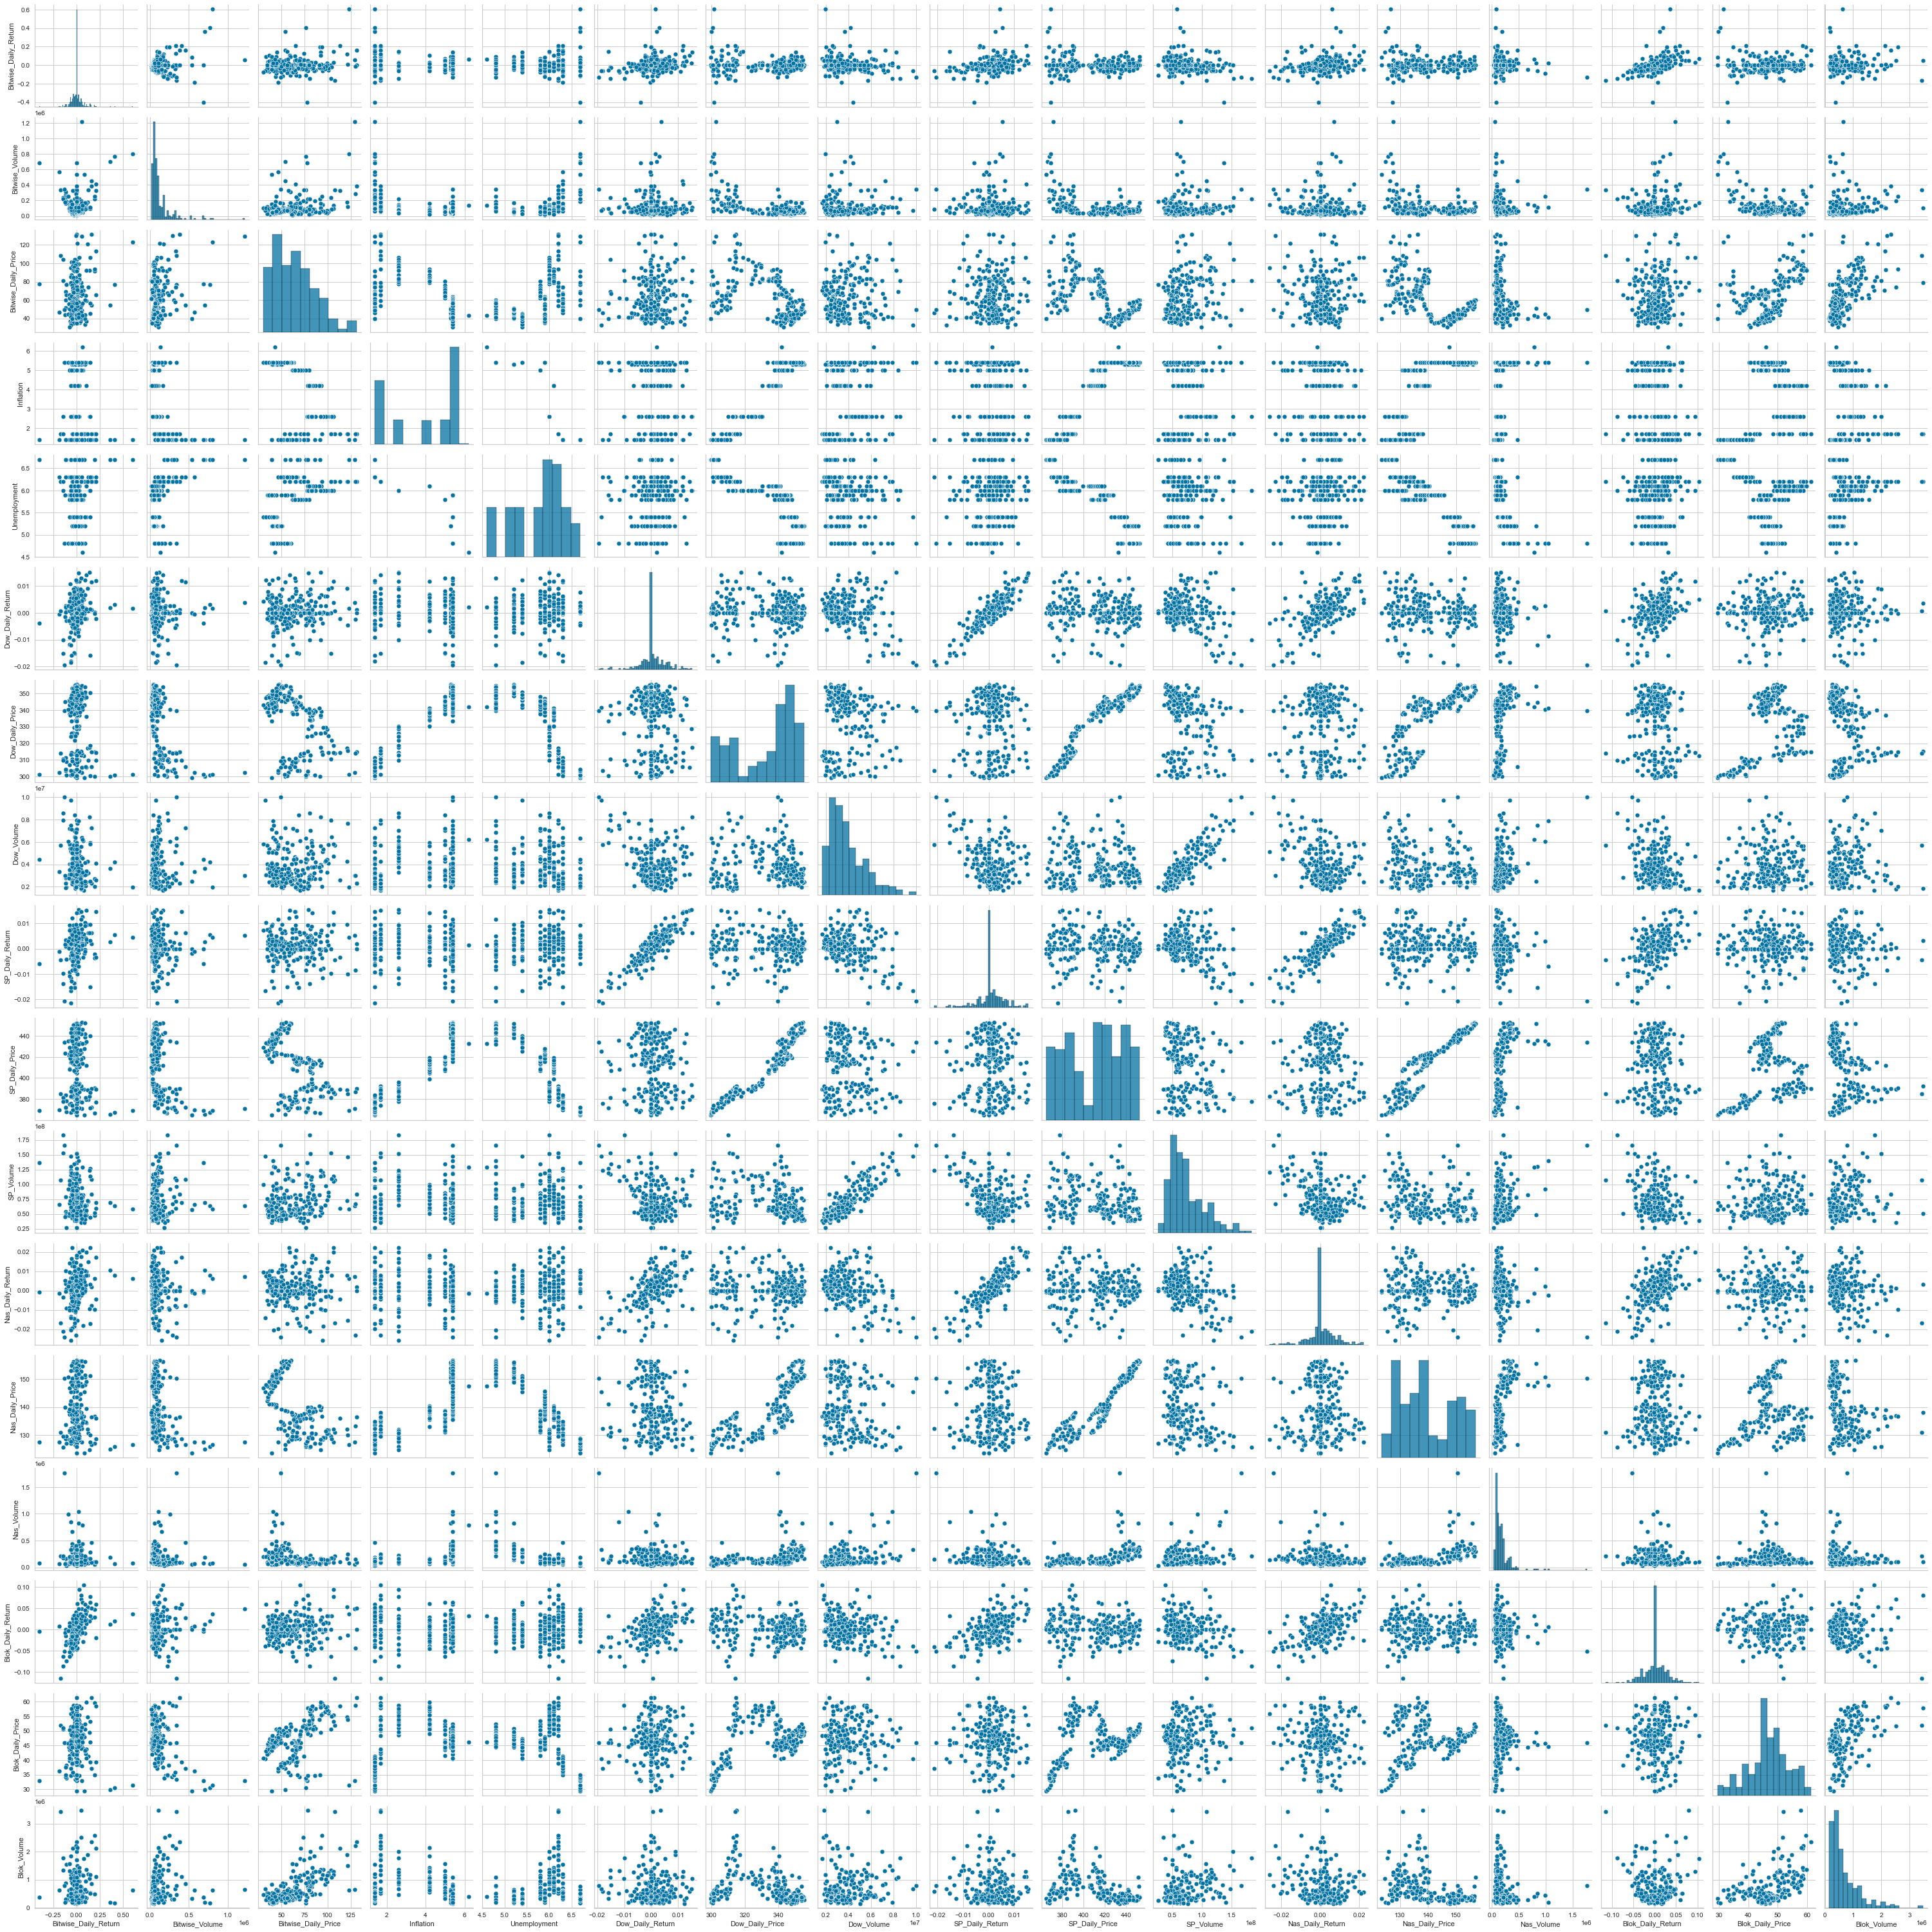

In [180]:
sns.pairplot(data);

The linear relationships between the price movement of Bitwise and predictors possess only a small slope. The coefficient values for these values should be relatively small. 

### Train - Test Split 

In order to test the accuracy of our models, we will need to split the data set into a training set which the model will be 'trained' on, and a test set against which we will measure the model. The dependent variable for this will be the valuation of Bitwise ('Bitwise_Daily_Price').

In [181]:
X = data.drop('Bitwise_Daily_Price', axis = 1)
y = data.Bitwise_Daily_Price

In [182]:
X.head()

Bitwise_Daily_Return  Bitwise_Volume  Inflation  Unemployment  \
Date                                                                        
2020-12-11              0.081796        537000.0        1.4           6.7   
2020-12-12              0.000000        537000.0        1.4           6.7   
2020-12-13              0.000000        537000.0        1.4           6.7   
2020-12-14              0.363054        703700.0        1.4           6.7   
2020-12-15              0.406611        770300.0        1.4           6.7   

            Dow_Daily_Return  Dow_Daily_Price  Dow_Volume  SP_Daily_Return  \
Date                                                                         
2020-12-11         -0.000184       299.337659   2454300.0        -0.001979   
2020-12-12          0.000000       299.337659   2454300.0         0.000000   
2020-12-13          0.000000       299.337659   2454300.0         0.000000   
2020-12-14          0.001936       299.917090   3646100.0         0.002608   
2020-12-15          0.003026       300.824658   4211500.0         0.005359   

            SP_Daily_Price   SP_Volume  Nas_Daily_Return  Nas_Daily_Price  \
Date                                                                        
2020-12-11      364.482343  57698600.0         -0.000744       123.495107   
2020-12-12      364.482343  57698600.0          0.000000       123.495107   
2020-12-13      364.482343  57698600.0          0.000000       123.495107   
2020-12-14      365.432910  69216200.0          0.010422       124.782149   
2020-12-15      367.391211  63865300.0          0.008035       125.784759   

            Nas_Volume  Blok_Daily_Return  Blok_Daily_Price  Blok_Volume  
Date                                                                      
2020-12-11     54200.0           0.005002         29.499656     315200.0  
2020-12-12     54200.0           0.000000         29.499656     315200.0  
2020-12-13     54200.0           0.000000         29.499656     315200.0  
2020-12-14    184100.0           0.011859         29.849478     197900.0  
2020-12-15     64300.0           0.019074         30.418833     169200.0

In [183]:
y.head()

Date
2020-12-11    39.994
2020-12-12    39.994
2020-12-13    39.994
2020-12-14    54.514
2020-12-15    76.680
Name: Bitwise_Daily_Price, dtype: float64

In [184]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model - 1

The first model is simply taking the dataset before the ommission of multi-colinear columns and before transformation to normalize the independent variables.

In [185]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)
pd.DataFrame(scaled_train_X).head()

0         1         2         3         4         5         6   \
0 -0.432572 -0.482986 -0.751575  0.370526 -0.038889 -0.169807  0.894296   
1 -0.021592 -0.458597 -1.290153  0.744219 -0.059414 -1.047538 -0.892243   
2  0.311786  0.839694 -1.469679  1.678451  1.378908 -1.647194 -0.952123   
3 -0.059940 -0.787031  0.924001 -0.750553  0.060609  0.950337  0.004295   
4 -0.060685 -0.722808  0.924001 -0.750553 -0.098517  0.876256  1.100207   

         7         8         9         10        11        12        13  \
0 -1.579182 -0.705977  1.386100 -2.629570 -1.092056 -0.126552  0.431446   
1  0.390986 -0.759915 -0.833342  0.298933 -0.181909 -0.542121  1.218751   
2  1.618111 -1.501145 -1.230677  1.205725 -1.175153 -0.711382  1.074824   
3  0.064195  0.961869 -0.369371  0.238110  1.066838  0.499531 -0.723644   
4 -0.118504  0.832922  0.033153 -0.109619  0.871816  0.190736 -0.067717   

         14        15  
0  1.711763  1.173953  
1  0.953543  1.807878  
2 -1.815960  0.090984  
3 -0.464740 -0.529514  
4 -0.752159 -0.555821

In [186]:
LinReg = LinearRegression()
LinReg.fit(scaled_train_X, train_y)
train_y_m1 = LinReg.predict(scaled_train_X)
test_y_m1 = LinReg.predict(scaled_test_X)
print('Coefficients: ', list(zip(train_X.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m1))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m1))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m1))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m1))

Coefficients:  [('Bitwise_Daily_Return', 0.10261007561654037), ('Bitwise_Volume', 2.6010242902798186), ('Inflation', -14.88118537968179), ('Unemployment', 6.442491095199589), ('Dow_Daily_Return', 2.4365899181331034), ('Dow_Daily_Price', -23.511784045859617), ('Dow_Volume', -1.2790312779873032), ('SP_Daily_Return', -3.376075274057345), ('SP_Daily_Price', 59.58059789472004), ('SP_Volume', 0.92739540771541), ('Nas_Daily_Return', 1.8237797038113905), ('Nas_Daily_Price', -32.95688873406392), ('Nas_Volume', 1.180431995467858), ('Blok_Daily_Return', -0.25490658469616667), ('Blok_Daily_Price', 14.032642203913854), ('Blok_Volume', 1.7564031839663699)]
Intercept:  64.45164414661018
------
R2 Train:  0.8097520288672522
MAE Train:  7.189979350660125
--------
R2 Test:  0.730128242000265
MAE Test:  7.68639810172263


Unexpectedly, the root squared term is quite high, indicating a good fit over both training and testing sets. Moreover, the mean absolute error is relatively low.

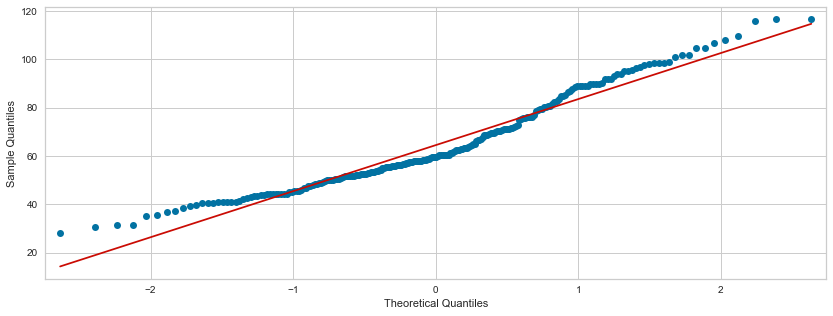

In [187]:
sm.qqplot(train_y_m1, line = 's')
pylab.show();

The QQ-plot is surprisingly normal even though the predictors have not been normalized.

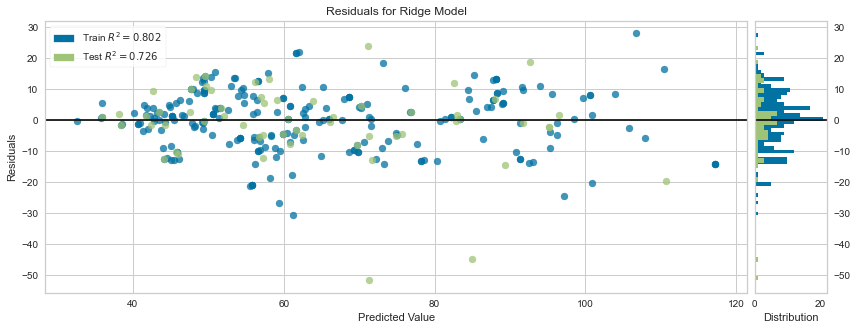

In [188]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(scaled_train_X, train_y)  
visualizer.score(scaled_test_X, test_y) 
visualizer.show();

The residual plot exhibits randomness. However, it still does have a slight funnel shape. A log transformation may help in dispersing the residuals more equally about the mean. 

In [189]:
pd.DataFrame(train_X).corr(method='pearson')

Bitwise_Daily_Return  Bitwise_Volume  Inflation  \
Bitwise_Daily_Return              1.000000        0.218392  -0.104848   
Bitwise_Volume                    0.218392        1.000000  -0.502919   
Inflation                        -0.104848       -0.502919   1.000000   
Unemployment                      0.058618        0.389926  -0.793313   
Dow_Daily_Return                  0.260313       -0.000321  -0.090962   
Dow_Daily_Price                  -0.089455       -0.559278   0.957608   
Dow_Volume                       -0.113678       -0.006556   0.041589   
SP_Daily_Return                   0.281047       -0.022681  -0.053374   
SP_Daily_Price                   -0.068943       -0.479045   0.935442   
SP_Volume                        -0.178594        0.125949  -0.162695   
Nas_Daily_Return                  0.254724       -0.022710  -0.020792   
Nas_Daily_Price                  -0.033033       -0.362908   0.795399   
Nas_Volume                       -0.081034       -0.016171   0.362801   
Blok_Daily_Return                 0.537788        0.037191  -0.101646   
Blok_Daily_Price                  0.006827       -0.455387   0.234821   
Blok_Volume                       0.037575        0.117270  -0.437542   

                      Unemployment  Dow_Daily_Return  Dow_Daily_Price  \
Bitwise_Daily_Return      0.058618          0.260313        -0.089455   
Bitwise_Volume            0.389926         -0.000321        -0.559278   
Inflation                -0.793313         -0.090962         0.957608   
Unemployment              1.000000          0.096744        -0.821959   
Dow_Daily_Return          0.096744          1.000000        -0.037874   
Dow_Daily_Price          -0.821959         -0.037874         1.000000   
Dow_Volume               -0.093049         -0.217172        -0.040871   
SP_Daily_Return           0.095773          0.909375        -0.011491   
SP_Daily_Price           -0.905774         -0.067173         0.963203   
SP_Volume                 0.033516         -0.277282        -0.218011   
Nas_Daily_Return          0.089508          0.608078        -0.004690   
Nas_Daily_Price          -0.897302         -0.085462         0.821939   
Nas_Volume               -0.620193         -0.252358         0.328754   
Blok_Daily_Return         0.074904          0.441963        -0.087567   
Blok_Daily_Price         -0.260440          0.066226         0.377400   
Blok_Volume               0.339000          0.030260        -0.348686   

                      Dow_Volume  SP_Daily_Return  SP_Daily_Price  SP_Volume  \
Bitwise_Daily_Return   -0.113678         0.281047       -0.068943  -0.178594   
Bitwise_Volume         -0.006556        -0.022681       -0.479045   0.125949   
Inflation               0.041589        -0.053374        0.935442  -0.162695   
Unemployment           -0.093049         0.095773       -0.905774   0.033516   
Dow_Daily_Return       -0.217172         0.909375       -0.067173  -0.277282   
Dow_Daily_Price        -0.040871        -0.011491        0.963203  -0.218011   
Dow_Volume              1.000000        -0.312397       -0.076829   0.867521   
SP_Daily_Return        -0.312397         1.000000       -0.033782  -0.341886   
SP_Daily_Price         -0.076829        -0.033782        1.000000  -0.242422   
SP_Volume               0.867521        -0.341886       -0.242422   1.000000   
Nas_Daily_Return       -0.347554         0.852888       -0.014314  -0.324008   
Nas_Daily_Price        -0.155095        -0.042790        0.940865  -0.285760   
Nas_Volume              0.368216        -0.290703        0.428090   0.290184   
Blok_Daily_Return      -0.231505         0.522019       -0.069078  -0.206488   
Blok_Daily_Price        0.061927         0.059067        0.296511   0.089267   
Blok_Volume             0.120509        -0.027216       -0.383376   0.243626   

                      Nas_Daily_Return  Nas_Daily_Price  Nas_Volume  \
Bitwise_Daily_Return          0.254724        -0.033033   -0.081034   
Bitwise_Volume               -0.022

### Model - 2

For the second model, I added the minimum value of each column to every data point in the same column and added 1. This was done in order to ultimately determine the square root of each data point for the sake of normalizing the data. 

In [190]:
for column in data.columns:
    print(column, data[column].min())

Bitwise_Daily_Return -0.39974528372482776
Bitwise_Volume 16700.0
Bitwise_Daily_Price 30.439999999999998
Inflation 1.4
Unemployment 4.6
Dow_Daily_Return -0.019481447317665768
Dow_Daily_Price 299.33765900000003
Dow_Volume 1690000.0
SP_Daily_Return -0.021326908175513637
SP_Daily_Price 364.4823426
SP_Volume 26457900.0
Nas_Daily_Return -0.025880191136173458
Nas_Daily_Price 123.49510660000001
Nas_Volume 32000.0
Blok_Daily_Return -0.11466292342611539
Blok_Daily_Price 29.4996558
Blok_Volume 152800.0


In [191]:
mins = {"Bitwise_Daily_Return": -0.39974528372482776,
"Bitwise_Volume": 16700.0,
"Bitwise_Daily_Price": 30.439999999999998,
"Inflation": 1.4,
"Unemployment": 4.6,
"Dow_Daily_Return": -0.019481447317665768,
"Dow_Daily_Price": 299.33765900000003,
"Dow_Volume": 1690000.0,
"SP_Daily_Return": -0.021326908175513637,
"SP_Daily_Price": 364.4823426,
"SP_Volume": 26457900.0,
"Nas_Daily_Return": -0.025880191136173458,
"Nas_Daily_Price": 123.49510660000001,
"Nas_Volume": 32000.0,
"Blok_Daily_Return": -0.11466292342611539,
"Blok_Daily_Price": 29.4996558,
"Blok_Volume": 152800.0}

In [192]:
train_X['Bitwise_Daily_Return'] = train_X['Bitwise_Daily_Return'] + abs(mins['Bitwise_Daily_Return'] + 1)
train_X['Bitwise_Volume'] = train_X['Bitwise_Volume'] + abs(mins['Bitwise_Volume'] + 1)
train_X['Inflation'] = train_X['Inflation'] + abs(mins['Inflation'] + 1)
train_X['Unemployment'] = train_X['Unemployment'] + abs(mins['Unemployment'] + 1)
train_X['Dow_Daily_Return'] = train_X['Dow_Daily_Return'] + abs(mins['Dow_Daily_Return'] + 1)
train_X['Dow_Daily_Price'] = train_X['Dow_Daily_Price'] + abs(mins['Dow_Daily_Price'] + 1)
train_X['Dow_Volume'] = train_X['Dow_Volume'] + abs(mins['Dow_Volume'] + 1)
train_X['SP_Daily_Return'] = train_X['SP_Daily_Return'] + abs(mins['SP_Daily_Return'] + 1)
train_X['SP_Daily_Price'] = train_X['SP_Daily_Price'] + abs(mins['SP_Daily_Price'] + 1)
train_X['SP_Volume'] = train_X['SP_Volume'] + abs(mins['SP_Volume'] + 1)
train_X['Nas_Daily_Return'] = train_X['Nas_Daily_Return'] + abs(mins['Nas_Daily_Return'] + 1)
train_X['Nas_Daily_Price'] = train_X['Nas_Daily_Price'] + abs(mins['Nas_Daily_Price'] + 1)
train_X['Nas_Volume'] = train_X['Nas_Volume'] + abs(mins['Nas_Volume'] + 1)
train_X['Blok_Daily_Return'] = train_X['Blok_Daily_Return'] + abs(mins['Blok_Daily_Return'] + 1)
train_X['Blok_Daily_Price'] = train_X['Blok_Daily_Price'] + abs(mins['Blok_Daily_Price'] + 1)
train_X['Blok_Volume'] = train_X['Blok_Volume'] + abs(mins['Blok_Volume'] + 1)

In [193]:
test_X['Bitwise_Daily_Return'] = test_X['Bitwise_Daily_Return'] + abs(mins['Bitwise_Daily_Return']+ 1)
test_X['Bitwise_Volume'] = test_X['Bitwise_Volume'] + abs(mins['Bitwise_Volume']+ 1)
test_X['Inflation'] = test_X['Inflation'] + abs(mins['Inflation']+ 1)
test_X['Unemployment'] = test_X['Unemployment'] + abs(mins['Unemployment']+ 1)
test_X['Dow_Daily_Return'] = test_X['Dow_Daily_Return'] + abs(mins['Dow_Daily_Return']+ 1)
test_X['Dow_Daily_Price'] = test_X['Dow_Daily_Price'] + abs(mins['Dow_Daily_Price']+ 1)
test_X['Dow_Volume'] = test_X['Dow_Volume'] + abs(mins['Dow_Volume']+ 1)
test_X['SP_Daily_Return'] = test_X['SP_Daily_Return'] + abs(mins['SP_Daily_Return']+ 1)
test_X['SP_Daily_Price'] = test_X['SP_Daily_Price'] + abs(mins['SP_Daily_Price']+ 1)
test_X['SP_Volume'] = test_X['SP_Volume'] + abs(mins['SP_Volume']+ 1)
test_X['Nas_Daily_Return'] = test_X['Nas_Daily_Return'] + abs(mins['Nas_Daily_Return']+ 1)
test_X['Nas_Daily_Price'] = test_X['Nas_Daily_Price'] + abs(mins['Nas_Daily_Price']+ 1)
test_X['Nas_Volume'] = test_X['Nas_Volume'] + abs(mins['Nas_Volume']+ 1)
test_X['Blok_Daily_Return'] = test_X['Blok_Daily_Return'] + abs(mins['Blok_Daily_Return']+ 1)
test_X['Blok_Daily_Price'] = test_X['Blok_Daily_Price'] + abs(mins['Blok_Daily_Price']+ 1)
test_X['Blok_Volume'] = test_X['Blok_Volume'] + abs(mins['Blok_Volume']+ 1)

In [194]:
variables = data.columns.drop('Bitwise_Daily_Price')
for feature in variables:
    train_X[feature] = train_X[feature].map(lambda x: np.sqrt(x))
for feature in variables:
    test_X[feature] = test_X[feature].map(lambda x: np.sqrt(x))

In [195]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)
pd.DataFrame(scaled_train_X).head()

0         1         2         3         4         5         6   \
0 -0.405856 -0.520362 -0.687921  0.378488 -0.037552 -0.162286  0.956693   
1  0.007953 -0.479350 -1.291961  0.745140 -0.058065 -1.043997 -0.940683   
2  0.336364  1.103510 -1.507834  1.648401  1.376754 -1.652807 -1.014308   
3 -0.030232 -1.121940  0.904325 -0.740856  0.061873  0.947273  0.073383   
4 -0.030975 -0.976650  0.904325 -0.740856 -0.097148  0.874421  1.147796   

         7         8         9         10        11        12        13  \
0 -1.579910 -0.700739  1.394058 -2.640131 -1.096514 -0.030675  0.436485   
1  0.391819 -0.755285 -0.859427  0.300569 -0.173672 -0.699016  1.212541   
2  1.614550 -1.510129 -1.354160  1.204560 -1.181546 -1.026395  1.071327   
3  0.065507  0.961285 -0.326788  0.239824  1.068163  0.775187 -0.718440   
4 -0.117052  0.834443  0.103818 -0.107728  0.876011  0.399610 -0.060177   

         14        15  
0  1.656261  1.299009  
1  0.946476  1.817898  
2 -1.852000  0.246113  
3 -0.442328 -0.525262  
4 -0.734548 -0.562575

In [196]:
LinReg = LinearRegression()
LinReg.fit(scaled_train_X, train_y)
train_y_m2 = LinReg.predict(scaled_train_X)
test_y_m2 = LinReg.predict(scaled_test_X)
print('Coefficients: ', list(zip(train_X.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m2))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m2))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m2))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m2))

Coefficients:  [('Bitwise_Daily_Return', -0.011855460711458363), ('Bitwise_Volume', 3.1609928369384197), ('Inflation', -12.625211362564894), ('Unemployment', 5.565709900128584), ('Dow_Daily_Return', 2.5997288155117215), ('Dow_Daily_Price', -17.8657339042077), ('Dow_Volume', -1.591434979230995), ('SP_Daily_Return', -3.7315520079017848), ('SP_Daily_Price', 47.056095609739074), ('SP_Volume', 0.8747971792896434), ('Nas_Daily_Return', 1.9859286693750307), ('Nas_Daily_Price', -28.503416151761478), ('Nas_Volume', 1.1287538358609475), ('Blok_Daily_Return', -0.17265187512461333), ('Blok_Daily_Price', 14.151164488187806), ('Blok_Volume', 2.093122012016979)]
Intercept:  64.45164414660992
------
R2 Train:  0.8054038311214238
MAE Train:  7.309480289027395
--------
R2 Test:  0.6904465859936297
MAE Test:  8.011281978697813


The root squared term dropped for both training and test sets. While the mean absolute error rose. This model fit performs worse than the first model. However, the assumption of multivariate normalization cannot be ignored for the sake of increasing root squared and mean absolute error terms.

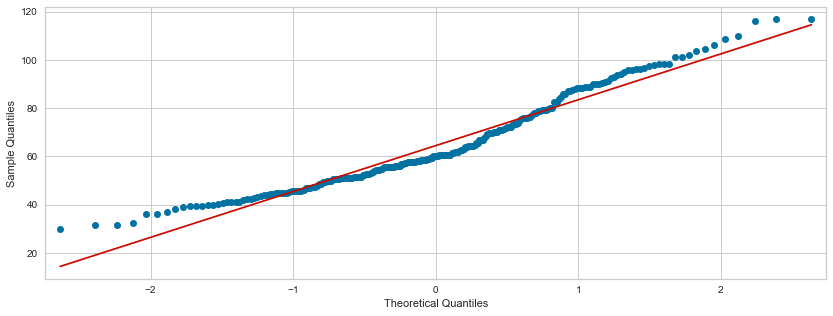

In [197]:
sm.qqplot(train_y_m2, line = 's')
pylab.show();

According to the QQ plot, the distribution largely follows a normal distribution with a slight right-skewness. This plot is similar to the one seen with the first model.

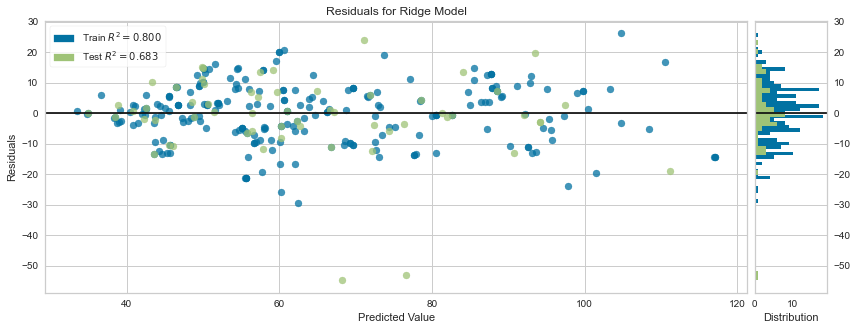

In [198]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(scaled_train_X, train_y)  
visualizer.score(scaled_test_X, test_y) 
visualizer.show();

The residuals of this model is similar to the residuals plot from the first model. By measure of fit, the model was worsened by the square root transformation, but multivariate normalization has been addressed.

### Model - 3

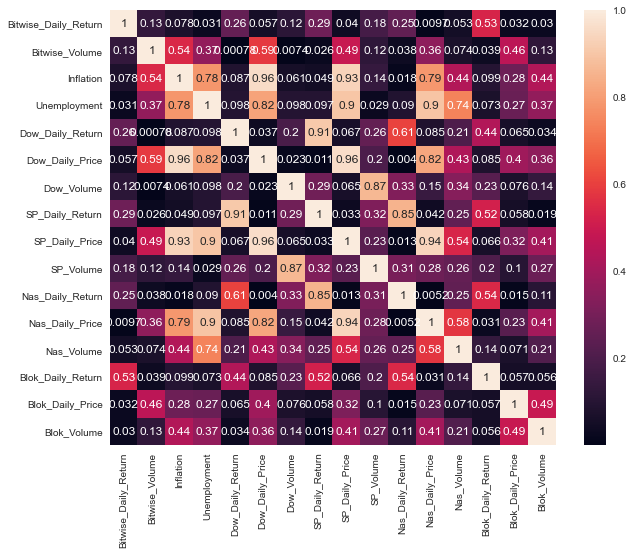

In [199]:
plt.figure(figsize=(10,8))
sns.heatmap(train_X.corr().abs(), annot=True)
plt.show();

By looking at this heatmap, we can cross check which columns to drop due to colinear issues between each other.

In [200]:
to_drop = ['Dow_Daily_Price', 'Dow_Volume', 'SP_Daily_Price', 'Nas_Daily_Price']

In [201]:
train_X.drop(to_drop, axis= 1, inplace= True)
test_X.drop(to_drop, axis= 1, inplace= True)

In [202]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)
pd.DataFrame(scaled_train_X).head()

0         1         2         3         4         5         6   \
0 -0.405856 -0.520362 -0.687921  0.378488 -0.037552 -1.579910  1.394058   
1  0.007953 -0.479350 -1.291961  0.745140 -0.058065  0.391819 -0.859427   
2  0.336364  1.103510 -1.507834  1.648401  1.376754  1.614550 -1.354160   
3 -0.030232 -1.121940  0.904325 -0.740856  0.061873  0.065507 -0.326788   
4 -0.030975 -0.976650  0.904325 -0.740856 -0.097148 -0.117052  0.103818   

         7         8         9         10        11  
0 -2.640131 -0.030675  0.436485  1.656261  1.299009  
1  0.300569 -0.699016  1.212541  0.946476  1.817898  
2  1.204560 -1.026395  1.071327 -1.852000  0.246113  
3  0.239824  0.775187 -0.718440 -0.442328 -0.525262  
4 -0.107728  0.399610 -0.060177 -0.734548 -0.562575

In [203]:
LinReg = LinearRegression()
LinReg.fit(scaled_train_X, train_y)
train_y_m3 = LinReg.predict(scaled_train_X)
test_y_m3 = LinReg.predict(scaled_test_X)
print('Coefficients: ', list(zip(train_X.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m3))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m3))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m3))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m3))

Coefficients:  [('Bitwise_Daily_Return', -0.09767786089665265), ('Bitwise_Volume', 3.299463373151732), ('Inflation', -5.814563895783552), ('Unemployment', 7.91145781216934), ('Dow_Daily_Return', 3.418431357693883), ('SP_Daily_Return', -3.5797247447986917), ('SP_Volume', 1.2976225328390034), ('Nas_Daily_Return', 1.3435008305812188), ('Nas_Volume', 0.41128500696516906), ('Blok_Daily_Return', -0.054896586337930486), ('Blok_Daily_Price', 13.96416745054782), ('Blok_Volume', 2.4960706935172983)]
Intercept:  64.45164414661008
------
R2 Train:  0.7704232758213639
MAE Train:  8.036377628193607
--------
R2 Test:  0.6348893099102797
MAE Test:  9.522968109135533


Expectedly, the root squared term dropped while the mean absolute error rose. The omission of colinear terms most likely caused this outcome. However, the coefficients should be more precise in determining the degree in which each independent variable affects the price of Bitwise.

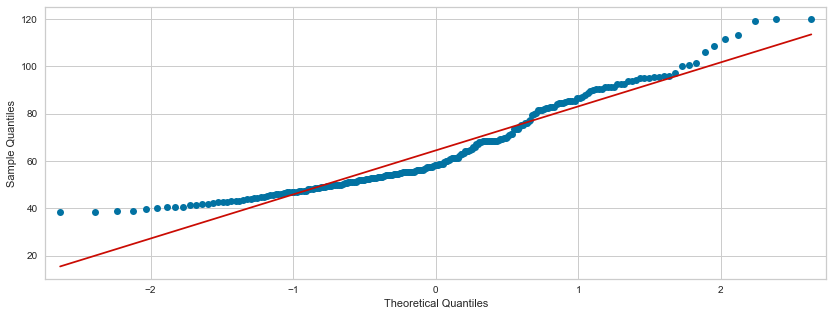

In [204]:
sm.qqplot(train_y_m3, line = 's')
pylab.show();

Once again, the distribution shown by the QQ-plot is a right skewed one. It appears near identical to models 1 and 2. 

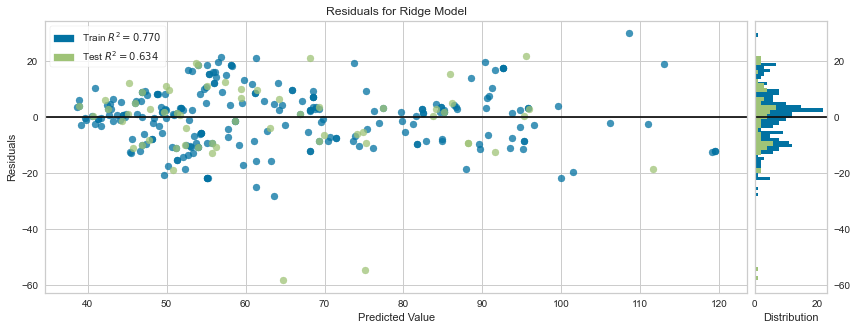

In [205]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(scaled_train_X, train_y)  
visualizer.score(scaled_test_X, test_y) 
visualizer.show();

As with the root squared plot, the residuals plot is quite similar to the previous two models. The distribution does appear to be quite random. 

### Blok - Model

In [206]:
X = data.drop('Blok_Daily_Price', axis = 1)
y = data.Blok_Daily_Price

In [207]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
train_X['Bitwise_Daily_Return'] = train_X['Bitwise_Daily_Return'] + abs(mins['Bitwise_Daily_Return'] + 1)
train_X['Bitwise_Volume'] = train_X['Bitwise_Volume'] + abs(mins['Bitwise_Volume'] + 1)
train_X['Inflation'] = train_X['Inflation'] + abs(mins['Inflation'] + 1)
train_X['Unemployment'] = train_X['Unemployment'] + abs(mins['Unemployment'] + 1)
train_X['Dow_Daily_Return'] = train_X['Dow_Daily_Return'] + abs(mins['Dow_Daily_Return'] + 1)
train_X['Dow_Daily_Price'] = train_X['Dow_Daily_Price'] + abs(mins['Dow_Daily_Price'] + 1)
train_X['Dow_Volume'] = train_X['Dow_Volume'] + abs(mins['Dow_Volume'] + 1)
train_X['SP_Daily_Return'] = train_X['SP_Daily_Return'] + abs(mins['SP_Daily_Return'] + 1)
train_X['SP_Daily_Price'] = train_X['SP_Daily_Price'] + abs(mins['SP_Daily_Price'] + 1)
train_X['SP_Volume'] = train_X['SP_Volume'] + abs(mins['SP_Volume'] + 1)
train_X['Nas_Daily_Return'] = train_X['Nas_Daily_Return'] + abs(mins['Nas_Daily_Return'] + 1)
train_X['Nas_Daily_Price'] = train_X['Nas_Daily_Price'] + abs(mins['Nas_Daily_Price'] + 1)
train_X['Nas_Volume'] = train_X['Nas_Volume'] + abs(mins['Nas_Volume'] + 1)
train_X['Blok_Daily_Return'] = train_X['Blok_Daily_Return'] + abs(mins['Blok_Daily_Return'] + 1)
train_X['Blok_Volume'] = train_X['Blok_Volume'] + abs(mins['Blok_Volume'] + 1)

In [209]:
test_X['Bitwise_Daily_Return'] = test_X['Bitwise_Daily_Return'] + abs(mins['Bitwise_Daily_Return']+ 1)
test_X['Bitwise_Volume'] = test_X['Bitwise_Volume'] + abs(mins['Bitwise_Volume']+ 1)
test_X['Inflation'] = test_X['Inflation'] + abs(mins['Inflation']+ 1)
test_X['Unemployment'] = test_X['Unemployment'] + abs(mins['Unemployment']+ 1)
test_X['Dow_Daily_Return'] = test_X['Dow_Daily_Return'] + abs(mins['Dow_Daily_Return']+ 1)
test_X['Dow_Daily_Price'] = test_X['Dow_Daily_Price'] + abs(mins['Dow_Daily_Price']+ 1)
test_X['Dow_Volume'] = test_X['Dow_Volume'] + abs(mins['Dow_Volume']+ 1)
test_X['SP_Daily_Return'] = test_X['SP_Daily_Return'] + abs(mins['SP_Daily_Return']+ 1)
test_X['SP_Daily_Price'] = test_X['SP_Daily_Price'] + abs(mins['SP_Daily_Price']+ 1)
test_X['SP_Volume'] = test_X['SP_Volume'] + abs(mins['SP_Volume']+ 1)
test_X['Nas_Daily_Return'] = test_X['Nas_Daily_Return'] + abs(mins['Nas_Daily_Return']+ 1)
test_X['Nas_Daily_Price'] = test_X['Nas_Daily_Price'] + abs(mins['Nas_Daily_Price']+ 1)
test_X['Nas_Volume'] = test_X['Nas_Volume'] + abs(mins['Nas_Volume']+ 1)
test_X['Blok_Daily_Return'] = test_X['Blok_Daily_Return'] + abs(mins['Blok_Daily_Return']+ 1)
test_X['Blok_Volume'] = test_X['Blok_Volume'] + abs(mins['Blok_Volume']+ 1)

In [210]:
variables = data.columns.drop('Blok_Daily_Price')
for feature in variables:
    train_X[feature] = train_X[feature].map(lambda x: np.sqrt(x))
for feature in variables:
    test_X[feature] = test_X[feature].map(lambda x: np.sqrt(x))

In [211]:
to_drop = ['Dow_Daily_Price', 'Dow_Volume', 'SP_Daily_Price', 'Nas_Daily_Price']
train_X.drop(to_drop, axis= 1, inplace= True)
test_X.drop(to_drop, axis= 1, inplace= True)

In [212]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.transform(test_X)
pd.DataFrame(scaled_train_X).head()

0         1         2         3         4         5         6   \
0 -0.405856 -0.520362  1.431562 -0.687921  0.378488 -0.037552 -1.579910   
1  0.007953 -0.479350  0.563004 -1.291961  0.745140 -0.058065  0.391819   
2  0.336364  1.103510  0.735714 -1.507834  1.648401  1.376754  1.614550   
3 -0.030232 -1.121940 -1.359168  0.904325 -0.740856  0.061873  0.065507   
4 -0.030975 -0.976650 -1.554963  0.904325 -0.740856 -0.097148 -0.117052   

         7         8         9         10        11  
0  1.394058 -2.640131 -0.030675  0.436485  1.299009  
1 -0.859427  0.300569 -0.699016  1.212541  1.817898  
2 -1.354160  1.204560 -1.026395  1.071327  0.246113  
3 -0.326788  0.239824  0.775187 -0.718440 -0.525262  
4  0.103818 -0.107728  0.399610 -0.060177 -0.562575

In [213]:
LinReg = LinearRegression()
LinReg.fit(scaled_train_X, train_y)
train_y_m4 = LinReg.predict(scaled_train_X)
test_y_m4 = LinReg.predict(scaled_test_X)
print('Coefficients: ', list(zip(train_X.columns,LinReg.coef_)))
print('Intercept: ', LinReg.intercept_)
print('------')
print('R2 Train: ', r2_score(train_y, train_y_m4))
print('MAE Train: ', mean_absolute_error(train_y, train_y_m4))
print('--------')
print('R2 Test: ', r2_score(test_y, test_y_m4))
print('MAE Test: ', mean_absolute_error(test_y, test_y_m4))

Coefficients:  [('Bitwise_Daily_Return', 0.09421051865975015), ('Bitwise_Volume', -1.8298743401522846), ('Bitwise_Daily_Price', 3.7906672772428815), ('Inflation', 2.0134334205876274), ('Unemployment', -3.1400628244298763), ('Dow_Daily_Return', 0.06003184114296101), ('SP_Daily_Return', -0.43568778002889164), ('SP_Volume', 0.07111356275401687), ('Nas_Daily_Return', 0.3908822804593531), ('Nas_Volume', -0.8837152654251901), ('Blok_Daily_Return', 0.5730452600890552), ('Blok_Volume', 2.779352703957783)]
Intercept:  47.11474963305081
------
R2 Train:  0.7780208532923417
MAE Train:  2.538022672278304
--------
R2 Test:  0.7282654811730507
MAE Test:  2.6378093191495373


The mean absolute error for is significantly lower compared to that of Bitwise across all models. However, Blok's valuation does occur at a lower, more narrow range. By comparison, they perform quite similarly to one another in terms of both the root squared as well as the mean absolute error. 

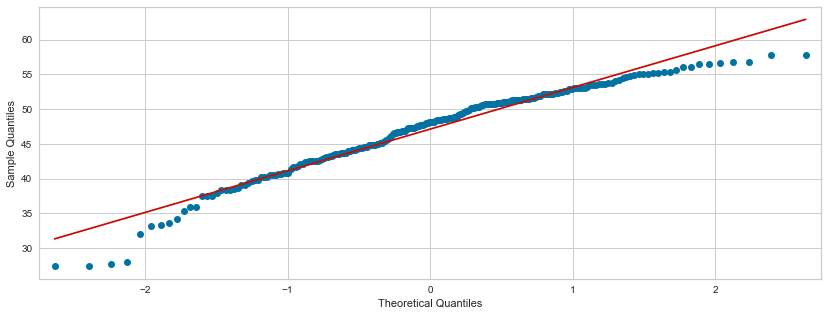

In [214]:
sm.qqplot(train_y_m4, line = 's')
pylab.show();

For Blok, the QQ plot exhibits a slight left skew distribution. 

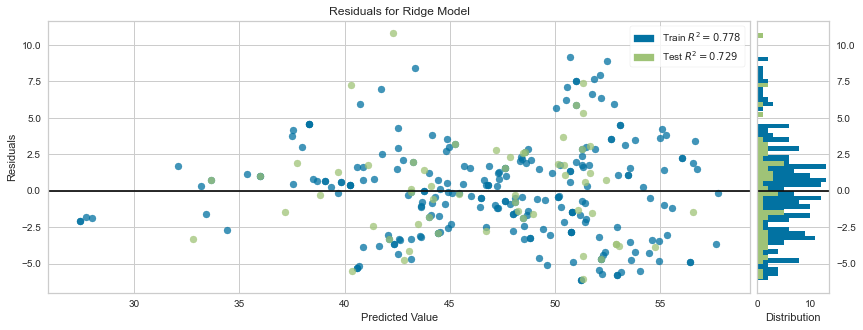

In [215]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(scaled_train_X, train_y)  
visualizer.score(scaled_test_X, test_y) 
visualizer.show();

The distribution of residuals is sparse, but it does appear to have a funnel shape. The distribution, as indicated by the QQ-plot has a negative skew. However, the root squared score is high enough in order to be considered statistically significant. 

### Results

The coefficients below show the relationship between the predictor variable and the independent variable. As the predictor variable rises 1 standard deviation from the mean, the price of Bitwise or Block goes up or down according to the coefficient value. 

#### Bitwise

Coefficients:  
- 'Bitwise_Daily_Return': -0.09767786089665265
- 'Bitwise_Volume': 3.299463373151732
- 'Inflation': -5.814563895783552
- 'Unemployment': 7.91145781216934 
- 'Dow_Daily_Return': 3.418431357693883
- 'SP_Daily_Return': -3.5797247447986917
- 'SP_Volume': 1.2976225328390034
- 'Nas_Daily_Return': 1.3435008305812188
- 'Nas_Volume': 0.41128500696516906
- 'Blok_Daily_Return': -0.054896586337930486
- 'Blok_Daily_Price': 13.96416745054782
- 'Blok_Volume': 2.4960706935172983
--------------
- Intercept:  64.45164414661008
- R2 Train:  0.7704232758213639
- MAE Train:  8.036377628193607
- R2 Test:  0.6348893099102797
- MAE Test:  9.522968109135533

In [216]:
bit_res = {'Bitwise_Daily_Return': -0.09767786089665265, 'Bitwise_Volume': 3.299463373151732,
'Inflation': -5.814563895783552, 'Unemployment': 7.91145781216934,
'Dow_Daily_Return': 3.418431357693883, 'SP_Daily_Return': -3.5797247447986917,
'SP_Volume': 1.2976225328390034, 'Nas_Daily_Return': 1.3435008305812188,
'Nas_Volume': 0.41128500696516906, 'Blok_Daily_Return': -0.054896586337930486,
'Blok_Daily_Price': 13.96416745054782, 'Blok_Volume': 2.4960706935172983}

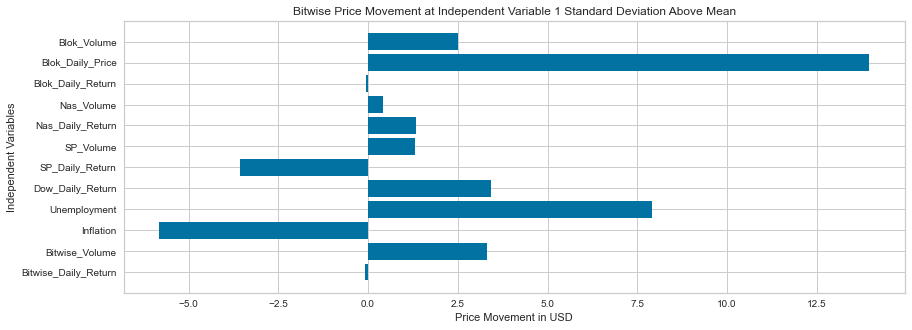

In [217]:
names = list(bit_res.keys())
values = list(bit_res.values())

plt.barh(range(len(bit_res)), values, tick_label=names)
plt.title('Bitwise Price Movement at Independent Variable 1 Standard Deviation Above Mean')
plt.ylabel('Independent Variables')
plt.xlabel('Price Movement in USD')
plt.show()

The biggest predictor appears to be the daily price of crypto-based index fund Blok. Followed by unemployment and inflation. The model this research settled on has lower scores for the coefficients of determination (R2) and mean absolute error (MAE). This is due to the omission of several columns which naturally lowers the R2, as well as the square root transformation applied on the indepedent variables to acheive more normal distributions.

#### Blok

Coefficients:  
- 'Bitwise_Daily_Return': 0.09421051865975015
- 'Bitwise_Volume': -1.8298743401522846
- Bitwise_Daily_Price': 3.7906672772428815
- 'Inflation': 2.0134334205876274 
- 'Unemployment': -3.1400628244298763
- 'Dow_Daily_Return': 0.06003184114296101
- 'SP_Daily_Return': -0.43568778002889164
- 'SP_Volume': 0.07111356275401687
- 'Nas_Daily_Return': 0.3908822804593531
- 'Nas_Volume': -0.8837152654251901
- Blok_Daily_Return': 0.5730452600890552
- 'Blok_Volume': 2.779352703957783
------------
- Intercept:  47.11474963305081
- R2 Train:  0.7780208532923417
- MAE Train:  2.538022672278304
- R2 Test:  0.7282654811730507
- MAE Test:  2.6378093191495373

In [218]:
blok_res = {'Bitwise_Daily_Return': 0.09421051865975015, 'Bitwise_Volume': -1.8298743401522846,
 'Bitwise_Daily_Price': 3.7906672772428815, 'Inflation': 2.0134334205876274 ,
 'Unemployment': -3.1400628244298763, 'Dow_Daily_Return': 0.06003184114296101,
 'SP_Daily_Return': -0.43568778002889164, 'SP_Volume': 0.07111356275401687,
 'Nas_Daily_Return': 0.3908822804593531, 'Nas_Volume': -0.8837152654251901,
 'Blok_Daily_Return': 0.5730452600890552, 'Blok_Volume': 2.779352703957783}

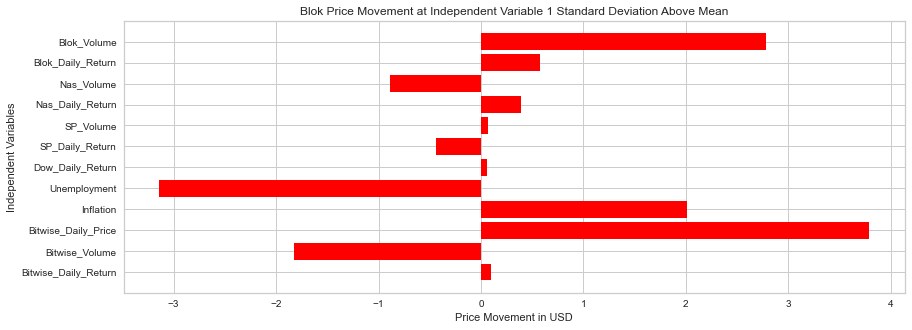

In [220]:
names = list(blok_res.keys())
values = list(blok_res.values())

plt.barh(range(len(blok_res)), values, tick_label=names, color= 'red')
plt.title('Blok Price Movement at Independent Variable 1 Standard Deviation Above Mean')
plt.ylabel('Independent Variables')
plt.xlabel('Price Movement in USD')
plt.show()

The predictors which affect the price movement of Blok the strongest are inflation, unemployment rate, and the daily price of Bitwise. The coefficient of determination is comparable to that of the model for Bitwise. Hovering around 0.75. It does have a lower mean absolute error however. Blok's price range is between \\$61 and \\$29, which is significantly lower and smaller than Bitwise' \\$131 to \\$101.

### Analysis

The valuation of Bitwise and Blok follow each other closely. The daily price for each is the the biggest determinant of price for the other. This supercedes Bitwise' own daily return and trade volume columns and Blok's own daily return and trade volume columns. Traditionally, Standard and Poor's 500, Dow Jones Industrial Index, and NASDAQ Composite also follow each other's price action quite closely. This tracking of each other's valuation is a good sign of a working maturation process for the crypto industry. It is showcasing that it has a hallmark of a well functioning economic system, while existing relatively independently from traditional market ebbs and flows. 

Interestingly, while unemployment has a positive correlation with Bitwise, it has a negative correlation with Blok. This may be due to the fundamental difference between the two. Bitwise is an ETF that tracks the top ten crypto-currencies by measure of market cap while Blok is an index fund that invests in a broader arrange of industries: from semi-conductors to software development. Crypto's goal of decentralization may entice both institutional and retail investors to invest in coins as unemployment rises in order to hedge against uncertainties unemployment brings. Conversely, Blok's investments may suffer as companies downsize employment. Industries and companies affected by Covid may have been the same industries and companies that Blok invests in. 

A similar explanation can be said for Bitwise and Blok's opposite correlations with inflation. As inflation rises, Bitwise goes down. For Blok, as inflation rises, so does its valuation. 

### Looking Ahead

Modeling the prices of individual cryptocurrencies might be able to produce more accurate predictions and better forecasts. The amount of data available on coins span back years before ETFs or index funds were created to track and invest in crypto-related assets. Higher volatility might be worthwhile as a trade-off for more accurate seasonality and periodicity that forecasting individual coins may give us. However, the goal of analysis would change. Instead of comparing the traditional market to an emerging crypto-based market, this new analysis would focus more on the performance of returns in investing in individual coins while using traditional market ETFs as a measuring stick. Similar to comparing Tesla's performance against DIA. 

Conversely, we can wait for the crypto industry to mature further in order to make a better assessment similar to the one we attempted to make in this research. In just a few years time, ETFs and index funds like Bitwise and Blok will have more data, which would make modeling and forecasting with regardes to seasonality and periodicity improve. 

Determining the what factors move the crypto-market will be interesting to watch as it tries to move away from traditonal market markers. Additionally, due to its immaturity, the industry is subject to growing pains similar to those seen during the late 1990s and early 2000s as the internet emerged out of its cocoon.